#1. correlation between speaker traits
#2. how speaker gender, acoustic features affect speaker traits
#3. how rater's gender, personality scores (TIPI) affect spealer traots
#4. Gender (speakers and raters) affect speaker traits

# normalize data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from google.colab import drive
import pandas as pd
import string
from statsmodels.stats.inter_rater import *
from sklearn.metrics import cohen_kappa_score

drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/speechgeneration/question_hum_results.csv' #REPLACE THE DATA DIRECTOR
# Attempt to read the necessary sheets from the Excel file
#data_df = pd.read_excel(folder_path, sheet_name='data_2').dropna().reset_index(drop=True)
#data_df = pd.read_excel(folder_path, sheet_name="Sheet1", engine="openpyxl")
data_df = pd.read_csv(folder_path)
#data_df = data_df.dropna()
#data_df = data_df[data_df['selected']=='S']
data_df.head()

Mounted at /content/drive


survey  MTURK selected     StartDate       EndDate  Status  \
0      12      1        y  1/30/25 7:39  1/30/25 8:06       0   
1      12      2        y  1/30/25 7:36  1/30/25 8:13       0   
2      12      3        y  1/30/25 7:35  1/30/25 8:09       0   
3      13      4        n  1/30/25 6:35  1/30/25 6:56       0   
4      13      5        n  1/30/25 6:54  1/30/25 7:20       0   

         IPAddress  Progress  Duration (in seconds)  Finished  ... click18  \
0    154.27.76.231       100                   1630         1  ...     3.0   
1    154.27.67.231       100                   2245         1  ...     2.0   
2  192.126.143.130        97                   2041         0  ...     1.0   
3   216.65.149.105       100                   1202         1  ...     3.0   
4   139.171.234.11       100                   1600         1  ...     1.0   

  click19  click20  click21  click22  click23  click24  click25 click26  \
0      10      2.0      2.0      2.0      2.0      2.0      2.0     2.0   
1       8      3.0      3.0      2.0      2.0      1.0      1.0     3.0   
2      15      1.0      1.0      2.0      1.0      1.0      1.0     1.0   
3       7      1.0      NaN      1.0      1.0      1.0      1.0     1.0   
4       4      1.0      1.0      2.0      1.0      1.0      1.0     2.0   

  click27  
0     2.0  
1     2.0  
2     1.0  
3     1.0  
4     1.0  

[5 rows x 341 columns]

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Normalize values in specified columns and fill other columns based on the provided logic
columns_to_normalize = [col for col in data_df.columns if 'Q' in col and col not in ('selected','Q0', 'Q03','Q02','survey', 'MTURK','Q25_1', 'Q25_2', 'Q25_3', 'Q25_4', 'Q25_5', 'Q25_6', 'Q25_7', 'Q25_8', 'Q25_9', 'Q25_10','Q28.1_1', 'Q28.1_2', 'Q28.1_3', 'Q28.1_4', 'Q28.1_5', 'Q28.1_6', 'Q28.1_7', 'Q28.1_8', 'Q28.1_9', 'Q28.1_10', 'Q29.1_1', 'Q29.1_2', 'Q29.1_3', 'Q29.1_4', 'Q29.1_5', 'Q29.1_6', 'Q29.1_7', 'Q29.1_8', 'Q29.1_9', 'Q29.1_10') and col.endswith(tuple([f"{i}" for i in range(1, 28)]))] #'Survey_mod',
#columns_to_normalize = [col for col in data_df.columns if col not in ('Q02','Survey_mod', 'survey', 'MTURK')] #not col.endswith('_4') and
print(columns_to_normalize)

# Normalize function
def normalize_row(row):
    row_mean = np.mean(row)
    #print('which row',row, 'what is row_mean',row_mean)
    row_std = np.std(row)
    if row_std != 0:
        return (row - row_mean) / row_std
    else:
        return row

def convert_to_numeric(df):
    for col in df.select_dtypes(include=['object', 'string']).columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Converts or sets NaN if conversion fails
    return df

# Apply the conversion
data_df[columns_to_normalize]  = convert_to_numeric(data_df[columns_to_normalize])

# Apply normalization to the selected columns
data_df[columns_to_normalize] = data_df[columns_to_normalize].apply(normalize_row, axis=1)
data_df[columns_to_normalize]
data_df

['Q1.1_1', 'Q1.1_2', 'Q1.1_3', 'Q1.1_4', 'Q1.1_5', 'Q1.1_6', 'Q1.1_7', 'Q1.1_8', 'Q1.1_9', 'Q1.1_10', 'Q1.2', 'Q2.1_1', 'Q2.1_2', 'Q2.1_3', 'Q2.1_4', 'Q2.1_5', 'Q2.1_6', 'Q2.1_7', 'Q2.1_8', 'Q2.1_9', 'Q2.1_10', 'Q3.1_1', 'Q3.1_2', 'Q3.1_3', 'Q3.1_4', 'Q3.1_5', 'Q3.1_6', 'Q3.1_7', 'Q3.1_8', 'Q3.1_9', 'Q3.1_10', 'Q4.1_1', 'Q4.1_2', 'Q4.1_3', 'Q4.1_4', 'Q4.1_5', 'Q4.1_6', 'Q4.1_7', 'Q4.1_8', 'Q4.1_9', 'Q4.1_10', 'Q5.1_1', 'Q5.1_2', 'Q5.1_3', 'Q5.1_4', 'Q5.1_5', 'Q5.1_6', 'Q5.1_7', 'Q5.1_8', 'Q5.1_9', 'Q5.1_10', 'Q6.1_1', 'Q6.1_2', 'Q6.1_3', 'Q6.1_4', 'Q6.1_5', 'Q6.1_6', 'Q6.1_7', 'Q6.1_8', 'Q6.1_9', 'Q6.1_10', 'Q7.1_1', 'Q7.1_2', 'Q7.1_3', 'Q7.1_4', 'Q7.1_5', 'Q7.1_6', 'Q7.1_7', 'Q7.1_8', 'Q7.1_9', 'Q7.1_10', 'Q8.1_1', 'Q8.1_2', 'Q8.1_3', 'Q8.1_4', 'Q8.1_5', 'Q8.1_6', 'Q8.1_7', 'Q8.1_8', 'Q8.1_9', 'Q8.1_10', 'Q9.1_1', 'Q9.1_2', 'Q9.1_3', 'Q9.1_4', 'Q9.1_5', 'Q9.1_6', 'Q9.1_7', 'Q9.1_8', 'Q9.1_9', 'Q9.1_10', 'Q10.1_1', 'Q10.1_2', 'Q10.1_3', 'Q10.1_4', 'Q10.1_5', 'Q10.1_6', 'Q10.1_7', 'Q10.

<ipython-input-2-3d6f2e1908c6>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')  # Converts or sets NaN if conversion fails


survey  MTURK selected     StartDate       EndDate  Status  \
0       12      1        y  1/30/25 7:39  1/30/25 8:06       0   
1       12      2        y  1/30/25 7:36  1/30/25 8:13       0   
2       12      3        y  1/30/25 7:35  1/30/25 8:09       0   
3       13      4        n  1/30/25 6:35  1/30/25 6:56       0   
4       13      5        n  1/30/25 6:54  1/30/25 7:20       0   
..     ...    ...      ...           ...           ...     ...   
89      12     90        y    ##########    ##########       0   
90      12     91        y    ##########    ##########       0   
91      12     92        n    ##########    ##########       0   
92      12     93        n    ##########    ##########       0   
93      12     94        y    ##########    ##########       0   

          IPAddress  Progress  Duration (in seconds)  Finished  ... click18  \
0     154.27.76.231       100                   1630         1  ...     3.0   
1     154.27.67.231       100                   2245         1  ...     2.0   
2   192.126.143.130        97                   2041         0  ...     1.0   
3    216.65.149.105       100                   1202         1  ...     3.0   
4    139.171.234.11       100                   1600         1  ...     1.0   
..              ...       ...                    ...       ...  ...     ...   
89   209.209.43.134       100                   1120         1  ...     1.0   
90   216.65.148.186       100                    690         1  ...     1.0   
91   192.227.76.183       100                   1766         1  ...     1.0   
92    154.27.76.231       100                   1488         1  ...     1.0   
93      65.73.221.1       100                   1488         1  ...     1.0   

   click19  click20  click21  click22  click23  click24  click25 click26  \
0       10      2.0      2.0      2.0      2.0      2.0      2.0     2.0   
1        8      3.0      3.0      2.0      2.0      1.0      1.0     3.0   
2       15      1.0      1.0      2.0      1.0      1.0      1.0     1.0   
3        7      1.0      NaN      1.0      1.0      1.0      1.0     1.0   
4        4      1.0      1.0      2.0      1.0      1.0      1.0     2.0   
..     ...      ...      ...      ...      ...      ...      ...     ...   
89      14      1.0      1.0      1.0      1.0      1.0      1.0     1.0   
90       3      1.0      1.0      1.0      1.0      2.0      1.0     1.0   
91       2      1.0      1.0      1.0      1.0      1.0      2.0     NaN   
92       7      1.0      1.0      1.0      1.0      1.0      1.0     1.0   
93       8      1.0      1.0      1.0      1.0      1.0      1.0     1.0   

   click27  
0      2.0  
1      2.0  
2      1.0  
3      1.0  
4      1.0  
..     ...  
89     1.0  
90     1.0  
91     1.0  
92     1.0  
93     1.0  

[94 rows x 341 columns]

In [ ]:
#data_df.to_csv('/content/drive/MyDrive/speech generation/data_df_borning_unorm.csv')
#data_df.to_csv('/content/drive/MyDrive/speech generation/data_df_unorm.csv')

# DATA AGGREGATED USING FILE NANME

## Filling the mean of "_1" to "_7" for each file name

In [ ]:
#processed_results_df = processed_results_df.rename(columns={"survey_name": "survey", "order": "order_in_survey"})

#processed_results_df.to_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_results_df_question_pol_v2.csv')

In [ ]:
file_path = '/content/drive/MyDrive/speechgeneration/rec_pol_filename.csv'
#'/content/drive/MyDrive/speechgeneration/6_datasets/processed_results_df_question_pol.csv'
#'/content/drive/MyDrive/speechgeneration/6_datasets/processed_df_hum_rec.csv'
processed_results_df = pd.read_csv(file_path).dropna()
#processed_results_df = processed_results_df[['filename','survey','order_in_survey']]#,'base_name','text','Flesch_reading']]
#processed_results_df = processed_results_df[processed_results_df['order_in_survey']<28]

In [ ]:
processed_results_df

filename  survey  \
0      2_M_intensity_medium_pitch_medium_rate_slow.wav       1   
1    8_F_intensity_x-soft_pitch_medium_rate_medium.wav       1   
2       4_M_intensity_x-loud_pitch_low_rate_medium.wav       1   
3      6_M_intensity_medium_pitch_medium_rate_fast.wav       1   
4         1_M_intensity_medium_pitch_low_rate_slow.wav       1   
..                                                 ...     ...   
346    1_M_intensity_medium_pitch_medium_rate_fast.wav      13   
347  9_M_intensity_x-soft_pitch_medium_rate_medium.wav      13   
348   10_F_intensity_x-loud_pitch_high_rate_medium.wav      13   
349    9_M_intensity_medium_pitch_medium_rate_slow.wav      13   
350      9_M_intensity_x-loud_pitch_high_rate_slow.wav      13   

     order_in_survey  
0                  1  
1                  2  
2                  3  
3                  4  
4                  5  
..               ...  
346               23  
347               24  
348               25  
349               26  
350               27  

[351 rows x 3 columns]

In [ ]:
import pandas as pd

# Function to map and calculate mean
def map_and_calculate_mean(data_df):
  filled_table = []

  i =0
  while i < len(processed_results_df):
    survey_value = processed_results_df['survey'][i].astype('int')
    order_in_survey = processed_results_df['order_in_survey'][i].astype('int')

    means = []
    # Map to corresponding column
    for j in range(1, 8):
      column_name = f'Q{order_in_survey}.1_{j}'

      try:
        # Calculate mean
        mean_value = data_df[data_df['survey'] == survey_value][column_name].mean()
        #print(column_name,mean_value)
        means.append(mean_value)
      except KeyError:
        #print("An IndexError occurred: index out of range")
        continue
    i +=1

    filled_table.append(means)
  return filled_table

# Output the first few rows to verify
#print(df.head())
filled = map_and_calculate_mean(data_df)

In [ ]:
len(filled)

351

In [ ]:
columns=['trustworthy', 'natural','boring','empathetic', 'polite', 'engaging', 'follow']
#columns=['trustworthy', 'natural','boring','empathetic', 'humor', 'engaging', 'follow']

#columns=['trustworthy', 'lively','natural','boring','empathetic','respectful','cold','attractive','polite', 'engaging']
processed_results_df = processed_results_df[processed_results_df['order_in_survey']<28]

filled_df = pd.DataFrame(filled,columns = columns)
filled_df = filled_df.dropna()
processed_results_df[columns]=filled_df[columns]

processed_results_df = processed_results_df.dropna()
processed_results_df

filename  survey  \
0      2_M_intensity_medium_pitch_medium_rate_slow.wav       1   
1    8_F_intensity_x-soft_pitch_medium_rate_medium.wav       1   
2       4_M_intensity_x-loud_pitch_low_rate_medium.wav       1   
3      6_M_intensity_medium_pitch_medium_rate_fast.wav       1   
4         1_M_intensity_medium_pitch_low_rate_slow.wav       1   
..                                                 ...     ...   
346    1_M_intensity_medium_pitch_medium_rate_fast.wav      13   
347  9_M_intensity_x-soft_pitch_medium_rate_medium.wav      13   
348   10_F_intensity_x-loud_pitch_high_rate_medium.wav      13   
349    9_M_intensity_medium_pitch_medium_rate_slow.wav      13   
350      9_M_intensity_x-loud_pitch_high_rate_slow.wav      13   

     order_in_survey  trustworthy   natural    boring  empathetic    polite  \
0                  1     0.742827  0.627711 -0.252259    0.308092  0.412105   
1                  2    -0.211816 -0.540286 -1.266189    0.184125  0.014894   
2                  3    -0.427422  0.140891 -1.375152   -0.483319  0.858322   
3                  4    -0.655402 -0.602115 -1.217784   -0.759794 -0.768266   
4                  5     0.687220  0.135941 -0.589962    0.184125  0.634913   
..               ...          ...       ...       ...         ...       ...   
346               23     0.292912 -0.896488  0.190819   -0.226784  0.139060   
347               24     0.050870  0.009901 -0.741775   -0.442696  0.007859   
348               25     0.262002 -0.214681 -1.173446    0.251290 -0.183772   
349               26     0.292912  0.004545 -1.026828   -0.478884  0.442920   
350               27    -0.147506  0.197566 -0.922616    0.202922  0.040811   

     engaging    follow  
0    0.850519  0.077703  
1    0.524969 -0.263901  
2    0.361669  0.524969  
3   -0.269294 -0.157479  
4    0.854421 -0.539016  
..        ...       ...  
346  0.664112  0.496645  
347  0.427427  0.893398  
348 -0.176373  0.658756  
349  0.862488  0.496645  
350  0.412011  1.128040  

[325 rows x 10 columns]

In [ ]:
# Parsing the 'fname' column to extract gender, pitch, intensity, and rate

# Initialize new columns
processed_results_df['gender'] = ''
processed_results_df['pitch'] = ''
processed_results_df['intensity'] = ''
processed_results_df['rate'] = ''

# Define a function to parse the filename
def parse_filename(fname):
    parts = fname.split('_')
    gender = parts[1]
    intensity = parts[3]
    pitch = parts[5]
    rate = parts[7].split('.')[0]  # Remove the '.wav' part
    return gender, intensity, pitch, rate

# Apply the function to each row in the dataframe
for index, row in processed_results_df.iterrows():
    gender, intensity, pitch, rate = parse_filename(row['filename']) #fname
    processed_results_df.at[index, 'gender'] = gender
    processed_results_df.at[index, 'pitch'] = pitch
    processed_results_df.at[index, 'intensity'] = intensity
    processed_results_df.at[index, 'rate'] = rate

# Display the first few rows to verify the result
processed_results_df.head()
processed_results_df.to_csv(file_path)


In [ ]:
#processed_results_df.to_csv(file_path)
#processed_results_df.to_csv('/content/drive/MyDrive/speech generation/processed_results_df_boring_norm.csv')

## plot correlation

In [ ]:
'''
processed_results_df_comb_norm = pd.read_csv('/content/drive/MyDrive/speech generation/processed_results_df_comb_norm.csv')
processed_results_df_comb_norm = processed_results_df_comb_norm[['survey', 'fname', 'order_in_survey','trustworthy', 'lively', 'natural','boring', 'empathetic', 'respectful', 'cold', 'engaging','pitch', 'intensity', 'rate','gender']]
processed_results_df_comb_norm.columns
processed_results_df_comb_norm = processed_results_df_comb_norm[processed_results_df_comb_norm['intensity'] != 'high']
processed_results_df_comb_norm = processed_results_df_comb_norm[processed_results_df_comb_norm['intensity'] != 'low']
processed_results_df_comb_norm
'''

"\nprocessed_results_df_comb_norm = pd.read_csv('/content/drive/MyDrive/speech generation/processed_results_df_comb_norm.csv')\nprocessed_results_df_comb_norm = processed_results_df_comb_norm[['survey', 'fname', 'order_in_survey','trustworthy', 'lively', 'natural','boring', 'empathetic', 'respectful', 'cold', 'engaging','pitch', 'intensity', 'rate','gender']]\nprocessed_results_df_comb_norm.columns\nprocessed_results_df_comb_norm = processed_results_df_comb_norm[processed_results_df_comb_norm['intensity'] != 'high']\nprocessed_results_df_comb_norm = processed_results_df_comb_norm[processed_results_df_comb_norm['intensity'] != 'low']\nprocessed_results_df_comb_norm\n"

In [ ]:
trust_df_r = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_results_df_rec.csv')
trust_df_r.columns

Index(['Unnamed: 0.1', 'survey', 'filename', 'order_in_survey', 'trustworthy',
       'lively', 'natural', 'boring', 'empathetic', 'respectful', 'cold',
       'engaging', 'following', 'file_order', 'Flesch_reading', 'num_word',
       'Gender', 'Intensity', 'Pitch', 'Rate', 'bin_trustworthy', 'bin_lively',
       'bin_natural', 'bin_boring', 'bin_empathetic', 'bin_respectful',
       'bin_cold', 'bin_engaging', 'bin_following', 'norm_trustworthy',
       'norm_lively', 'norm_natural', 'norm_boring', 'norm_empathetic',
       'norm_respectful', 'norm_cold', 'norm_engaging', 'norm_following',
       'Unnamed: 0', 'Duration', 'mean_pitch', 'mean_intensity',
       'speaking_rate'],
      dtype='object')

In [ ]:
processed_results_df

filename  survey  \
0      2_M_intensity_medium_pitch_medium_rate_slow.wav       1   
1    8_F_intensity_x-soft_pitch_medium_rate_medium.wav       1   
2       4_M_intensity_x-loud_pitch_low_rate_medium.wav       1   
3      6_M_intensity_medium_pitch_medium_rate_fast.wav       1   
4         1_M_intensity_medium_pitch_low_rate_slow.wav       1   
..                                                 ...     ...   
346    1_M_intensity_medium_pitch_medium_rate_fast.wav      13   
347  9_M_intensity_x-soft_pitch_medium_rate_medium.wav      13   
348   10_F_intensity_x-loud_pitch_high_rate_medium.wav      13   
349    9_M_intensity_medium_pitch_medium_rate_slow.wav      13   
350      9_M_intensity_x-loud_pitch_high_rate_slow.wav      13   

     order_in_survey  trustworthy   natural    boring  empathetic    polite  \
0                  1     0.742827  0.627711 -0.252259    0.308092  0.412105   
1                  2    -0.211816 -0.540286 -1.266189    0.184125  0.014894   
2                  3    -0.427422  0.140891 -1.375152   -0.483319  0.858322   
3                  4    -0.655402 -0.602115 -1.217784   -0.759794 -0.768266   
4                  5     0.687220  0.135941 -0.589962    0.184125  0.634913   
..               ...          ...       ...       ...         ...       ...   
346               23     0.292912 -0.896488  0.190819   -0.226784  0.139060   
347               24     0.050870  0.009901 -0.741775   -0.442696  0.007859   
348               25     0.262002 -0.214681 -1.173446    0.251290 -0.183772   
349               26     0.292912  0.004545 -1.026828   -0.478884  0.442920   
350               27    -0.147506  0.197566 -0.922616    0.202922  0.040811   

     engaging    follow  ... Max_Intensity Mean_Intensity SD_Intensity  \
0    0.850519  0.077703  ...           NaN            NaN          NaN   
1    0.524969 -0.263901  ...           NaN            NaN          NaN   
2    0.361669  0.524969  ...           NaN            NaN          NaN   
3   -0.269294 -0.157479  ...           NaN            NaN          NaN   
4    0.854421 -0.539016  ...           NaN            NaN          NaN   
..        ...       ...  ...           ...            ...          ...   
346  0.664112  0.496645  ...           NaN            NaN          NaN   
347  0.427427  0.893398  ...           NaN            NaN          NaN   
348 -0.176373  0.658756  ...           NaN            NaN          NaN   
349  0.862488  0.496645  ...           NaN            NaN          NaN   
350  0.412011  1.128040  ...           NaN            NaN          NaN   

    Median_Intensity  Jitter  Shimmer  HNR  file_order  num_word  \
0                NaN     NaN      NaN  NaN           2        12   
1                NaN     NaN      NaN  NaN           8        19   
2                NaN     NaN      NaN  NaN           4        14   
3                NaN     NaN      NaN  NaN           6         9   
4                NaN     NaN      NaN  NaN           1        16   
..               ...     ...      ...  ...         ...       ...   
346              NaN     NaN      NaN  NaN           1        16   
347              NaN     NaN      NaN  NaN           9        16   
348              NaN     NaN      NaN  NaN          10        10   
349              NaN     NaN      NaN  NaN           9        16   
350              NaN     NaN      NaN  NaN           9        16   

     speaking_rate  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
..             ...  
346            NaN  
347            NaN  
348            NaN  
349            NaN  
350            NaN  

[325 rows x 33 columns]

In [ ]:
processed_results_df = processed_results_df.dropna()
processed_results_df

filename  survey  order_in_survey  \
0      2_M_intensity_medium_pitch_medium_rate_slow       1                1   
1    8_F_intensity_x-soft_pitch_medium_rate_medium       1                2   
2       4_M_intensity_x-loud_pitch_low_rate_medium       1                3   
3      6_M_intensity_medium_pitch_medium_rate_fast       1                4   
4         1_M_intensity_medium_pitch_low_rate_slow       1                5   
..                                             ...     ...              ...   
346    1_M_intensity_medium_pitch_medium_rate_fast      13               23   
347  9_M_intensity_x-soft_pitch_medium_rate_medium      13               24   
348   10_F_intensity_x-loud_pitch_high_rate_medium      13               25   
349    9_M_intensity_medium_pitch_medium_rate_slow      13               26   
350      9_M_intensity_x-loud_pitch_high_rate_slow      13               27   

     trustworthy   natural    boring  empathetic    polite  engaging  \
0       0.742827  0.627711 -0.252259    0.308092  0.412105  0.850519   
1      -0.211816 -0.540286 -1.266189    0.184125  0.014894  0.524969   
2      -0.427422  0.140891 -1.375152   -0.483319  0.858322  0.361669   
3      -0.655402 -0.602115 -1.217784   -0.759794 -0.768266 -0.269294   
4       0.687220  0.135941 -0.589962    0.184125  0.634913  0.854421   
..           ...       ...       ...         ...       ...       ...   
346     0.292912 -0.896488  0.190819   -0.226784  0.139060  0.664112   
347     0.050870  0.009901 -0.741775   -0.442696  0.007859  0.427427   
348     0.262002 -0.214681 -1.173446    0.251290 -0.183772 -0.176373   
349     0.292912  0.004545 -1.026828   -0.478884  0.442920  0.862488   
350    -0.147506  0.197566 -0.922616    0.202922  0.040811  0.412011   

       follow  ... Max_Intensity Mean_Intensity SD_Intensity Median_Intensity  \
0    0.077703  ...     78.882393      70.953798     9.321032        69.309452   
1   -0.263901  ...     74.887077      67.631043    13.535514        67.134510   
2    0.524969  ...     81.104613      73.591086     7.686371        71.788836   
3   -0.157479  ...     76.651297      71.545045     7.027512        71.197566   
4   -0.539016  ...     75.211999      69.704153     7.812665        69.473674   
..        ...  ...           ...            ...          ...              ...   
346  0.496645  ...     76.218163      71.277786     7.261080        71.115504   
347  0.893398  ...     73.819809      67.868540     6.134235        67.473021   
348  0.658756  ...     82.242686      75.718915     8.868509        74.583158   
349  0.496645  ...     77.589893      71.352578     6.617256        70.620034   
350  1.128040  ...     81.949130      75.438587     6.644987        74.632557   

       Jitter   Shimmer        HNR  file_order  num_word  speaking_rate  
0    0.027797  0.102671   9.830427           2        12     174.540177  
1    0.022585  0.079218  12.340040           8        19     206.911028  
2    0.043665  0.100180   3.881096           4        14     259.502627  
3    0.033896  0.102894   7.344069           6         9     213.299178  
4    0.027037  0.093628   2.933260           1        16     166.353627  
..        ...       ...        ...         ...       ...            ...  
346  0.031735  0.092840   8.011015           1        16     278.588632  
347  0.030988  0.118736   8.703890           9        16     222.842164  
348  0.024501  0.082886  12.226849          10        10     212.841262  
349  0.027386  0.093372   8.986243           9        16     187.581416  
350  0.029600  0.085410  10.165876           9        16     179.342715  

[325 rows x 33 columns]

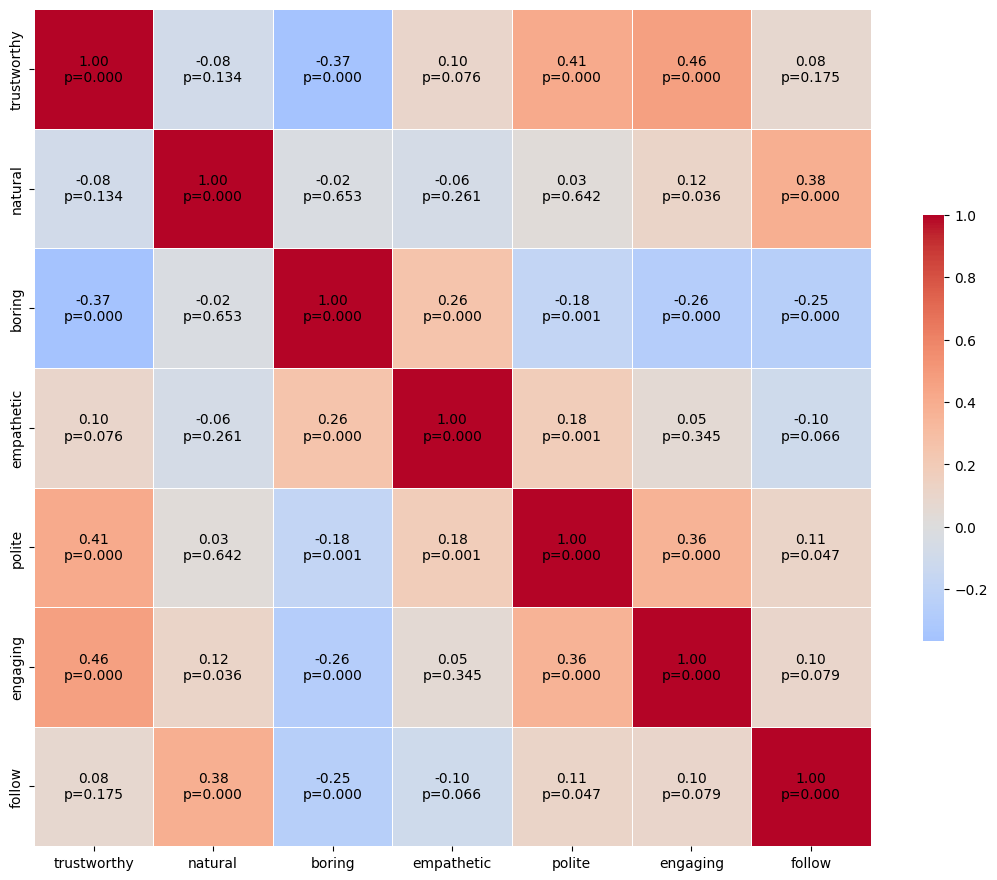

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

#trust_df_r = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_results_df_rec.csv')

#trust_df_r = trust_df_r[[ 'trustworthy','lively', 'natural', 'boring', 'empathetic', 'respectful', 'cold','engaging', 'following']]
#trust_df_r = trust_df_r.rename(columns={'following': 'follow'})

#print(trust_df_pol.columns)
#trust_df_hum_q = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_df_hum_q.csv')
#columns=['trustworthy', 'lively', 'natural','boring','empathetic', 'respectful', 'cold', 'engaging'] #'borning',
#columns=['trustworthy', 'natural','boring','empathetic', 'polite', 'engaging']# 'follow'
#columns=['trustworthy', 'lively','natural','boring','empathetic','respectful','cold','attractive','polite', 'engaging']
#columns=['trustworthy', 'natural','boring','empathetic', 'humor', 'engaging']
#columns = [ 'trustworthy', 'natural', 'empathetic', 'boring', 'engaging']

columns = ['trustworthy', 'natural','boring','empathetic','polite', 'engaging','follow']
#processed_results_df = trust_df_r
df = processed_results_df[columns]
#print(df)
# Initialize the matrix to store the correlation coefficients
corr = pd.DataFrame(index=df.columns, columns=df.columns, data=np.zeros((df.shape[1], df.shape[1])))

# Initialize the matrix to store the p-values
p_values = pd.DataFrame(index=df.columns, columns=df.columns, data=np.zeros((df.shape[1], df.shape[1])))


# Calculate correlation coefficient and p-value for each pair of variables
for row in df.columns:
    for col in df.columns:
        if row != col:
            corr.loc[row, col], p_values.loc[row, col] = pearsonr(df[row], df[col])
        else:
            corr.loc[row, col], p_values.loc[row, col] = 1, 0


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with combined mask
sns.heatmap(corr, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False)

# Annotate each cell with the correlation coefficient and p-value
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        #if not mask.iloc[i, j]:  # Only annotate significant values and lower triangle
      text = f"{corr.iloc[i, j]:.2f}\np={p_values.iloc[i, j]:.3f}"
      plt.text(j+0.5, i+0.5, text, ha='center', va='center', color="black")

# Adjust layout
plt.tight_layout()
plt.show()


#OLR for CATEGORICAL acoustic features

In [ ]:
'''
processed_results_df_2 = pd.read_csv('/content/drive/MyDrive/speech generation/processed_results_df_2.csv')
processed_results_df_2 = processed_results_df_2[['survey', 'fname', 'order_in_survey','trustworthy', 'lively', 'natural','borning', 'empathetic', 'respectful', 'cold', 'engaging','pitch', 'intensity', 'rate','gender']]
processed_results_df_2.columns
'''

In [ ]:
#processed_results_df = pd.read_csv('/content/drive/MyDrive/speech generation/processed_results_df_comb_norm.csv')


In [ ]:
'''
processed_results_df= processed_results_df[processed_results_df['intensity']!= 'high']
processed_results_df= processed_results_df[processed_results_df['intensity']!='low']

# replace the high and low with medium
processed_results_df['intensity'] = processed_results_df['intensity'].replace({'high': 'medium', 'low': 'medium'})
processed_results_df['intensity'].value_counts()
'''

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
from google.colab import drive
drive.mount('/content/drive')
'''
# Load your data
folder_path = '/content/drive/MyDrive/speech generation/processed_results_df.csv'

processed_results_df = pd.read_csv(folder_path)
#df = df[df['survey']<7]
#processed_results_df = processed_results_df.dropna(subset=['_1'])
processed_results_df = processed_results_df.rename(columns = {'_1':'trustworthy','_2':'lively','_3':'natural','_4':'empathetic','_5':'respectful','_6':'cold','_7':'engage'})
'''
df_dummies = pd.get_dummies(processed_results_df, columns=['intensity', 'pitch', 'rate'],drop_first=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### intensity

In [ ]:
# Assuming 'response' is your ordinal variable and the rest are predictors
#### rate
import statsmodels.api as sm

trait_columns = ['trustworthy', 'lively', 'natural', 'boring','empathetic', 'respectful', 'cold', 'engaging'] #'borning',
#columns=['trustworthy', 'lively', 'natural','boring','empathetic', 'respectful', 'cold', 'engaging']

for t in trait_columns:
  y = df_dummies[t]
  X = df_dummies.drop(['Unnamed: 0','rate_medium','boring', 'rate_slow','pitch_medium', 'pitch_low','survey', 'fname', 'order_in_survey','trustworthy','lively','natural','empathetic','respectful','cold','engaging','gender'], axis=1) #'borning',
  X = sm.add_constant(X)  # Add a constant to the model
  #model = sm.OLS(y, X).fit()
  model = sm.GLS(y, X).fit()
  print(model.summary())

                            GLS Regression Results                            
Dep. Variable:            trustworthy   R-squared:                       0.040
Model:                            GLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     10.23
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           4.44e-05
Time:                        18:24:58   Log-Likelihood:                -269.60
No. Observations:                 496   AIC:                             545.2
Df Residuals:                     493   BIC:                             557.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3405      0.036  

### rate

In [ ]:
# Assuming 'response' is your ordinal variable and the rest are predictors
for t in trait_columns:
  y = df_dummies[t]
  X = df_dummies.drop(['intensity_x-soft','intensity_x-loud','pitch_medium', 'pitch_low','survey', 'fname', 'order_in_survey','trustworthy','lively','natural','empathetic','respectful','borning','cold','engaging','gender'], axis=1)
  X = sm.add_constant(X)  # Add a constant to the model
  #model = sm.OLS(y, X).fit()
  model = sm.GLS(y, X).fit()
  print(model.summary())

                            GLS Regression Results                            
Dep. Variable:            trustworthy   R-squared:                       0.097
Model:                            GLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     40.69
Date:                Thu, 08 Feb 2024   Prob (F-statistic):           1.65e-17
Time:                        18:46:05   Log-Likelihood:                -408.74
No. Observations:                 759   AIC:                             823.5
Df Residuals:                     756   BIC:                             837.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0457      0.027      1.720      

### pitch

In [ ]:
# Assuming 'response' is your ordinal variable and the rest are predictors
for t in trait_columns:
  y = df_dummies[t]
  X = df_dummies.drop(['intensity_x-soft','intensity_x-loud','rate_medium', 'rate_slow','survey', 'fname', 'order_in_survey','trustworthy','lively','natural','empathetic','respectful','cold','engaging','borning','gender'], axis=1)
  X = sm.add_constant(X)  # Add a constant to the model
  model = sm.OLS(y, X).fit()
  print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            trustworthy   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     9.504
Date:                Thu, 08 Feb 2024   Prob (F-statistic):           8.39e-05
Time:                        18:55:43   Log-Likelihood:                -438.11
No. Observations:                 759   AIC:                             882.2
Df Residuals:                     756   BIC:                             896.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2931      0.027     10.904   

## OLS for speaker gender

In [ ]:
processed_results_df

Unnamed: 0  survey                                             fname  \
0           0.0      28      1_F_intensity_x-loud_pitch_low_rate_slow.wav   
1           1.0      28   1_M_intensity_x-loud_pitch_medium_rate_slow.wav   
2           2.0      28   2_F_intensity_x-soft_pitch_medium_rate_slow.wav   
3           3.0      28   2_M_intensity_x-loud_pitch_medium_rate_fast.wav   
4           4.0      28   3_F_intensity_x-soft_pitch_medium_rate_slow.wav   
..          ...     ...                                               ...   
754         NaN      27     8_M_intensity_high_pitch_medium_rate_fast.mp3   
755         NaN      27      9_F_intensity_low_pitch_high_rate_medium.mp3   
756         NaN      27   9_M_intensity_medium_pitch_medium_rate_slow.mp3   
757         NaN      27       10_F_intensity_high_pitch_low_rate_slow.mp3   
758         NaN      27  10_M_intensity_high_pitch_medium_rate_medium.mp3   

     order_in_survey  trustworthy    lively   natural    boring  empathetic  \
0                  1    -0.214833  0.145544 -0.550481 -0.169219    0.595837   
1                  2     0.393169 -0.097071 -0.139532 -0.181823   -0.389139   
2                  3     0.380565  0.122075 -0.152137 -0.574554    0.588846   
3                  4    -0.746761  0.308417 -0.537103 -0.418222   -0.076718   
4                  5    -0.319334  0.416639 -0.040645 -0.228159    0.393169   
..               ...          ...       ...       ...       ...         ...   
754               16    -0.401692  0.127129  0.002886  0.299467   -0.277073   
755               17    -0.103225  0.278247  0.301352  0.002886    0.448700   
756               18     0.858181  0.427480  0.745282 -0.146347    0.745282   
757               19    -0.314916 -0.146347 -0.205411  0.375153   -0.277073   
758               20     0.338819  0.080081  0.314205 -0.403201    0.743397   

     respectful      cold  engaging gender   pitch intensity    rate  
0      0.131562  0.108867  0.102479      F     low    x-loud    slow  
1      0.124572 -0.228159  0.131562      M  medium    x-loud    slow  
2     -0.153514 -0.606908  0.305147      F  medium    x-soft    slow  
3      0.380565  0.281677 -0.046862      M  medium    x-loud    fast  
4      0.536897 -0.633494  0.536897      F  medium    x-soft    slow  
..          ...       ...       ...    ...     ...       ...     ...  
754    0.558206  0.044123 -0.142953      M  medium    medium    fast  
755    0.448700 -0.572145  0.448700      F    high    medium  medium  
756    0.170251 -0.550925  0.340704      M  medium    medium    slow  
757   -0.919168 -0.347226 -0.180796      F     low    medium    slow  
758   -0.349111 -0.698273  0.484658      M  medium    medium  medium  

[759 rows x 16 columns]

In [ ]:
#processed_results_df = processed_results_df.rename(columns = {'_1':'trustworthy','_2':'lively','_3':'natural','_4':'empathetic','_5':'respectful','_6':'cold','_7':'engage'})
df_dummies = pd.get_dummies(processed_results_df, columns=['gender'],drop_first=False)

In [ ]:
# Assuming 'response' is your ordinal variable and the rest are predictors
#### rate
import statsmodels.api as sm

trait_columns = ['trustworthy', 'lively', 'natural', 'empathetic', 'respectful', 'cold', 'engaging']

for t in trait_columns:
  y = df_dummies[t]
  X = df_dummies.drop(['Unnamed: 0','gender_F','survey', 'fname', 'order_in_survey','boring','trustworthy','lively','natural','empathetic','respectful','cold','engaging','intensity','pitch','rate'], axis=1)
  X = sm.add_constant(X)  # Add a constant to the model
  model = sm.GLS(y, X).fit()
  print(model.summary())

                            GLS Regression Results                            
Dep. Variable:            trustworthy   R-squared:                       0.000
Model:                            GLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.09924
Date:                Thu, 15 Feb 2024   Prob (F-statistic):              0.753
Time:                        16:23:16   Log-Likelihood:                -447.48
No. Observations:                 759   AIC:                             899.0
Df Residuals:                     757   BIC:                             908.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2396      0.022     10.831      0.0

## which combination has the highest rating

[link text](https://)# highest trustworthy rating

In [ ]:
processed_results_df_all_unnorm
# replace the high and low with medium
processed_results_df_all_unnorm['intensity'] = processed_results_df_all_unnorm['intensity'].replace({'high': 'medium', 'low': 'medium'})
processed_results_df_all_unnorm['intensity'].value_counts()

medium    540
x-loud    185
x-soft    175
Name: intensity, dtype: int64

In [ ]:
processed_results_df = pd.read_csv('/content/drive/MyDrive/speech generation/processed_results_df_all_unnorm.csv')
processed_results_df

Unnamed: 0  survey                                             fname  \
0             0      28      1_F_intensity_x-loud_pitch_low_rate_slow.wav   
1             1      28   1_M_intensity_x-loud_pitch_medium_rate_slow.wav   
2             2      28   2_F_intensity_x-soft_pitch_medium_rate_slow.wav   
3             3      28   2_M_intensity_x-loud_pitch_medium_rate_fast.wav   
4             4      28   3_F_intensity_x-soft_pitch_medium_rate_slow.wav   
..          ...     ...                                               ...   
895         895      27     8_M_intensity_high_pitch_medium_rate_fast.mp3   
896         896      27      9_F_intensity_low_pitch_high_rate_medium.mp3   
897         897      27   9_M_intensity_medium_pitch_medium_rate_slow.mp3   
898         898      27       10_F_intensity_high_pitch_low_rate_slow.mp3   
899         899      27  10_M_intensity_high_pitch_medium_rate_medium.mp3   

     order_in_survey  trustworthy  lively  natural  empathetic  respectful  \
0                  1          3.2     3.6      3.0         4.0         3.6   
1                  2          3.8     3.4      3.4         3.2         3.6   
2                  3          3.8     3.6      3.4         4.0         3.4   
3                  4          2.8     3.8      3.0         3.4         3.8   
4                  5          3.2     3.8      3.4         3.8         4.0   
..               ...          ...     ...      ...         ...         ...   
895               16          3.2     3.8      3.4         3.4         4.0   
896               17          3.6     4.0      3.8         4.0         4.0   
897               18          4.6     4.2      4.4         4.4         4.2   
898               19          3.2     3.2      3.2         3.4         2.8   
899               20          4.2     4.0      4.2         4.4         3.8   

     cold  engaging gender   pitch intensity    rate  
0     3.6       3.6      F     low    x-loud    slow  
1     3.4       3.6      M  medium    x-loud    slow  
2     3.0       3.8      F  medium    x-soft    slow  
3     3.8       3.4      M  medium    x-loud    fast  
4     3.0       4.0      F  medium    x-soft    slow  
..    ...       ...    ...     ...       ...     ...  
895   3.8       3.4      M  medium      high    fast  
896   3.2       4.0      F    high       low  medium  
897   3.0       4.2      M  medium    medium    slow  
898   3.8       3.2      F     low      high    slow  
899   2.8       4.2      M  medium      high  medium  

[900 rows x 15 columns]

In [ ]:
column_names = processed_results_df.columns[4:11]  # Trustworthy to engage columns
grouped_data = processed_results_df.groupby(['gender'])[column_names].mean()
print(grouped_data)

        trustworthy    lively   natural  empathetic  respectful      cold  \
gender                                                                      
F          3.617132  3.605021  3.401111    3.308497    3.671899  3.009365   
M          3.625741  3.620942  3.418751    3.317714    3.693381  3.034101   

        engaging  
gender            
F       3.545153  
M       3.537741  


In [ ]:
# Aggregating the value of the columns '_1' to '_7' by the same combination of intensity, pitch, and rate
# to find out which combination of intensity, pitch, rate, and gender has the highest trustworthy ratings.

# Identifying columns '_1' to '_7'
column_names = processed_results_df.columns[4:11]  # Trustworthy to engage columns
print(column_names)
# Grouping data by 'intensity', 'pitch', 'rate', and 'gender', and calculating the mean of each group
grouped_data = processed_results_df.groupby(['intensity', 'pitch', 'rate', 'gender'])[column_names].mean()
#print(grouped_data)
# Finding the combination with the highest average 'trustworthy' rating
highest_trustworthy = grouped_data['trustworthy'].idxmax()
highest_trustworthy_value = grouped_data['trustworthy'].max()

print('highest_trustworthy',highest_trustworthy, highest_trustworthy_value)

top_10_trustworthy_combinations = grouped_data['trustworthy'].sort_values(ascending=False).head(30)
top_10_trustworthy_combinations

Index(['trustworthy', 'lively', 'natural', 'empathetic', 'respectful', 'cold',
       'engaging'],
      dtype='object')
highest_trustworthy ('high', 'medium', 'medium', 'M') 4.126666666699999


intensity  pitch   rate    gender
high       medium  medium  M         4.126667
medium     medium  slow    F         4.090000
high       high    medium  M         4.055000
low        medium  medium  M         4.031667
           high    medium  F         4.028333
           medium  slow    M         4.006667
medium     medium  medium  F         4.002857
                           M         3.995000
x-loud     high    medium  F         3.986147
low        medium  medium  F         3.985476
           low     slow    F         3.965000
medium     high    slow    M         3.946667
x-soft     high    slow    M         3.945455
low        high    slow    F         3.933333
high       low     medium  M         3.913333
low        high    medium  M         3.902619
high       high    slow    F         3.896667
x-loud     high    medium  M         3.875000
medium     high    medium  F         3.857143
                   slow    F         3.855000
x-soft     high    medium  M         3.843915


In [ ]:
# least 10
lowest_trustworthy = grouped_data['trustworthy'].idxmin()
lowest_trustworthy_trustworthy_value = grouped_data['trustworthy'].min()

print('highest_trustworthy',lowest_trustworthy, lowest_trustworthy_trustworthy_value)

least_trustworthy_combinations = grouped_data['trustworthy'].sort_values(ascending=True).head(10)
least_trustworthy_combinations

highest_trustworthy ('x-loud', 'medium', 'fast', 'M') 2.9047619047


intensity  pitch   rate  gender
x-loud     medium  fast  M         2.904762
high       low     fast  F         3.066667
           medium  fast  M         3.128095
x-loud     low     fast  F         3.140260
medium     medium  fast  M         3.141429
x-loud     low     fast  M         3.154286
x-soft     low     fast  M         3.175000
low        medium  fast  M         3.181190
x-loud     high    fast  F         3.285714
low        low     fast  F         3.286429
Name: trustworthy, dtype: float64

## correlation with speaker gender

In [ ]:
F = processed_results_df_all[processed_results_df_all['gender']=='F'].iloc[:,-7:]
M = processed_results_df_all[processed_results_df_all['gender']=='M'].iloc[:,-7:]
#new_column_names = ['trustworthy', 'lively', 'natural','empathetic', 'respectful', 'cold','engage']
#F.columns = new_column_names
#M.columns = new_column_names

#print('female correlation',F.corr())
#print('male correlation',M.corr())

In [ ]:
F

respectful      cold  engaging gender   pitch intensity    rate
0      0.131562  0.108867  0.102479      F     low    x-loud    slow
2     -0.153514 -0.606908  0.305147      F  medium    x-soft    slow
4      0.536897 -0.633494  0.536897      F  medium    x-soft    slow
6      1.147397 -0.798710  0.513428      F  medium    x-soft    slow
8      0.073396  0.807992 -0.145750      F  medium    x-soft    slow
..          ...       ...       ...    ...     ...       ...     ...
890    0.896159 -0.836528 -0.002101      F  medium    medium    fast
892    0.444366  0.344770 -0.453894      F     low    medium    slow
894    0.443665 -0.258788  0.398923      F  medium    medium    fast
896    0.443665 -0.573816  0.443665      F    high    medium  medium
898   -0.922524 -0.333967 -0.197207      F     low    medium    slow

[450 rows x 7 columns]

In [ ]:
from scipy.stats import pearsonr
import numpy as np

# Function to calculate p-values for each pair in the correlation matrix
def calculate_p_values(df):
    p_values = pd.DataFrame(index=df.columns, columns=df.columns)
    for row in df.columns:
        for col in df.columns:
            if row != col:
                _, p_value = pearsonr(df[row], df[col])
                p_values[row][col] = p_value
            else:
                p_values[row][col] = np.nan
    return p_values

# Calculating p-values for the aggregated correlation matrix
p_values = calculate_p_values(F)
p_values

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U3')) -> None

In [ ]:
correlation_matrix = F.corr()
p_value_matrix = pd.DataFrame(index=F.columns, columns=F.columns)

for i in range(len(F.columns)):
    for j in range(i+1, len(F.columns)):
        corr_test = pearsonr(F.iloc[:, i], F.iloc[:, j])
        p_value_matrix.iloc[i, j] = corr_test[1]
        p_value_matrix.iloc[j, i] = corr_test[1]

# Mask for significant correlations (p < 0.05)
mask = p_value_matrix > 0.06

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title("Correlation Heatmap (Significant Correlations Only)")
plt.show()


In [ ]:
correlation_matrix = M.corr()
p_value_matrix = pd.DataFrame(index=M.columns, columns=M.columns)

for i in range(len(M.columns)):
    for j in range(i+1, len(M.columns)):
        corr_test = pearsonr(M.iloc[:, i], M.iloc[:, j])
        p_value_matrix.iloc[i, j] = corr_test[1]
        p_value_matrix.iloc[j, i] = corr_test[1]

# Mask for significant correlations (p < 0.05)
mask = p_value_matrix > 0.06

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title("Correlation Heatmap (Significant Correlations Only)")
plt.show()


# Extrac/OLR audio acoustic values

## extract acoustic features

In [ ]:
!pip install librosa numpy praat-parselmouth
!pip install pydub

In [ ]:
import numpy as np
from google.colab import drive
import string
import pandas as pd
import re
import parselmouth
from parselmouth.praat import call
import sys
import os
import subprocess

drive.mount('/content/drive')
path = '/content/drive/MyDrive/speechgeneration/question_dialogue_act/humor/humor_question_audio'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def read_files_in_directory(root_directory):
  all_files = []
  for current_directory, directories, files in os.walk(root_directory):
    for file in files:
      # Construct full file path
      file_path = os.path.join(current_directory, file)
      all_files.append(file_path)
  return all_files

# Example usage
root_directory = path  # Replace with the path to your directory
print(read_files_in_directory(root_directory))

['/content/drive/MyDrive/speechgeneration/question_dialogue_act/humor/humor_question_audio/.DS_Store', '/content/drive/MyDrive/speechgeneration/question_dialogue_act/humor/humor_question_audio/q4_F_wav/4_F_intensity_x-loud_pitch_high_rate_slow.wav', '/content/drive/MyDrive/speechgeneration/question_dialogue_act/humor/humor_question_audio/q4_F_wav/4_F_intensity_medium_pitch_low.wav', '/content/drive/MyDrive/speechgeneration/question_dialogue_act/humor/humor_question_audio/q4_F_wav/4_F_intensity_x-loud_pitch_low_rate_fast.wav', '/content/drive/MyDrive/speechgeneration/question_dialogue_act/humor/humor_question_audio/q4_F_wav/4_F_intensity_x-soft_pitch_low_rate_slow.wav', '/content/drive/MyDrive/speechgeneration/question_dialogue_act/humor/humor_question_audio/q4_F_wav/4_F_intensity_x-loud_pitch_medium.wav', '/content/drive/MyDrive/speechgeneration/question_dialogue_act/humor/humor_question_audio/q4_F_wav/4_F_intensity_x-loud.wav', '/content/drive/MyDrive/speechgeneration/question_dialogu

In [ ]:
column_names = ['filename', 'Duration', 'Min_Pitch', 'Max_Pitch', 'Mean_Pitch', 'SD_Pitch', 'Median_Pitch', 'MAS_F0', 'VCD2TOT_Frames', 'Min_Intensity', 'Max_Intensity', 'Mean_Intensity', 'SD_Intensity', 'Median_Intensity', 'Jitter', 'Shimmer', 'HNR']

def extract_features(sound):
  beg_output_df = []#pd.DataFrame(columns=column_names)
  for wave_path in read_files_in_directory(root_directory):
    if not wave_path.endswith('.DS_Store'):
      fname = str(wave_path)
      sound = parselmouth.Sound(wave_path)
      min_duration = 6.5/75  # min_duration = 6.4 / min pitch

      # Get duration
      duration = call(sound, 'Get total duration')
      if duration < min_duration:
          return None

      # Create pitch object
      pitch = call(sound, 'To Pitch', 0.0, 75.0, 600.0)
      min_pitch = call(pitch, 'Get minimum', 0.0, 0.0, 'Hertz', 'Parabolic')
      max_pitch = call(pitch, 'Get maximum', 0.0, 0.0, 'Hertz', 'Parabolic')
      mean_pitch = call(pitch, 'Get mean', 0.0, 0.0, 'Hertz')
      sd_pitch = call(pitch, 'Get standard deviation', 0.0, 0.0, 'Hertz')

      # Create intensity object
      intensity = call(sound, 'To Intensity', 75.0, 0.0, 'yes')
      min_intensity = call(intensity, 'Get minimum', 0.0, 0.0, 'Parabolic')
      max_intensity = call(intensity, 'Get maximum', 0.0, 0.0, 'Parabolic')
      mean_intensity = call(intensity, 'Get mean', 0.0, 0.0, 'energy')
      sd_intensity = call(intensity, 'Get standard deviation', 0.0, 0.0)

      # Create jitter and shimmer objects
      point_process = call(sound, 'To PointProcess (periodic, cc)', 75.0, 600.0)
      jitter = call(point_process, 'Get jitter (local)', 0.0, 0.0, 0.0001, 0.02, 1.3)
      shimmer = call([sound, point_process], 'Get shimmer (local)', 0.0, 0.0, 0.0001, 0.02, 1.3, 1.6)

      # Create hnr object
      harmonicity = call(sound, 'To Harmonicity (cc)', 0.01, 75, 0.1, 1.0)
      hnr = call(harmonicity, "Get mean", 0.0, 0.0)

      # Get mean absolute slope f0
      mas_f0 = call(pitch, "Get mean absolute slope...", 'Hertz')

      # Get voiced to total frames
      vcd_frames = call(pitch, 'Count voiced frames')
      tot_frames = call(pitch, 'Get number of frames')
      vcd2tot_frames = vcd_frames / tot_frames

      # Get median f0
      median_pitch = call(pitch, 'Get quantile', 0.0, 0.0, 0.5, 'Hertz')

      # Get median intensity
      median_intensity = call(intensity, 'Get quantile', 0.0, 0.0, 0.5)
      beg_output_df.append([fname, duration, min_pitch, max_pitch, mean_pitch, sd_pitch, median_pitch, mas_f0,
                     vcd2tot_frames, min_intensity, max_intensity, mean_intensity, sd_intensity,
                     median_intensity, jitter, shimmer, hnr])
      #row = pd.Series([fname, duration, min_pitch, max_pitch, mean_pitch, sd_pitch, median_pitch, mas_f0, vcd2tot_frames,min_intensity, max_intensity, mean_intensity, sd_intensity, median_intensity,jitter, shimmer, hnr], index=column_names)
    #beg_output_df = beg_output_df.append(row, ignore_index=True)
  return beg_output_df

beg_output_df = extract_features(root_directory)
acoustic_df = pd.DataFrame(beg_output_df,columns=column_names)
acoustic_df.head()

filename  Duration   Min_Pitch  \
0  /content/drive/MyDrive/speechgeneration/questi...  3.184717  141.438949   
1  /content/drive/MyDrive/speechgeneration/questi...  2.479410   92.637053   
2  /content/drive/MyDrive/speechgeneration/questi...  1.956961   96.167523   
3  /content/drive/MyDrive/speechgeneration/questi...  3.210839   92.494212   
4  /content/drive/MyDrive/speechgeneration/questi...  2.583900  116.292185   

    Max_Pitch  Mean_Pitch   SD_Pitch  Median_Pitch      MAS_F0  \
0  345.926769  198.097768  35.226617    189.226511  345.059032   
1  221.906906  128.509052  23.929854    121.457818  264.737712   
2  222.481954  129.196900  25.029267    121.696765  264.065252   
3  221.625814  127.344499  22.604198    121.108268  210.758549   
4  283.437524  161.606192  32.776269    151.770578  291.315341   

   VCD2TOT_Frames  Min_Intensity  Max_Intensity  Mean_Intensity  SD_Intensity  \
0        0.711111      38.366021      81.590065       75.428468      7.929606   
1        0.672131      43.233138      75.309217       69.762271      6.861393   
2        0.666667      53.136813      78.924023       73.703306      5.889717   
3        0.666667      29.063222      71.595993       65.726562      7.784932   
4        0.698039      47.390411      80.908332       75.315810      7.218102   

   Median_Intensity    Jitter   Shimmer        HNR  
0         74.752790  0.020802  0.073222  13.309424  
1         69.492390  0.026513  0.099025  10.647600  
2         73.363019  0.030781  0.119886   9.884476  
3         65.338610  0.021683  0.091671  11.904067  
4         74.883519  0.023618  0.094334  11.181307

In [ ]:
acoustic_df.to_csv('/content/drive/MyDrive/speechgeneration/hum_q_acoustic.csv')

## map the acoustic features to file name

In [ ]:
#processed_results_df['filename'] = processed_results_df['filename'].str.extract(r'([^/]+)\.wav$')
processed_results_df.to_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_df_rec_pol.csv')

In [ ]:
file_path = '/content/drive/MyDrive/speechgeneration/6_datasets/processed_df_rec_pol.csv'

print(file_path)
processed_results_df = pd.read_csv(file_path)
processed_results_df


/content/drive/MyDrive/speechgeneration/6_datasets/processed_df_hum_q.csv


Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  survey  \
0               0             0           0       1   
1               1             1           1       1   
2               2             2           2       1   
3               3             3           3       1   
4               4             4           4       1   
..            ...           ...         ...     ...   
320           320           320         346      13   
321           321           321         347      13   
322           322           322         348      13   
323           323           323         349      13   
324           324           324         350      13   

                                          filename  order_in_survey  \
0    1_M_intensity_medium_pitch_medium_rate_medium                1   
1      1_F_intensity_medium_pitch_medium_rate_slow                2   
2     10_M_intensity_x-soft_pitch_high_rate_medium                3   
3        9_M_intensity_x-soft_pitch_high_rate_slow                4   
4      4_M_intensity_x-soft_pitch_high_rate_medium                5   
..                                             ...              ...   
320     8_M_intensity_medium_pitch_low_rate_medium               23   
321    6_M_intensity_medium_pitch_medium_rate_fast               24   
322     3_F_intensity_x-soft_pitch_low_rate_medium               25   
323       9_M_intensity_x-loud_pitch_low_rate_slow               26   
324     6_F_intensity_x-soft_pitch_low_rate_medium               27   

     trustworthy    lively   natural    boring  ...  Max_Intensity  \
0       0.363115  0.352090 -0.269601 -1.183630  ...            NaN   
1       0.461171 -0.116346  0.473530 -0.550914  ...            NaN   
2       0.317430 -0.103060  0.334196 -1.112999  ...            NaN   
3       0.656631 -0.243955  0.032795 -0.683923  ...            NaN   
4       0.317430 -0.103060  0.186049 -0.410946  ...            NaN   
..           ...       ...       ...       ...  ...            ...   
320     0.807568 -1.223888  0.840304  0.785463  ...            NaN   
321     0.796540 -1.223888  0.785685  0.774562  ...            NaN   
322     0.818564 -1.223888  0.818328  0.785463  ...            NaN   
323     0.818610 -1.223888  0.829261  0.763675  ...            NaN   
324     0.807582 -1.223888  0.785699  0.807490  ...            NaN   

     Mean_Intensity  SD_Intensity  Median_Intensity  Jitter  Shimmer HNR  \
0               NaN           NaN               NaN     NaN      NaN NaN   
1               NaN           NaN               NaN     NaN      NaN NaN   
2               NaN           NaN               NaN     NaN      NaN NaN   
3               NaN           NaN               NaN     NaN      NaN NaN   
4               NaN           NaN               NaN     NaN      NaN NaN   
..              ...           ...               ...     ...      ...  ..   
320             NaN           NaN               NaN     NaN      NaN NaN   
321             NaN           NaN               NaN     NaN      NaN NaN   
322             NaN           NaN               NaN     NaN      NaN NaN   
323             NaN           NaN               NaN     NaN      NaN NaN   
324             NaN           NaN               NaN     NaN      NaN NaN   

    file_order num_word speaking_rate  
0            1       26           NaN  
1            1       26           NaN  
2           10       11           NaN  
3            9       16           NaN  
4            4       12           NaN  
..         ...      ...           ...  
320          8       21           NaN  
321          6       21           NaN  
322          3       20           NaN  
323          9       16           NaN  
324          6       21           NaN  

[325 rows x 39 columns]

In [ ]:
'''
processed_results_df_all_unnorm['fname'] = processed_results_df_all_unnorm['fname'].str.replace('intensity_high', 'intensity_loud')
processed_results_df_all_unnorm['fname'] = processed_results_df_all_unnorm['fname'].str.replace('intensity_low', 'intensity_soft')

praat_features = pd.read_csv("/content/drive/MyDrive/speech generation/all_acoustic.csv")
praat_features = praat_features.rename(columns={'Filename': 'fname'})

praat_features_2 = pd.read_csv("/content/drive/MyDrive/speech generation/all_acoustic_2.csv")
praat_features_2 = praat_features_2.rename(columns={'Filename': 'fname'})
'''



In [ ]:
praat_features = pd.read_csv('/content/drive/MyDrive/speechgeneration/polite_rec_acoustic.csv')
praat_features['filename'] = praat_features['filename'].str.extract(r'([^/]+)\.wav$')
praat_features

Unnamed: 0                                     filename  Duration  \
0             0              4_F_intensity_x-loud_pitch_high  3.524308   
1             1     4_F_intensity_x-soft_pitch_low_rate_fast  2.636145   
2             2   4_F_intensity_medium_pitch_low_rate_medium  3.341451   
3             3  4_F_intensity_x-loud_pitch_medium_rate_slow  4.281859   
4             4              4_F_intensity_medium_pitch_high  3.524308   
..          ...                                          ...       ...   
777         777     2_M_intensity_x-soft_pitch_low_rate_fast  2.479410   
778         778     2_M_intensity_medium_pitch_low_rate_fast  2.479410   
779         779    2_M_intensity_medium_pitch_high_rate_fast  2.766757   
780         780     2_M_intensity_x-loud_pitch_low_rate_slow  4.281859   
781         781  2_M_intensity_x-loud_pitch_medium_rate_fast  2.531655   

      Min_Pitch   Max_Pitch  Mean_Pitch   SD_Pitch  Median_Pitch      MAS_F0  \
0    127.105493  328.687999  191.802069  39.649993    186.247308  375.847765   
1     92.932804  211.139325  124.616095  25.876226    120.933333  227.454588   
2     93.993810  209.423913  124.484488  25.707658    119.809142  230.254030   
3    115.747203  264.145082  153.815084  30.926877    149.129363  223.164223   
4    126.945165  328.974491  191.835160  39.628802    186.112002  377.165376   
..          ...         ...         ...        ...           ...         ...   
777   74.844247  100.646369   83.672753   6.457963     82.005400   96.726569   
778   75.015025  100.504796   83.800323   6.419402     82.179112   95.868949   
779   76.348968  165.211046  120.338433  18.023363    122.117707  289.798929   
780   74.902224  118.943120   84.526707   7.897676     81.913975  103.677431   
781   75.129736  132.452069   99.097882  12.990157     99.405038  240.224014   

     VCD2TOT_Frames  Min_Intensity  Max_Intensity  Mean_Intensity  \
0          0.690544      36.508514      81.379167       75.199974   
1          0.650000      32.977438      71.245926       65.530031   
2          0.652568      33.641632      74.812287       69.193571   
3          0.684706      31.915090      81.278633       74.987560   
4          0.690544      32.298232      77.331657       71.117275   
..              ...            ...            ...             ...   
777        0.364754      23.903068      73.013737       66.937954   
778        0.360656      28.539478      75.798961       69.327940   
779        0.637363      29.633987      77.142878       70.854030   
780        0.385882      25.328377      81.155083       73.264927   
781        0.544000      33.779326      82.152618       73.676903   

     SD_Intensity  Median_Intensity    Jitter   Shimmer        HNR  
0        8.908055         74.058621  0.026852  0.070923  12.950558  
1        7.595082         64.832754  0.026315  0.088221  10.431133  
2        8.439473         68.260610  0.024710  0.086722  11.345004  
3        9.571454         73.879553  0.022465  0.064504  12.645529  
4        8.872558         69.951676  0.025461  0.067845  12.861405  
..            ...               ...       ...       ...        ...  
777      8.466952         66.161720  0.046570  0.151898   3.342469  
778      7.982476         68.029915  0.044146  0.125695   3.613309  
779      8.287356         69.194687  0.036744  0.126815   8.580321  
780      8.716779         71.416193  0.032766  0.100275   5.069281  
781      8.125408         71.192214  0.039799  0.133435   7.169347  

[782 rows x 18 columns]

In [ ]:
# List of attribute columns (excluding 'filename')
attribute_columns = [f"{col}" for col in praat_features.columns if col not in ['Unnamed: 0','filename']]

# Add each attribute to the target dataframe
for attribute in attribute_columns:
    attribute_dict = dict(zip(praat_features['filename'], praat_features[attribute]))
    processed_results_df[attribute] = processed_results_df['filename'].map(attribute_dict)


In [ ]:
# calcualte speaking rate
'''
#original question
corresponding_values = {
    1: 9,
    2: 9,  # Example, adjust as needed
    3: 5,   # Example, adjust as needed
    4: 7,
    5: 5,
    6: 14,
    7: 11,
    8:8,
    9:5,
    10:6
}

#original recommendation
corresponding_values = {
    1: 7,
    2: 8,
    3: 10,
    4: 12,
    5: 12,
    6: 6,
    7: 9,
    8:9,
    9:13,
    10:4
}
'''
'''
#humor question
corresponding_values = {
    1: 26,
    2: 16,  # Example, adjust as needed
    3: 20,   # Example, adjust as needed
    4: 12,
    5: 15,
    6: 21,
    7: 22,
    8:21,
    9:16,
    10:11
}
'''

'''
#humor rec
corresponding_values = {
    1: 20,
    2: 10,  # Example, adjust as needed
    3: 24,   # Example, adjust as needed
    4: 13,
    5: 17,
    6: 19,
    7: 21,
    8:19,
    9:19,
    10:16
}


#polite question
corresponding_values = {
    1: 17,
    2: 16,  # Example, adjust as needed
    3: 14,   # Example, adjust as needed
    4: 19,
    5: 20,
    6: 15,
    7: 19,
    8:13,
    9:20,
    10:21
}
'''

#polite recommendation
corresponding_values = {
    1: 16,
    2: 12,  # Example, adjust as needed
    3: 20,   # Example, adjust as needed
    4: 14,
    5: 17,
    6: 9,
    7: 11,
    8:19,
    9:16,
    10:10
}

# Function to calculate speaking rate
def calculate_speaking_rate(row):
    first_value = int(row['filename'].split('_')[0])  # Extract the first value and convert to int
    if first_value in corresponding_values:
        return corresponding_values[first_value] / (row['Duration']/60)
    else:
        return None  # or any placeholder value indicating no corresponding value was found

processed_results_df['file_order'] = processed_results_df['filename'].str.extract(r'(\d+)').astype(int)
processed_results_df['num_word'] = processed_results_df['file_order'].map(corresponding_values)
# Apply the function to create the new column
processed_results_df['speaking_rate'] = processed_results_df.apply(calculate_speaking_rate, axis=1)


In [ ]:
processed_results_df

filename  survey  order_in_survey  \
0      2_M_intensity_medium_pitch_medium_rate_slow       1                1   
1    8_F_intensity_x-soft_pitch_medium_rate_medium       1                2   
2       4_M_intensity_x-loud_pitch_low_rate_medium       1                3   
3      6_M_intensity_medium_pitch_medium_rate_fast       1                4   
4         1_M_intensity_medium_pitch_low_rate_slow       1                5   
..                                             ...     ...              ...   
346    1_M_intensity_medium_pitch_medium_rate_fast      13               23   
347  9_M_intensity_x-soft_pitch_medium_rate_medium      13               24   
348   10_F_intensity_x-loud_pitch_high_rate_medium      13               25   
349    9_M_intensity_medium_pitch_medium_rate_slow      13               26   
350      9_M_intensity_x-loud_pitch_high_rate_slow      13               27   

     trustworthy   natural    boring  empathetic    polite  engaging  \
0       0.742827  0.627711 -0.252259    0.308092  0.412105  0.850519   
1      -0.211816 -0.540286 -1.266189    0.184125  0.014894  0.524969   
2      -0.427422  0.140891 -1.375152   -0.483319  0.858322  0.361669   
3      -0.655402 -0.602115 -1.217784   -0.759794 -0.768266 -0.269294   
4       0.687220  0.135941 -0.589962    0.184125  0.634913  0.854421   
..           ...       ...       ...         ...       ...       ...   
346     0.292912 -0.896488  0.190819   -0.226784  0.139060  0.664112   
347     0.050870  0.009901 -0.741775   -0.442696  0.007859  0.427427   
348     0.262002 -0.214681 -1.173446    0.251290 -0.183772 -0.176373   
349     0.292912  0.004545 -1.026828   -0.478884  0.442920  0.862488   
350    -0.147506  0.197566 -0.922616    0.202922  0.040811  0.412011   

       follow  ... Max_Intensity Mean_Intensity SD_Intensity Median_Intensity  \
0    0.077703  ...     78.882393      70.953798     9.321032        69.309452   
1   -0.263901  ...     74.887077      67.631043    13.535514        67.134510   
2    0.524969  ...     81.104613      73.591086     7.686371        71.788836   
3   -0.157479  ...     76.651297      71.545045     7.027512        71.197566   
4   -0.539016  ...     75.211999      69.704153     7.812665        69.473674   
..        ...  ...           ...            ...          ...              ...   
346  0.496645  ...     76.218163      71.277786     7.261080        71.115504   
347  0.893398  ...     73.819809      67.868540     6.134235        67.473021   
348  0.658756  ...     82.242686      75.718915     8.868509        74.583158   
349  0.496645  ...     77.589893      71.352578     6.617256        70.620034   
350  1.128040  ...     81.949130      75.438587     6.644987        74.632557   

       Jitter   Shimmer        HNR  file_order  num_word  speaking_rate  
0    0.027797  0.102671   9.830427           2        12     174.540177  
1    0.022585  0.079218  12.340040           8        19     206.911028  
2    0.043665  0.100180   3.881096           4        14     259.502627  
3    0.033896  0.102894   7.344069           6         9     213.299178  
4    0.027037  0.093628   2.933260           1        16     166.353627  
..        ...       ...        ...         ...       ...            ...  
346  0.031735  0.092840   8.011015           1        16     278.588632  
347  0.030988  0.118736   8.703890           9        16     222.842164  
348  0.024501  0.082886  12.226849          10        10     212.841262  
349  0.027386  0.093372   8.986243           9        16     187.581416  
350  0.029600  0.085410  10.165876           9        16     179.342715  

[325 rows x 33 columns]

In [ ]:
print(processed_results_df.columns)
processed_results_df.to_csv(file_path)


Index(['filename', 'survey', 'order_in_survey', 'trustworthy', 'natural',
       'boring', 'empathetic', 'polite', 'engaging', 'follow', 'gender',
       'pitch', 'intensity', 'rate', 'Duration', 'Min_Pitch', 'Max_Pitch',
       'Mean_Pitch', 'SD_Pitch', 'Median_Pitch', 'MAS_F0', 'VCD2TOT_Frames',
       'Min_Intensity', 'Max_Intensity', 'Mean_Intensity', 'SD_Intensity',
       'Median_Intensity', 'Jitter', 'Shimmer', 'HNR', 'file_order',
       'num_word', 'speaking_rate'],
      dtype='object')


## pearson correlation analysis

In [ ]:
from scipy.stats import pearsonr

columns=['trustworthy', 'lively', 'natural','empathetic', 'respectful', 'cold', 'engaging']

corr = processed_results_df_all_norm_all.corr().loc[columns, attribute_columns]
print(corr)
p_values = processed_results_df_all_norm_all.corr(method=lambda x, y: pearsonr(x, y)[1]).loc[columns, attribute_columns]
print(p_values)

             Duration  mean_pitch  mean_intensity  speaking_rate
trustworthy  0.171590    0.046369       -0.042071      -0.272579
lively       0.080807    0.083482       -0.040499      -0.054905
natural      0.098060    0.068172        0.033990      -0.236196
empathetic   0.186592    0.013732       -0.021080      -0.231318
respectful   0.257676   -0.005622       -0.120849      -0.307451
cold         0.008170   -0.050673        0.021480      -0.046635
engaging     0.191902    0.094866       -0.035904      -0.293279
                 Duration  mean_pitch  mean_intensity  speaking_rate
trustworthy  2.230681e-07    0.164562        0.207335   8.494771e-17
lively       1.531655e-02    0.012232        0.224831   9.974479e-02
natural      3.231592e-03    0.040884        0.308404   7.082786e-13
empathetic   1.704694e-08    0.680781        0.527647   2.134581e-12
respectful   4.077361e-15    0.866242        0.000279   3.717522e-21
cold         8.066412e-01    0.128753        0.519847   1.621505e-

<ipython-input-51-29ebaa6f34f4>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = processed_results_df_all_norm_all.corr().loc[columns, attribute_columns]
<ipython-input-51-29ebaa6f34f4>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  p_values = processed_results_df_all_norm_all.corr(method=lambda x, y: pearsonr(x, y)[1]).loc[columns, attribute_columns]


## get the mean value of each acoustic feature

In [ ]:
attribute_columns = ['mean_pitch', 'mean_intensity','speaking_rate']

# Calculate the mean of each column
for g in ['F','M']:
  print(g)
  data = processed_results_df_all_norm_all[processed_results_df_all_norm_all['gender']==g]
  for f in ['pitch','intensity','rate']:
    print(f)
    if f == 'intensity':
      for d in ['x-loud','medium','x-soft']:
        mean_values = data[data[f]==d][attribute_columns].mean()
        #print("Mean values of each column:")
        print(d)
        print(round(mean_values,2))
    elif f == 'pitch':
      for d in ['high','medium','low']:
        mean_values = data[data[f]==d][attribute_columns].mean()
        print(d)
        print(round(mean_values,2))
    else:
      for d in ['fast','medium','slow']:
        mean_values = data[data[f]==d][attribute_columns].mean()
        #print("Mean values of each column:")
        print(d)
        print(round(mean_values,2))


F
pitch
high
mean_pitch        203.71
mean_intensity     52.62
speaking_rate     237.83
dtype: float64
medium
mean_pitch        163.16
mean_intensity     53.04
speaking_rate     240.16
dtype: float64
low
mean_pitch        131.39
mean_intensity     52.05
speaking_rate     244.16
dtype: float64
intensity
x-loud
mean_pitch        165.02
mean_intensity     57.19
speaking_rate     242.43
dtype: float64
medium
mean_pitch        166.08
mean_intensity     51.92
speaking_rate     240.12
dtype: float64
x-soft
mean_pitch        168.22
mean_intensity     49.70
speaking_rate     240.70
dtype: float64
rate
fast
mean_pitch        167.08
mean_intensity     49.85
speaking_rate     294.35
dtype: float64
medium
mean_pitch        166.53
mean_intensity     52.39
speaking_rate     236.07
dtype: float64
slow
mean_pitch        165.26
mean_intensity     55.40
speaking_rate     192.78
dtype: float64
M
pitch
high
mean_pitch        131.19
mean_intensity     52.55
speaking_rate     251.76
dtype: float64
medium
mea

## plot score vs acoustic

In [ ]:
d = pd.read_csv("/content/drive/MyDrive/speechgeneration/aggregated_df_tipi_intensity.csv")
d['Q02'].unique()
d['Q02'].value_counts()

2    51
1    24
3     2
Name: Q02, dtype: int64

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/speechgeneration/processed_results_df_all_norm_all.csv")
df

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  survey  \
0               0             0           0      28   
1               1             1           1      28   
2               2             2           2      28   
3               3             3           3      28   
4               4             4           4      28   
..            ...           ...         ...     ...   
895           895           895         895      27   
896           896           896         896      27   
897           897           897         897      27   
898           898           898         898      27   
899           899           899         899      27   

                                                fname  order_in_survey  \
0        1_F_intensity_x-loud_pitch_low_rate_slow.wav                1   
1     1_M_intensity_x-loud_pitch_medium_rate_slow.wav                2   
2     2_F_intensity_x-soft_pitch_medium_rate_slow.wav                3   
3     2_M_intensity_x-loud_pitch_medium_rate_fast.wav                4   
4     3_F_intensity_x-soft_pitch_medium_rate_slow.wav                5   
..                                                ...              ...   
895     8_M_intensity_loud_pitch_medium_rate_fast.mp3               16   
896     9_F_intensity_soft_pitch_high_rate_medium.mp3               17   
897   9_M_intensity_medium_pitch_medium_rate_slow.mp3               18   
898       10_F_intensity_loud_pitch_low_rate_slow.mp3               19   
899  10_M_intensity_loud_pitch_medium_rate_medium.mp3               20   

     trustworthy    lively   natural  empathetic  ...      cold  engaging  \
0      -0.214833  0.145544 -0.550481    0.595837  ...  0.108867  0.102479   
1       0.393169 -0.097071 -0.139532   -0.389139  ... -0.228159  0.131562   
2       0.380565  0.122075 -0.152137    0.588846  ... -0.606908  0.305147   
3      -0.746761  0.308417 -0.537103   -0.076718  ...  0.281677 -0.046862   
4      -0.319334  0.416639 -0.040645    0.393169  ... -0.633494  0.536897   
..           ...       ...       ...         ...  ...       ...       ...   
895    -0.409152  0.129338 -0.008127   -0.279114  ...  0.042641 -0.152465   
896    -0.108424  0.279001  0.292601    0.443665  ... -0.573816  0.443665   
897     0.857442  0.429365  0.745094    0.745094  ... -0.559515  0.344070   
898    -0.323856 -0.158491 -0.217534   -0.279114  ... -0.333967 -0.197207   
899     0.344770  0.088084  0.324444    0.745795  ... -0.710580  0.489108   

     gender   pitch intensity    rate  mean_pitch  mean_intensity  Duration  \
0         F     low    x-loud    slow  131.673160       35.397116  2.975737   
1         M  medium    x-loud    slow  107.282455       36.309071  2.845125   
2         F  medium    x-soft    slow  163.884831       33.580976  3.263084   
3         M  medium    x-loud    fast  105.020352       20.558996  1.930839   
4         F  medium    x-soft    slow  162.733330       64.362909  1.515102   
..      ...     ...       ...     ...         ...             ...       ...   
895       M  medium      high    fast  107.371327       66.845695  1.436735   
896       F    high       low  medium  204.025808       66.196799  1.436735   
897       M  medium    medium    slow  105.096544       67.492460  1.591247   
898       F     low      high    slow  128.803771       68.475653  1.747982   
899       M  medium      high  medium  155.302761       69.924251  1.382268   

     speaking_rate  
0       181.467652  
1       189.798358  
2       165.487624  
3       279.671169  
4       198.006466  
..             ...  
895     334.090909  
896     208.806818  
897     188.531365  
898     205.951794  
899     260.441616  

[900 rows x 21 columns]

In [ ]:
# Attempting to recalculate the mean and standard deviation for 'mean_intensity' to resolve the previous issue.
mean_intensity_mean = df['mean_intensity'].mean()
# Calculate the mean intensity values for the 'medium', 'x-loud', and 'x-soft' intensity settings
#mean_intensity_medium = df[df['intensity'].isin(['medium','x-soft','x-loud'])]['mean_intensity']
mean_intensity_x_loud = df[df['intensity'] == 'x-loud']['mean_intensity']
mean_intensity_x_soft = df[df['intensity'] == 'x-soft']['mean_intensity']
mean_intensity_medium = df[df['intensity']== 'medium']['mean_intensity']

#print(mean_intensity_medium.max(),mean_intensity_medium.min())
print('intensity')
print(mean_intensity_x_loud.max(),mean_intensity_x_loud.min())
print(mean_intensity_medium.max(),mean_intensity_medium.min())
print(mean_intensity_x_soft.max(),mean_intensity_x_soft.min())

# Attempting to recalculate the mean and standard deviation for 'mean_intensity' to resolve the previous issue.
# Calculate the mean intensity values for the 'medium', 'x-loud', and 'x-soft' intensity settings
#mean_intensity_medium = df[df['intensity'].isin(['medium','x-soft','x-loud'])]['mean_intensity']
mean_pitch_high = df[df['pitch'] == 'high']['mean_pitch']
mean_pitch_low = df[df['pitch'] == 'low']['mean_pitch']
mean_pitch_medium = df[df['pitch']== 'medium']['mean_pitch']

#print(mean_intensity_medium.max(),mean_intensity_medium.min())
print('pitch')
print(mean_pitch_high.max(),mean_pitch_high.min())
print(mean_pitch_medium.max(),mean_pitch_medium.min())
print(mean_pitch_low.max(),mean_pitch_low.min())


# Attempting to recalculate the mean and standard deviation for 'mean_intensity' to resolve the previous issue.
# Calculate the mean intensity values for the 'medium', 'x-loud', and 'x-soft' intensity settings
#mean_intensity_medium = df[df['intensity'].isin(['medium','x-soft','x-loud'])]['mean_intensity']
mean_rate_fast = df[df['rate'] == 'fast']['speaking_rate']
mean_rate_slow = df[df['rate'] == 'slow']['speaking_rate']
mean_rate_medium = df[df['rate']== 'medium']['speaking_rate']

#print(mean_intensity_medium.max(),mean_intensity_medium.min())
print('rate')
print(mean_rate_fast.max(),mean_rate_fast.min())
print(mean_rate_slow.max(),mean_rate_slow.min())
print(mean_rate_medium.max(),mean_rate_medium.min())








intensity
73.67197240033482 13.320648517204871
70.0303663674469 9.021151435057073
65.58357396919921 8.774996663614408
pitch
212.33837917516155 117.11908312184984
170.34888865582437 95.11863672510188
223.4774813673904 82.42195617044122
rate
383.9011084672973 235.13497501925397
240.27709311677867 162.8797723759627
311.1037953252128 195.1743242578721


In [ ]:
# Finding the highest mean_intensity where intensity column is labeled as 'high'
# Note: Assuming the intensity levels might be in the "intensity" column and looking for the exact label "high"

# Filtering the data where intensity is labeled as 'high'
high_intensity_data = df[df['intensity'] == 'x-loud']
mean_intensity_data = df[df['intensity'].isin(['medium', 'high', 'low'])]
low_intensity_data = df[df['intensity'] == 'x-soft']

# Finding the highest mean_intensity in this filtered dataset
highest_mean_intensity_high_intensity = high_intensity_data['mean_intensity'].max()
highest_mean_intensity_low_intensity = high_intensity_data['mean_intensity'].min()

medium_mean_intensity_high_intensity = mean_intensity_data['mean_intensity'].max()
medium_mean_intensity_low_intensity = mean_intensity_data['mean_intensity'].min()

low_mean_intensity_high_intensity = low_intensity_data['mean_intensity'].max()
low_mean_intensity_low_intensity = low_intensity_data['mean_intensity'].min()

print(highest_mean_intensity_high_intensity,highest_mean_intensity_low_intensity)
print(medium_mean_intensity_high_intensity,medium_mean_intensity_low_intensity)
print(low_mean_intensity_high_intensity,low_mean_intensity_low_intensity)


73.67197240033482 13.320648517204871
72.00559283771945 7.446477011613799
65.58357396919921 8.774996663614408


# average rating across all traits

In [ ]:
processed_results_df_all_unnorm = pd.read_csv('/content/drive/MyDrive/speech generation/processed_results_df_all_unnorm.csv')
processed_results_df_all_unnorm

Unnamed: 0  survey                                             fname  \
0             0      28      1_F_intensity_x-loud_pitch_low_rate_slow.wav   
1             1      28   1_M_intensity_x-loud_pitch_medium_rate_slow.wav   
2             2      28   2_F_intensity_x-soft_pitch_medium_rate_slow.wav   
3             3      28   2_M_intensity_x-loud_pitch_medium_rate_fast.wav   
4             4      28   3_F_intensity_x-soft_pitch_medium_rate_slow.wav   
..          ...     ...                                               ...   
895         895      27     8_M_intensity_high_pitch_medium_rate_fast.mp3   
896         896      27      9_F_intensity_low_pitch_high_rate_medium.mp3   
897         897      27   9_M_intensity_medium_pitch_medium_rate_slow.mp3   
898         898      27       10_F_intensity_high_pitch_low_rate_slow.mp3   
899         899      27  10_M_intensity_high_pitch_medium_rate_medium.mp3   

     order_in_survey  trustworthy  lively  natural  empathetic  respectful  \
0                  1          3.2     3.6      3.0         4.0         3.6   
1                  2          3.8     3.4      3.4         3.2         3.6   
2                  3          3.8     3.6      3.4         4.0         3.4   
3                  4          2.8     3.8      3.0         3.4         3.8   
4                  5          3.2     3.8      3.4         3.8         4.0   
..               ...          ...     ...      ...         ...         ...   
895               16          3.2     3.8      3.4         3.4         4.0   
896               17          3.6     4.0      3.8         4.0         4.0   
897               18          4.6     4.2      4.4         4.4         4.2   
898               19          3.2     3.2      3.2         3.4         2.8   
899               20          4.2     4.0      4.2         4.4         3.8   

     cold  engaging gender   pitch intensity    rate  
0     3.6       3.6      F     low    x-loud    slow  
1     3.4       3.6      M  medium    x-loud    slow  
2     3.0       3.8      F  medium    x-soft    slow  
3     3.8       3.4      M  medium    x-loud    fast  
4     3.0       4.0      F  medium    x-soft    slow  
..    ...       ...    ...     ...       ...     ...  
895   3.8       3.4      M  medium      high    fast  
896   3.2       4.0      F    high       low  medium  
897   3.0       4.2      M  medium    medium    slow  
898   3.8       3.2      F     low      high    slow  
899   2.8       4.2      M  medium      high  medium  

[900 rows x 15 columns]

In [ ]:
#processed_results_df_all_unnorm[processed_results_df_all_unnorm['fname'] == '5_M_intensity_x-soft_pitch_high_rate_slow.wav']
aggregated_fname = processed_results_df_all_unnorm.groupby(['pitch','intensity','rate','gender'])['trustworthy'].mean().reset_index()
aggregated_fname

pitch intensity    rate gender  trustworthy
0     high      high    fast      F     3.490000
1     high      high    fast      M     3.530000
2     high      high  medium      F     3.596429
3     high      high  medium      M     4.055000
4     high      high    slow      F     3.896667
..     ...       ...     ...    ...          ...
85  medium    x-soft    fast      M     3.422222
86  medium    x-soft  medium      F     3.781481
87  medium    x-soft  medium      M     3.671429
88  medium    x-soft    slow      F     3.644444
89  medium    x-soft    slow      M     3.760606

[90 rows x 5 columns]

In [ ]:
# Sort the aggregated DataFrame in ascending order of 'value'
sorted_df_ascending = aggregated_fname.sort_values(by='trustworthy', ascending=False)

# Display the result
print(sorted_df_ascending)

df = pd.DataFrame(sorted_df_ascending)
df.to_csv('/content/drive/MyDrive/speech generation/sorted_df_ascending.csv')

     pitch intensity    rate gender  trustworthy
63  medium      high  medium      M     4.126667
76  medium    medium    slow      F     4.090000
3     high      high  medium      M     4.055000
69  medium       low  medium      M     4.031667
8     high       low  medium      F     4.028333
..     ...       ...     ...    ...          ...
73  medium    medium    fast      M     3.141429
48     low    x-loud    fast      F     3.140260
61  medium      high    fast      M     3.128095
30     low      high    fast      F     3.066667
79  medium    x-loud    fast      M     2.904762

[90 rows x 5 columns]


In [ ]:
# Here, as an example, let's calculate the 50th percentile, which is the median
quantile_value = df['trustworthy'].quantile(0.75)
print('75th',quantile_value)
# Calculate the overall mean of the 'value' column
mean_value = df['trustworthy'].mean()
print('50th',mean_value)
quantile_value = df['trustworthy'].quantile(0.25)
print('25th',quantile_value)
quantile_value = df['trustworthy'].quantile(0.1)
print('10th',quantile_value)

75th 3.8124999999749996
50th 3.6198237524508725
25th 3.4487500000000004
10th 3.2863571428299996


In [ ]:
trustworthy_df = processed_results_df_all_unnorm[['trustworthy','gender']]
lively_df = processed_results_df_all_unnorm[['lively','gender']]
natural_df = processed_results_df_all_unnorm[['natural','gender']]
empathetic_df = processed_results_df_all_unnorm[['empathetic','gender']]
respectful_df = processed_results_df_all_unnorm[['respectful','gender']]
cold_df = processed_results_df_all_unnorm[['cold','gender']]
engage_df = processed_results_df_all_unnorm[['engaging','gender']]


In [ ]:
for d in [trustworthy_df,lively_df,natural_df,empathetic_df,respectful_df,cold_df,engage_df]:
   print(d.mean())

trustworthy    3.621437
dtype: float64
lively    3.612981
dtype: float64
natural    3.409931
dtype: float64
empathetic    3.313106
dtype: float64
respectful    3.68264
dtype: float64
cold    3.021733
dtype: float64
engaging    3.541447
dtype: float64


<ipython-input-337-f0cd4a7fa438>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(d.mean())
<ipython-input-337-f0cd4a7fa438>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(d.mean())
<ipython-input-337-f0cd4a7fa438>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(d.mean())
<ipython-i

In [ ]:
# FEMALE VS MALE SPEAKER
for d in [trustworthy_df,lively_df,natural_df,empathetic_df,respectful_df,cold_df,engage_df]:
  for g in ['F','M']:
    print(g)
    df = d[d['gender']==g]
    print(df.mean())

F
trustworthy    3.617132
dtype: float64
M
trustworthy    3.625741
dtype: float64
F
lively    3.605021
dtype: float64
M
lively    3.620942
dtype: float64
F
natural    3.401111
dtype: float64
M
natural    3.418751
dtype: float64
F
empathetic    3.308497
dtype: float64
M
empathetic    3.317714
dtype: float64
F
respectful    3.671899
dtype: float64
M
respectful    3.693381
dtype: float64
F
cold    3.009365
dtype: float64
M
cold    3.034101
dtype: float64
F
engaging    3.545153
dtype: float64
M
engaging    3.537741
dtype: float64


<ipython-input-335-3e4cf38856bb>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.mean())
<ipython-input-335-3e4cf38856bb>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.mean())
<ipython-input-335-3e4cf38856bb>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.mean())
<ipytho

In [ ]:
# FEMALE VS MALE RATER
for d in [trustworthy_df,lively_df,natural_df,empathetic_df,respectful_df,cold_df,engage_df]:
  d['rater gender'] = d['rater gender'].astype('int')
  for g in [1,2]:
    print(g)
    df = d[d['rater gender']==g]
    print(df.rating.mean())

1
3.6901408450704225
2
3.692241379310345
1
3.7422535211267607
2
3.603448275862069
1
3.6436619718309857
2
3.3
1
3.352816901408451
2
3.4017241379310343
1
3.676760563380282
2
3.706896551724138
1
3.1380281690140843
2
2.7025862068965516
1
3.6380281690140843
2
3.532758620689655


<ipython-input-258-8e42843748cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['rater gender'] = d['rater gender'].astype('int')


# Rater's gender and personality

## DATA AGGREGATED BY RATER LEVEL

In [ ]:
# use normalized data to aggregate



# Isolating columns related to the traits
traits_columns = [col for col in data_df if col not in ('Q25_1','Q25_2','Q25_3','Q25_4','Q25_5','Q25_6','Q25_7','Q25_8','Q25_9','Q25_10') and col.endswith(('_1', '_2', '_3', '_4', '_5', '_6', '_7','_8','_9','_10'))]
# Extracting only the relevant columns for correlation analysis
traits_data = data_df[traits_columns]

##columns=['trustworthy', 'lively','natural','boring','empathetic','respectful','cold','attractive','polite', 'engaging']

# Renaming columns for clarity

#question
traits_mapping = {
    '_1': 'trustworthy',
    '_2': 'lively',
    '_3': 'natural',
    '_4': 'borning',
    '_5': 'empathetic',
    '_6': 'respectful',
    '_7': 'cold',
    '_8':'attractive',
    '_9':'humor',
    '_10': 'engage'
}



'''
#recommendation
traits_mapping = {
    '_1': 'trustworthy',
    '_2': 'natural',
    '_3': 'borning',
    '_4': 'empathetic',
    '_5':'humor',  #humor
    '_6': 'engage',
    '_7':'follow'
}
'''


traits_data

Q1.1_1    Q1.1_2    Q1.1_3    Q1.1_4    Q1.1_5    Q1.1_6    Q1.1_7  \
0   0.819664 -1.223871  0.874895  0.709203  0.874895 -1.223871 -1.223871   
1   0.874618 -1.223484  0.874618  0.764192  0.764192 -1.223484 -1.223484   
2   0.851786 -1.224064  0.851786  0.742531  0.797159 -1.224064 -1.224064   
3   0.781764 -1.223840  0.727558  0.781764  0.835969 -1.223840 -1.223840   
4   0.846872 -1.224382  0.846872  0.792366  0.846872 -1.224382 -1.224382   
..       ...       ...       ...       ...       ...       ...       ...   
89  0.283709 -0.972051 -0.972051 -2.227811 -0.972051  0.283709 -0.972051   
90  0.542452 -0.709360  0.542452 -1.961173  0.542452  0.542452 -0.709360   
91 -0.034219 -1.574088 -0.034219 -1.574088 -0.034219  1.505649 -0.034219   
92  0.114802 -1.176724  0.114802  1.406328  0.114802 -1.176724  0.114802   
93  1.569659  0.701200 -0.167259 -1.904177 -1.035718  0.701200 -0.167259   

      Q1.1_8    Q1.1_9   Q1.1_10  ...   Q27.1_1   Q27.1_2   Q27.1_3   Q27.1_4  \
0  -1.223871  0.819664  0.874895  ...  0.874895 -1.223871  0.874895  0.709203   
1  -1.223484  0.819405  0.874618  ...  0.819405 -1.223484  0.819405  0.874618   
2  -1.224064  0.851786  0.851786  ...  0.851786 -1.224064  0.906414  0.742531   
3  -1.223840  0.835969  0.890175  ...  0.727558 -1.223840  0.781764  0.835969   
4  -1.224382  0.792366  0.846872  ...  0.846872 -1.224382  0.792366  0.846872   
..       ...       ...       ...  ...       ...       ...       ...       ...   
89  0.283709 -0.972051  0.283709  ...  0.283709 -0.972051  0.283709 -2.227811   
90  0.542452 -0.709360  0.542452  ...  1.794264  0.542452 -0.709360 -1.961173   
91 -1.574088 -0.034219  1.505649  ...  1.505649 -0.034219 -1.574088 -0.034219   
92 -1.176724  0.114802  1.406328  ...  0.114802  1.406328  0.114802 -1.176724   
93 -1.035718 -0.167259  1.569659  ... -0.167259 -0.167259 -1.035718 -0.167259   

     Q27.1_5   Q27.1_6   Q27.1_7   Q27.1_8   Q27.1_9  Q27.1_10  
0   0.874895 -1.223871 -1.223871 -1.223871  0.819664  0.874895  
1   0.874618 -1.223484 -1.223484 -1.223484  0.874618  0.819405  
2   0.797159 -1.224064 -1.224064 -1.224064  0.742531  0.906414  
3   0.835969 -1.223840 -1.223840 -1.223840  0.890175  0.835969  
4   0.846872 -1.224382 -1.224382 -1.224382  0.792366  0.737859  
..       ...       ...       ...       ...       ...       ...  
89 -0.972051  0.283709  0.283709  0.283709 -0.972051  0.283709  
90  0.542452  1.794264 -0.709360  1.794264 -0.709360  0.542452  
91  1.505649 -0.034219 -1.574088 -0.034219  1.505649 -0.034219  
92  0.114802 -1.176724  0.114802  1.406328  0.114802 -1.176724  
93 -0.167259 -1.035718 -1.035718  0.701200 -0.167259  1.569659  

[94 rows x 270 columns]

## Rater's personality TIPI

In [ ]:
data_df

survey  MTURK selected     StartDate       EndDate  Status  \
0       12      1        y  1/30/25 7:39  1/30/25 8:06       0   
1       12      2        y  1/30/25 7:36  1/30/25 8:13       0   
2       12      3        y  1/30/25 7:35  1/30/25 8:09       0   
3       13      4        n  1/30/25 6:35  1/30/25 6:56       0   
4       13      5        n  1/30/25 6:54  1/30/25 7:20       0   
..     ...    ...      ...           ...           ...     ...   
89      12     90        y    ##########    ##########       0   
90      12     91        y    ##########    ##########       0   
91      12     92        n    ##########    ##########       0   
92      12     93        n    ##########    ##########       0   
93      12     94        y    ##########    ##########       0   

          IPAddress  Progress  Duration (in seconds)  Finished  ... click18  \
0     154.27.76.231       100                   1630         1  ...     3.0   
1     154.27.67.231       100                   2245         1  ...     2.0   
2   192.126.143.130        97                   2041         0  ...     1.0   
3    216.65.149.105       100                   1202         1  ...     3.0   
4    139.171.234.11       100                   1600         1  ...     1.0   
..              ...       ...                    ...       ...  ...     ...   
89   209.209.43.134       100                   1120         1  ...     1.0   
90   216.65.148.186       100                    690         1  ...     1.0   
91   192.227.76.183       100                   1766         1  ...     1.0   
92    154.27.76.231       100                   1488         1  ...     1.0   
93      65.73.221.1       100                   1488         1  ...     1.0   

   click19  click20  click21  click22  click23  click24  click25 click26  \
0       10      2.0      2.0      2.0      2.0      2.0      2.0     2.0   
1        8      3.0      3.0      2.0      2.0      1.0      1.0     3.0   
2       15      1.0      1.0      2.0      1.0      1.0      1.0     1.0   
3        7      1.0      NaN      1.0      1.0      1.0      1.0     1.0   
4        4      1.0      1.0      2.0      1.0      1.0      1.0     2.0   
..     ...      ...      ...      ...      ...      ...      ...     ...   
89      14      1.0      1.0      1.0      1.0      1.0      1.0     1.0   
90       3      1.0      1.0      1.0      1.0      2.0      1.0     1.0   
91       2      1.0      1.0      1.0      1.0      1.0      2.0     NaN   
92       7      1.0      1.0      1.0      1.0      1.0      1.0     1.0   
93       8      1.0      1.0      1.0      1.0      1.0      1.0     1.0   

   click27  
0      2.0  
1      2.0  
2      1.0  
3      1.0  
4      1.0  
..     ...  
89     1.0  
90     1.0  
91     1.0  
92     1.0  
93     1.0  

[94 rows x 341 columns]

In [ ]:
#tipi_data = pd.read_excel(folder_path, sheet_name='speech_survey_results_borning')

tipi_data = data_df[['survey','MTURK','Q25_1','Q25_2','Q25_3','Q25_4','Q25_5','Q25_6','Q25_7','Q25_8','Q25_9','Q25_10']]
#tipi_data = tipi_data[['Survey','MTURK','Q21_1','Q21_2','Q21_3','Q21_4','Q21_5','Q21_6','Q21_7','Q21_8','Q21_9','Q21_10']]
#tipi_data.describe()

In [ ]:
# TIPI
# Recode the reverse-scored items (2, 4, 6, 8, and 10) and calculate the average for each scale

# Reverse scoring: 7 becomes 1, 6 becomes 2, 5 becomes 3, 4 stays 4, 3 becomes 5, 2 becomes 6, 1 becomes 7
reverse_scored_items = ['Q25_2', 'Q25_4', 'Q25_6', 'Q25_8', 'Q25_10']
#reverse_scored_items = ['Q21_2', 'Q21_4', 'Q21_6', 'Q21_8', 'Q21_10']
#6,7,8,9,10 == 1,2,3,4,5

for item in reverse_scored_items:
  tipi_data[item] = 16 - tipi_data[item]

# Calculate the average for each scale
# Extraversion (items 1 and 6), Agreeableness (items 2 and 7), Conscientiousness (items 3 and 8),
# Emotional Stability (items 4 and 9), Openness to Experience (items 5 and 10)

tipi_data['Extraversion'] = (tipi_data['Q25_1'] + tipi_data['Q25_6']) / 2
tipi_data['Agreeableness'] = (tipi_data['Q25_2'] + tipi_data['Q25_7']) / 2
tipi_data['Conscientiousness'] = (tipi_data['Q25_3'] + tipi_data['Q25_8']) / 2
tipi_data['Emotional Stability'] = (tipi_data['Q25_4'] + tipi_data['Q25_9']) / 2
tipi_data['Openness to Experience'] = (tipi_data['Q25_5'] + tipi_data['Q25_10']) / 2

'''
tipi_data['Extraversion'] = (tipi_data['Q21_1'] + tipi_data['Q21_6']) / 2
tipi_data['Agreeableness'] = (tipi_data['Q21_2'] + tipi_data['Q21_7']) / 2
tipi_data['Conscientiousness'] = (tipi_data['Q21_3'] + tipi_data['Q21_8']) / 2
tipi_data['Emotional Stability'] = (tipi_data['Q21_4'] + tipi_data['Q21_9']) / 2
tipi_data['Openness to Experience'] = (tipi_data['Q21_5'] + tipi_data['Q21_10']) / 2
'''
# Display the updated dataframe with the calculated scales
tipi_data = tipi_data[['survey','MTURK', 'Extraversion', 'Agreeableness', 'Conscientiousness', 'Emotional Stability', 'Openness to Experience']]


<ipython-input-239-2d307b900904>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tipi_data[item] = 16 - tipi_data[item]
<ipython-input-239-2d307b900904>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tipi_data[item] = 16 - tipi_data[item]
<ipython-input-239-2d307b900904>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [ ]:
# Aggregating the data for all columns with headers including "_2", "_3", etc., up to "_7"

# Initialize a dictionary to store the aggregated data for each trait
aggregated_data_by_trait = {}

# Loop through the traits from "_1" to "_7"
for i in range(1,11):
    trait_suffix = f"_{i}"
    columns_with_trait = [col for col in data_df.columns if col.endswith(trait_suffix)]

    # Aggregating these columns into a single column
    aggregated_data_by_trait[trait_suffix] = data_df[columns_with_trait].mean(axis=1)

# Converting the dictionary to a DataFrame for better presentation
aggregated_df = pd.DataFrame(aggregated_data_by_trait)

# Displaying the first few rows of the aggregated data
new_column_names =['trustworthy', 'lively','natural','boring','empathetic','respectful','cold','attractive','humor', 'engaging']
#new_column_names =['trustworthy', 'natural','boring','empathetic','polite', 'engaging','follow']

aggregated_df.columns = new_column_names
aggregated_df['MTURK'] = data_df['MTURK']



In [ ]:
aggregated_df

trustworthy    lively   natural    boring  empathetic  respectful  \
0      1.127599 -0.782222  1.121682  1.018902    1.167259   -0.710793   
1      1.143120 -0.817610  1.115513  1.006618    1.050220   -0.744209   
2      1.066109 -0.716496  1.109627  1.012836    1.064158   -0.746358   
3      1.030746 -0.751159  1.083016  1.125606    1.099571   -0.747288   
4      1.112749 -0.750886  1.112749  1.035480    1.077035   -0.713225   
..          ...       ...       ...       ...         ...         ...   
89     0.819248  0.577559  0.630719 -1.933960    0.505308    0.792668   
90     0.227594  0.844507  0.665677 -1.068926    0.567269    0.719378   
91     0.472698  0.178441 -0.902184 -0.222960    0.692679    0.618403   
92     0.339879  0.893390  0.442542 -0.167506    0.144964    0.386005   
93     1.157366  0.021984  0.630087 -0.996859    0.031380    0.630087   

        cold  attractive     humor  engaging  MTURK  
0  -0.858733   -0.965876  0.930347  0.916122      1  
1  -0.822645   -0.929788  0.936070  0.884140      2  
2  -0.858918   -0.930347  1.012674  0.915286      3  
3  -0.894417   -0.858703  0.995900  0.952442      4  
4  -0.894940   -0.859225  0.996623  0.919355      5  
..       ...         ...       ...       ...    ...  
89  0.550156    0.532710 -0.391663  0.702970     90  
90 -0.049644    1.032331 -0.085359  0.182887     91  
91  0.087731    0.252717  0.546975  1.132642     92  
92  0.719298    0.386005 -0.085666  0.155375     93  
93 -0.367135    0.332148 -0.114306  1.603820     94  

[94 rows x 11 columns]

In [ ]:
result.to_csv('/content/drive/MyDrive/speechgeneration/aggregated_df_tipi_q_hum_v2.csv')


In [ ]:
result = pd.merge(tipi_data, aggregated_df, on='MTURK')
result['Q02'] = data_df['Q02']
result['Q03'] = data_df['Q03']


In [ ]:
result

survey  MTURK  Extraversion  Agreeableness  Conscientiousness  \
0       12      1           8.0            9.0                9.5   
1       12      2           8.5           10.0                9.0   
2       12      3           8.0            8.0                9.0   
3       13      4           8.5            8.0                8.0   
4       13      5           8.0            8.0                8.0   
..     ...    ...           ...            ...                ...   
89      12     90           9.0            9.5               10.0   
90      12     91           8.0            8.0                8.5   
91      12     92           7.5            7.5                8.0   
92      12     93           8.0            7.5                7.5   
93      12     94           8.0            9.5               10.0   

    Emotional Stability  Openness to Experience  trustworthy    lively  \
0                   8.5                     9.5     1.127599 -0.782222   
1                   9.0                     9.0     1.143120 -0.817610   
2                   9.5                     8.5     1.066109 -0.716496   
3                   8.0                     8.0     1.030746 -0.751159   
4                   9.5                     8.0     1.112749 -0.750886   
..                  ...                     ...          ...       ...   
89                  9.5                     9.0     0.819248  0.577559   
90                  8.0                     9.0     0.227594  0.844507   
91                  8.0                     8.0     0.472698  0.178441   
92                  8.5                     8.5     0.339879  0.893390   
93                  9.5                     9.0     1.157366  0.021984   

     natural    boring  empathetic  respectful      cold  attractive  \
0   1.121682  1.018902    1.167259   -0.710793 -0.858733   -0.965876   
1   1.115513  1.006618    1.050220   -0.744209 -0.822645   -0.929788   
2   1.109627  1.012836    1.064158   -0.746358 -0.858918   -0.930347   
3   1.083016  1.125606    1.099571   -0.747288 -0.894417   -0.858703   
4   1.112749  1.035480    1.077035   -0.713225 -0.894940   -0.859225   
..       ...       ...         ...         ...       ...         ...   
89  0.630719 -1.933960    0.505308    0.792668  0.550156    0.532710   
90  0.665677 -1.068926    0.567269    0.719378 -0.049644    1.032331   
91 -0.902184 -0.222960    0.692679    0.618403  0.087731    0.252717   
92  0.442542 -0.167506    0.144964    0.386005  0.719298    0.386005   
93  0.630087 -0.996859    0.031380    0.630087 -0.367135    0.332148   

       humor  engaging  Q02  Q03  
0   0.930347  0.916122    2    4  
1   0.936070  0.884140    1    4  
2   1.012674  0.915286    1    4  
3   0.995900  0.952442    2    3  
4   0.996623  0.919355    2    3  
..       ...       ...  ...  ...  
89 -0.391663  0.702970    2    4  
90 -0.085359  0.182887    2    3  
91  0.546975  1.132642    1    4  
92 -0.085666  0.155375    1    4  
93 -0.114306  1.603820    1    3  

[94 rows x 19 columns]

In [ ]:
#result = pd.read_csv('/content/drive/MyDrive/speechgeneration/aggregated_df_tipi_rec_hum.csv')


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import pearsonr
# Identifying the columns for traits and personality types
#trait_columns = ['trustworthy', 'lively','natural','boring','empathetic','respectful','cold','attractive','polite', 'engaging']
trait_columns = ['trustworthy', 'natural','boring','empathetic','humor', 'engaging','follow']

#['trustworthy', 'lively', 'natural','boring','empathetic', 'respectful', 'cold', 'engaging']
personality_columns = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Emotional Stability', 'Openness to Experience']


In [ ]:
aggregated_df_tipi_all = result#pd.read_csv('/content/drive/MyDrive/speech generation/aggregated_df_tipi_all.csv')
#aggregated_df_tipi_boring = aggregated_df_tipi_boring.drop('boring',axis=1)

In [ ]:
import seaborn as sns
# Correct approach to create a matrix with 'NS' for non-significant correlations and actual values for significant ones
from scipy.stats import pearsonr
def annotated_corr_matrix(df):
    corr = df.corr().loc[trait_columns, personality_columns]
    p_values = df.corr(method=lambda x, y: pearsonr(x, y)[1])
    labels = corr.round(2).astype(str).replace('nan', 'NS')
    mask = p_values > 0.06
    labels[mask] = 'NS'
    return labels


data = aggregated_df_tipi_all[trait_columns + personality_columns]

# Calculating Pearson correlation coefficients for each trait with each personality dimension
correlation_matrix = data.corr()
trait_personality_correlation = correlation_matrix.loc[trait_columns, personality_columns]
trait_personality_correlation

annotated_matrix = annotated_corr_matrix(data)
# Creating a heatmap for the correlation between traits and personality dimensions
plt.figure(figsize=(12, 8))
sns.heatmap(trait_personality_correlation, annot=annotated_matrix, cmap='coolwarm', fmt='', linewidths=.5)
plt.title('Heatmap of Correlations between Rater Traits and speaker Traits')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()


# Show the heatmap
plt.show()

## trustworhty score across rater's gender

In [ ]:
aggregated_df_tipi_all

Unnamed: 0  Survey  MTURK  Extraversion  Agreeableness  \
0             0       7     24           6.0            6.0   
1             1       7     25           4.0            4.0   
2             2       7     26           4.5            3.0   
3             3       7     27           4.5            5.0   
4             4       7     28           5.0            5.0   
..          ...     ...    ...           ...            ...   
176         176      42    200           5.5            6.0   
177         177      42    201           3.0            4.0   
178         178      42    202           4.5            5.0   
179         179      42    203           4.0            5.5   
180         180      42    204           4.0            6.0   

     Conscientiousness  Emotional Stability  Openness to Experience  \
0                  6.0                  6.0                     6.0   
1                  4.0                  3.0                     4.0   
2                  4.0                  3.5                     4.5   
3                  5.5                  6.0                     4.5   
4                  5.5                  4.5                     5.5   
..                 ...                  ...                     ...   
176                6.0                  6.0                     6.0   
177                4.5                  4.5                     4.0   
178                6.0                  5.0                     5.5   
179                6.0                  4.5                     4.5   
180                6.0                  6.0                     5.0   

     trustworthy    lively   natural    boring  empathetic  respectful  \
0       3.800000  3.700000  3.700000  1.900000    3.650000       3.800   
1       2.900000  3.200000  3.500000  3.350000    2.900000       3.350   
2       3.150000  2.850000  3.250000  2.650000    2.950000       2.850   
3       4.050000  4.100000  4.050000  1.750000    3.700000       4.000   
4       4.400000  3.800000  4.000000  2.700000    3.200000       4.100   
..           ...       ...       ...       ...         ...         ...   
176     3.125000  3.625000  2.708333  2.083333    3.541667       3.625   
177     3.000000  3.083333  2.333333  2.666667    3.000000       3.125   
178     3.125000  2.750000  2.333333  2.375000    3.458333       3.625   
179     1.166667  1.250000  1.291667  4.541667    1.291667       1.125   
180     4.708333  4.666667  4.583333  1.083333    3.958333       4.250   

         cold  engaging  Q02  
0    2.150000  3.550000    2  
1    3.100000  3.200000    1  
2    2.900000  3.250000    1  
3    2.300000  4.000000    1  
4    3.350000  4.500000    1  
..        ...       ...  ...  
176  2.041667  3.625000    1  
177  3.041667  2.791667    2  
178  3.333333  3.291667    2  
179  4.291667  1.291667    2  
180  4.291667  4.291667    2  

[181 rows x 17 columns]

In [ ]:
# standard deviation assumption test
# processed_results_df is data aggregated by FILE name
trait_columns = ['trustworthy', 'lively', 'natural', 'boring','empathetic', 'respectful', 'cold', 'engaging']

for trait in trait_columns:
  print(trait)
  male_trustworthy = aggregated_df_tipi_all[aggregated_df_tipi_all['Q02'] == 2]
  print(male_trustworthy.std()[trait])
  female_trustworthy = aggregated_df_tipi_all[aggregated_df_tipi_all['Q02'] == 1]
  print(female_trustworthy.std()[trait])

trustworthy
0.7663057998029914
0.7541086840265054
lively
0.8280337104050157
0.6931861304232723
natural
0.866153976725393
0.7256959418957638
boring
0.9354996716571373
0.9255079962345226
empathetic
0.7016446568153667
0.8148192802016316
respectful
0.6821558274010081
0.5631058842737968
cold
0.916847427324611
0.8450521494434772
engaging
0.7832073227835171
0.7036594043526578


In [ ]:
import scipy
trait_columns = ['trustworthy', 'lively', 'natural', 'empathetic', 'respectful', 'cold', 'engage']
for trait in trait_columns:
  corr, p_value = scipy.stats.pointbiserialr(aggregated_df['gender'], aggregated_df[trait])
  print(trait,round(corr,2), round(p_value,2))

### OLS

In [ ]:
aggregated_df_tipi_all

In [ ]:
df_dummies = pd.get_dummies(aggregated_df_tipi_all, columns=['Q02'])

df_dummies

In [ ]:
# Assuming 'response' is your ordinal variable and the rest are predictors
trait_columns = ['trustworthy', 'lively', 'natural','boring', 'empathetic', 'respectful', 'cold', 'engaging']
for t in trait_columns:
  y = df_dummies[t]
  # gender_2 is male
  X = df_dummies.drop(['Q02_2','Q02_3','MTURK','Survey','Unnamed: 0','trustworthy','lively','natural','boring','empathetic','respectful','cold','engaging','Extraversion','Agreeableness','Conscientiousness','Emotional Stability','Openness to Experience'], axis=1)

  import statsmodels.api as sm
  X = sm.add_constant(X)  # Add a constant to the model
  model = sm.OLS(y, X).fit()
  print(model.summary())

In [ ]:
# Visualization
trait_columns = ['trustworthy', 'lively', 'natural', 'empathetic', 'respectful', 'cold', 'engage']
for t in trait_columns:
  y = df_dummies[t]
  # gender_2 is male
  X = df_dummies.drop(['gender_1','Unnamed: 0','trustworthy','lively','natural','empathetic','respectful','cold','engage','Extraversion','Agreeableness','Conscientiousness','Emotional Stability','Openness to Experience'], axis=1)

  import statsmodels.api as sm
  X = sm.add_constant(X)  # Add a constant to the model
  model = sm.OLS(y, X).fit()
  print(model.summary())
  coef = model.params['gender_2']
  std_err = model.bse['gender_2']
  p_value = model.pvalues['gender_2']

  # Plotting the coefficient with its error bar
  plt.figure(figsize=(6, 4))
  plt.bar(['Gender Effect'], coef, yerr=std_err, color='skyblue')
  plt.title('Gender Effect on Trustworthiness')
  plt.ylabel('Coefficient')
  plt.xlabel('Gender (0 for Male, 1 for Female)')

  # Annotating the p-value
  plt.text(0, coef, f'p-value: {p_value:.4f}')

  plt.show()

## Rater gender and Speaker gender for Traits Ratings

In [ ]:
tipi_rec_hum = pd.read_csv('/content/drive/MyDrive/speechgeneration/aggregated_df_tipi_rec_hum_v2.csv')
#tipi_rec_hum = tipi_rec_hum.rename(columns={'Emotional Stability':'Emotional_Stability','Openness to Experience':'Openness_to_Experience'})
#tipi_rec_hum.to_csv('/content/drive/MyDrive/speechgeneration/aggregated_df_tipi_rec_hum_v2.csv')

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import glm

# GLM formula

#formula ='trustworthy ~ Q02 + Q03 +Extraversion	+ Agreeableness	+ Conscientiousness+Emotional_Stability+Openness_to_Experience'
formula ='trustworthy ~ Q02 *Q03'

# Fit the GLM model
model = glm(formula, data=tipi_rec_hum, family=sm.families.Gaussian()).fit()
print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:            trustworthy   No. Observations:                   44
Model:                            GLM   Df Residuals:                       40
Model Family:                Gaussian   Df Model:                            3
Link Function:               Identity   Scale:                         0.40178
Method:                          IRLS   Log-Likelihood:                -40.276
Date:                Fri, 07 Mar 2025   Deviance:                       16.071
Time:                        23:09:32   Pearson chi2:                     16.1
No. Iterations:                     3   Pseudo R-squ. (CS):            0.07238
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2573      1.448      0.178      0.8

In [ ]:
tipi_rec_pol.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'survey', 'MTURK', 'Extraversion',
       'Agreeableness', 'Conscientiousness', 'Emotional_Stability',
       'Openness_to_Experience', 'trustworthy', 'natural', 'boring',
       'empathetic', 'polite', 'engaging', 'follow', 'Q02', 'Q03'],
      dtype='object')

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import glm

tipi_rec_pol = pd.read_csv('/content/drive/MyDrive/speechgeneration/aggregated_df_tipi_rec_pol_v2.csv')
#tipi_rec_pol = tipi_rec_pol.rename(columns={'Emotional Stability':'Emotional_Stability','Openness to Experience':'Openness_to_Experience'})
#tipi_rec_pol.to_csv('/content/drive/MyDrive/speechgeneration/aggregated_df_tipi_rec_pol_v2.csv')

# GLM formula

#formula ='trustworthy ~ Q02 + Q03 + Extraversion	+ Agreeableness	+ Conscientiousness+Emotional_Stability+Openness_to_Experience'
formula ='trustworthy ~ Q02 *Q03'

# Fit the GLM model
model = glm(formula, data=tipi_rec_pol, family=sm.families.Gaussian()).fit()
print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:            trustworthy   No. Observations:                   69
Model:                            GLM   Df Residuals:                       65
Model Family:                Gaussian   Df Model:                            3
Link Function:               Identity   Scale:                         0.26533
Method:                          IRLS   Log-Likelihood:                -50.072
Date:                Fri, 07 Mar 2025   Deviance:                       17.246
Time:                        23:10:24   Pearson chi2:                     17.2
No. Iterations:                     3   Pseudo R-squ. (CS):             0.2426
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.5769      0.980     -3.648      0.0

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import glm

tipi_q_pol = pd.read_csv('/content/drive/MyDrive/speechgeneration/aggregated_df_tipi_q_pol_v2.csv')
#tipi_q_pol = tipi_q_pol.rename(columns={'Emotional Stability':'Emotional_Stability','Openness to Experience':'Openness_to_Experience'})
#tipi_q_pol.to_csv('/content/drive/MyDrive/speechgeneration/aggregated_df_tipi_q_pol_v2.csv')

# GLM formula

#formula ='trustworthy ~ Q02 + Q03 + Extraversion	+ Agreeableness	+ Conscientiousness+Emotional_Stability+Openness_to_Experience'
#formula ='trustworthy ~ Q02* Q03 *Extraversion* Agreeableness	* Conscientiousness * Emotional_Stability * Openness_to_Experience'
formula ='trustworthy ~ Q03 *Q02'

# Fit the GLM model
model = glm(formula, data=tipi_q_pol, family=sm.families.Gaussian()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            trustworthy   No. Observations:                   70
Model:                            GLM   Df Residuals:                       66
Model Family:                Gaussian   Df Model:                            3
Link Function:               Identity   Scale:                         0.90076
Method:                          IRLS   Log-Likelihood:                -93.608
Date:                Fri, 07 Mar 2025   Deviance:                       59.450
Time:                        23:09:44   Pearson chi2:                     59.5
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01369
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1947      1.862      1.179      0.2

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import glm

# GLM formula
tipi_q_hum = pd.read_csv('/content/drive/MyDrive/speechgeneration/aggregated_df_tipi_q_hum_v2.csv')
#tipi_q_hum = tipi_q_hum.rename(columns={'Emotional Stability':'Emotional_Stability','Openness to Experience':'Openness_to_Experience'})
#tipi_q_hum.to_csv('/content/drive/MyDrive/speechgeneration/aggregated_df_tipi_q_hum_v2.csv')

#formula ='trustworthy ~ Q02 + Q03 + Extraversion	+ Agreeableness	+ Conscientiousness+Emotional_Stability+Openness_to_Experience'
formula ='trustworthy ~ Q02 *Q03'

# Fit the GLM model
model = glm(formula, data=tipi_q_hum, family=sm.families.Gaussian()).fit()
print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:            trustworthy   No. Observations:                   94
Model:                            GLM   Df Residuals:                       90
Model Family:                Gaussian   Df Model:                            3
Link Function:               Identity   Scale:                         0.22429
Method:                          IRLS   Log-Likelihood:                -61.080
Date:                Fri, 07 Mar 2025   Deviance:                       20.186
Time:                        23:09:54   Pearson chi2:                     20.2
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1224
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0394      1.029      1.010      0.3

In [ ]:

combined_values = pd.concat([tipi_q_hum[['trustworthy','Q02','Q03','Extraversion','Agreeableness','Conscientiousness','Emotional_Stability','Openness_to_Experience']],\
                             tipi_q_pol[['trustworthy','Q02','Q03','Extraversion','Agreeableness','Conscientiousness','Emotional_Stability','Openness_to_Experience']],\
                             tipi_rec_pol[['trustworthy','Q02','Q03','Extraversion','Agreeableness','Conscientiousness','Emotional_Stability','Openness_to_Experience']],\
                              tipi_rec_hum[['trustworthy','Q02','Q03','Extraversion','Agreeableness','Conscientiousness','Emotional_Stability','Openness_to_Experience']]])


formula ='trustworthy ~ Q02 + Q03 + Extraversion	+ Agreeableness	+ Conscientiousness+Emotional_Stability+Openness_to_Experience'
#formula ='trustworthy ~ Q03'

# Fit the GLM model
model = glm(formula, data=combined_values, family=sm.families.Gaussian()).fit()
print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:            trustworthy   No. Observations:                  275
Model:                            GLM   Df Residuals:                      267
Model Family:                Gaussian   Df Model:                            7
Link Function:               Identity   Scale:                         0.44779
Method:                          IRLS   Log-Likelihood:                -275.68
Date:                Fri, 28 Feb 2025   Deviance:                       119.56
Time:                        12:03:21   Pearson chi2:                     120.
No. Iterations:                     3   Pseudo R-squ. (CS):            0.08538
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

In [ ]:
combined_values = pd.concat([tipi_q_hum['Q02'], tipi_q_pol['Q02'], tipi_rec_hum['Q02'], tipi_rec_pol['Q02']])
combined_values.value_counts()

Q02
2    152
1    125
Name: count, dtype: int64

In [ ]:
#rater gender distribution
'''
print(tipi_q_hum['Q03'].value_counts())
print(tipi_q_pol['Q03'].value_counts())

print(tipi_rec_hum['Q03'].value_counts())
print(tipi_rec_pol['Q03'].value_counts())
'''
combined_values = pd.concat([tipi_q_hum['Q03'], tipi_q_pol['Q03'], tipi_rec_hum['Q03'], tipi_rec_pol['Q03']])

# Count the occurrences of each unique value
value_counts = combined_values.value_counts()

# Display the result
print(value_counts)
0.04,0.54,0.36,0.05

Q03
4    150
3    100
2     12
5      8
6      4
7      3
Name: count, dtype: int64


## merge speak gender and rate gender

In [ ]:
speaker_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0_x', 'filename', 'survey_name', 'order',
       'base_name_x', 'text_x', 'Flesch_reading_x', 'num_word',
       'speaker_gender', 'intensity', 'pitch', 'rate', 'complexity',
       'trustworthy_x', 'lively_x', 'natural_x', 'boring_x', 'empathetic_x',
       'respectful_x', 'cold_x', 'attractive_x', 'polite_x', 'engaging_x',
       'politness', 'Duration', 'Min_Pitch', 'Max_Pitch', 'Mean_Pitch',
       'SD_Pitch', 'Median_Pitch', 'MAS_F0', 'VCD2TOT_Frames', 'Min_Intensity',
       'Max_Intensity', 'Mean_Intensity', 'SD_Intensity', 'Median_Intensity',
       'Jitter', 'Shimmer', 'HNR', 'file_order', 'speaking_rate',
       'Unnamed: 0_y', 'survey', 'order_in_survey', 'base_name_y', 'text_y',
       'Flesch_reading_y', 'trustworthy_y', 'lively_y', 'natural_y',
       'boring_y', 'empathetic_y', 'respectful_y', 'cold_y', 'attractive_y',
       'polite_y', 'engaging_y'],
      dtype='object')

In [ ]:
speaker_data = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_df_rec_hum.csv')
rater_data = pd.read_csv('/content/drive/MyDrive/speechgeneration/aggregated_df_tipi_rec_hum_v2.csv')

rating_columns = [col for col in data_df.columns if 'Q' in col and col not in ('Q1.2', 'Q19.2', 'selected', 'Q0', 'Q03', 'Q02', 'survey', 'MTURK', 'Q25_1', 'Q25_2', 'Q25_3', 'Q25_4', 'Q25_5', 'Q25_6', 'Q25_7', 'Q25_8', 'Q25_9', 'Q25_10', 'Q28.1_1', 'Q28.1_2', 'Q28.1_3', 'Q28.1_4', 'Q28.1_5', 'Q28.1_6', 'Q28.1_7', 'Q28.1_8', 'Q28.1_9', 'Q28.1_10', 'Q29.1_1', 'Q29.1_2', 'Q29.1_3', 'Q29.1_4', 'Q29.1_5', 'Q29.1_6', 'Q29.1_7', 'Q29.1_8', 'Q29.1_9', 'Q29.1_10') and col. endswith(tuple([f"{i}.1_1" for i in range(1, 28)])) and 'Q21_1'] #'Survey_mod',
rating_columns = rating_columns+['Q21_1']
rater_data_long = data_df.melt(id_vars=['survey', 'Q02','Q03'],
                                  value_vars=rating_columns,
                                  var_name='audio',
                                  value_name='rating')

# Extracting the audio order number from the audio column
rater_data_long['order_in_survey'] = rater_data_long['audio'].str.extract('(\d+)').astype(int)
#print(rater_data_long[rater_data_long['survey']==12])

speaker_data = speaker_data[['survey', 'order_in_survey', 'gender']]
merged_data = pd.merge(speaker_data, rater_data_long,
                       left_on=['survey', 'order_in_survey'],
                       right_on=['survey', 'order_in_survey'])

# Displaying a few rows of the merged data
merged_data['rater gender'] = merged_data['Q02'].replace([1],'F')
merged_data['rater gender'] = merged_data['Q02'].replace([2],'M')
merged_data = merged_data.rename(columns={'rater gender':'rater_gender', 'gender': 'speaker_gender'})
merged_data

survey  order_in_survey speaker_gender  Q02  Q03    audio    rating  \
0        1.0              1.0              M    2    4   Q1.1_1 -0.324539   
1        1.0              1.0              M    2    3   Q1.1_1  1.206045   
2        1.0              1.0              M    1    4   Q1.1_1  0.908939   
3        1.0              1.0              M    1    2   Q1.1_1 -1.046772   
4        1.0              1.0              M    1    4   Q1.1_1  0.575766   
...      ...              ...            ...  ...  ...      ...       ...   
1605     9.0             27.0              M    1    3  Q27.1_1 -1.540272   
1606     9.0             27.0              M    1    4  Q27.1_1 -0.039873   
1607     9.0             27.0              M    1    4  Q27.1_1 -2.290806   
1608     9.0             27.0              M    1    4  Q27.1_1  0.328023   
1609     9.0             27.0              M    2    4  Q27.1_1  1.130479   

     rater_gender  
0               M  
1               M  
2               1  
3               1  
4               1  
...           ...  
1605            1  
1606            1  
1607            1  
1608            1  
1609            M  

[1610 rows x 8 columns]

In [ ]:
merged_data=pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/speake_rate_gender_q_pol.csv')

# GLM formula
#formula ='rating ~ speaker_gender  * rater_gender * Q03'
formula ='rating ~ speaker_gender  * rater_gender'

# Fit the GLM model
model = glm(formula, data=merged_data, family=sm.families.Gaussian()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 rating   No. Observations:                 2580
Model:                            GLM   Df Residuals:                     2576
Model Family:                Gaussian   Df Model:                            3
Link Function:               Identity   Scale:                         0.63133
Method:                          IRLS   Log-Likelihood:                -3065.6
Date:                Fri, 07 Mar 2025   Deviance:                       1626.3
Time:                        23:13:42   Pearson chi2:                 1.63e+03
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01905
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [ ]:
merged_data.to_csv('/content/drive/MyDrive/speechgeneration/6_datasets/speake_rate_gender_rec_hum.csv')
#merged_data.to_csv('/content/drive/MyDrive/speechgeneration/6_datasets/speake_rate_gender_q_hum.csv')


## mean score of each traits

In [ ]:
trustworthy_df = merged_data_newintensity[merged_data_newintensity['audio'].str.endswith('_1')]
lively_df = merged_data_newintensity[merged_data_newintensity['audio'].str.endswith('_2')]
natural_df = merged_data_newintensity[merged_data_newintensity['audio'].str.endswith('_3')]
empathetic_df = merged_data_newintensity[merged_data_newintensity['audio'].str.endswith('_4')]
respectful_df = merged_data_newintensity[merged_data_newintensity['audio'].str.endswith('_5')]
cold_df = merged_data_newintensity[merged_data_newintensity['audio'].str.endswith('_6')]
engage_df = merged_data_newintensity[merged_data_newintensity['audio'].str.endswith('_7')]

In [ ]:
trustworthy_df_1 = merged_data[merged_data['audio'].str.endswith('_1')]
lively_df_1 = merged_data[merged_data['audio'].str.endswith('_2')]
natural_df_1 = merged_data[merged_data['audio'].str.endswith('_3')]
empathetic_df_1 = merged_data[merged_data['audio'].str.endswith('_4')]
respectful_df_1 = merged_data[merged_data['audio'].str.endswith('_5')]
cold_df_1 = merged_data[merged_data['audio'].str.endswith('_6')]
engage_df_1 = merged_data[merged_data['audio'].str.endswith('_7')]


In [ ]:
print(trustworthy_df.columns)
print('trustworthy_df_1',trustworthy_df_1.columns)
trustworthy_df_1 = trustworthy_df_1.rename(columns={"Survey_mod": "survey", "gender": "speaker_gender","rater gender": "rater_gender"})
trustworthy_df_all = pd.concat([trustworthy_df,trustworthy_df_1])
trustworthy_df_all['survey'].unique()

Index(['Unnamed: 0', 'survey', 'order_in_survey', 'speaker_gender',
       'rater_gender', 'audio', 'rating', 'order_in_audio'],
      dtype='object')
trustworthy_df_1 Index(['Unnamed: 0', 'survey', 'order_in_survey', 'speaker_gender',
       'rater_gender', 'audio', 'rating', 'order_in_audio'],
      dtype='object')


array([28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27])

In [ ]:
lively_df_1 = lively_df_1.rename(columns={"Survey_mod": "survey", "gender": "speaker_gender","rater gender": "rater_gender"})
lively_df_all = pd.concat([lively_df,lively_df_1])
natural_df_1 = natural_df_1.rename(columns={"Survey_mod": "survey", "gender": "speaker_gender","rater gender": "rater_gender"})
natural_df_all = pd.concat([natural_df,natural_df_1])
empathetic_df_1 = empathetic_df_1.rename(columns={"Survey_mod": "survey", "gender": "speaker_gender","rater gender": "rater_gender"})
empathetic_df_all = pd.concat([empathetic_df,empathetic_df_1])
respectful_df_1 = respectful_df_1.rename(columns={"Survey_mod": "survey", "gender": "speaker_gender","rater gender": "rater_gender"})
respectful_df_all = pd.concat([respectful_df,respectful_df_1])
cold_df_1 = cold_df_1.rename(columns={"Survey_mod": "survey", "gender": "speaker_gender","rater gender": "rater_gender"})
cold_df_all = pd.concat([cold_df,cold_df_1])
engage_df_1 = engage_df_1.rename(columns={"Survey_mod": "survey", "gender": "speaker_gender","rater gender": "rater_gender"})
engage_df_all = pd.concat([engage_df,engage_df_1])

In [ ]:
# OVERALL ALL
for d in [trustworthy_df,lively_df,natural_df,boring_df,empathetic_df,respectful_df,cold_df,engage_df]:
  print(d.rating.mean())

3.660386965376782
3.6614052953156824
3.480142566191446
2.565427698574338
3.339613034623218
3.7163951120162935
3.0776476578411405
3.5885947046843176


In [ ]:
# OVERALL ALL
for d in [trustworthy_df,lively_df,natural_df,boring_df,empathetic_df,respectful_df,cold_df,engage_df]:
  for gender in ['F','M']:
    print(gender)
    m = d[d['rater_gender']== gender]
    print(m.rating.mean())

F
3.694700460829493
M
3.6646455223880596
F
3.710253456221198
M
3.639925373134328
F
3.6273041474654377
M
3.394123134328358
F
2.501152073732719
M
2.612873134328358
F
3.3202764976958523
M
3.371268656716418
F
3.6964285714285716
M
3.7583955223880596
F
3.057603686635945
M
3.08955223880597
F
3.6618663594470044
M
3.5555037313432836


## OLS

In [ ]:
import statsmodels.formula.api as smf

# Fit the OLS model with an interaction term
i=0
for d in [trustworthy_df_all,lively_df_all,natural_df_all,empathetic_df_all,respectful_df_all,cold_df_all,engage_df_all]:
  i+=1
  print(i)
  model = smf.ols('rating ~ speaker_gender', data=d).fit()
  # Print the summary
  print(model.summary())

1
                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                  0.006558
Date:                Thu, 15 Feb 2024   Prob (F-statistic):              0.935
Time:                        17:40:54   Log-Likelihood:                -6757.8
No. Observations:                4428   AIC:                         1.352e+04
Df Residuals:                    4426   BIC:                         1.353e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.6152  

In [ ]:
import statsmodels.formula.api as smf

# Fit the OLS model with an interaction term
i=0
for d in [trustworthy_df_all,lively_df_all,natural_df_all,empathetic_df_all,respectful_df_all,cold_df_all,engage_df_all]:
  i+=1
  print(i)
  d = d[d['rater_gender'] != '3']
  model = smf.ols('rating ~ rater_gender', data=d).fit()
  print(model.summary())

1
                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                  0.006549
Date:                Thu, 15 Feb 2024   Prob (F-statistic):              0.936
Time:                        17:41:25   Log-Likelihood:                -6645.3
No. Observations:                4380   AIC:                         1.329e+04
Df Residuals:                    4378   BIC:                         1.331e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.6303      0.

In [ ]:
import statsmodels.formula.api as smf

# Fit the OLS model with an interaction term
i=0
for d in [trustworthy_df,lively_df,natural_df,empathetic_df,respectful_df,cold_df,engage_df]:
  #[trustworthy_df_all,lively_df_all,natural_df_all,empathetic_df_all,respectful_df_all,cold_df_all,engage_df_all]:
  i+=1
  print(i)
  model = smf.ols('rating ~ speaker_gender * rater_gender', data=d).fit()
  # Print the summary
  print(model.summary())

1
                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     14.63
Date:                Thu, 15 Feb 2024   Prob (F-statistic):           4.35e-14
Time:                        17:58:07   Log-Likelihood:                -2763.9
No. Observations:                1848   AIC:                             5540.
Df Residuals:                    1842   BIC:                             5573.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

# Inner Agreement

## inner agreement on 7 traits

In [ ]:
folder_path = '/content/drive/MyDrive/speech generation/speech_survey_results.xlsm'
data_df = pd.read_excel(folder_path, sheet_name='data_2').dropna().reset_index(drop=True)

In [ ]:
data_df

survey  MTURK  Q02  Q1.1_1  Q1.1_2  Q1.1_3  Q1.1_4  Q1.1_5  Q1.1_6  \
0       28      1    2       4       4       3       2       4       4   
1       28      2    1       5       4       3       4       5       4   
2       28      3    2       3       4       5       2       3       4   
3       28      4    2       1       5       3       5       5       3   
4       28      5    3       3       1       1       4       3       3   
..     ...    ...  ...     ...     ...     ...     ...     ...     ...   
72      42     73    1       1       1       1       5       1       1   
73      42     74    2       3       2       2       3       3       4   
74      42     75    2       2       2       1       4       3       3   
75      42     76    2       1       1       1       5       1       1   
76      42     77    2       5       5       5       1       5       5   

    Q1.1_7  ...  Q23.1_7  Q23.1_8  Q24.1_1  Q24.1_2  Q24.1_3  Q24.1_4  \
0        2  ...        2        4        3        2        2        4   
1        5  ...        4        5        5        4        3        4   
2        2  ...        3        4        3        2        4        3   
3        5  ...        5        3        3        5        5        4   
4        4  ...        1        4        3        2        1        4   
..     ...  ...      ...      ...      ...      ...      ...      ...   
72       5  ...        1        3        3        2        2        3   
73       4  ...        2        3        3        4        1        3   
74       4  ...        3        4        2        2        1        4   
75       5  ...        5        1        1        1        1        5   
76       5  ...        4        4        5        5        5        1   

    Q24.1_5  Q24.1_6  Q24.1_7  Q24.1_8  
0         2        3        4        3  
1         5        4        5        4  
2         2        4        3        5  
3         3        5        5        4  
4         3        3        4        3  
..      ...      ...      ...      ...  
72        2        2        3        3  
73        3        3        3        2  
74        3        3        4        2  
75        1        1        5        1  
76        3        4        4        4  

[77 rows x 195 columns]

In [ ]:
pip install krippendorff

In [ ]:
#data_df['Survey_mod'] = data_df['Survey_mod'].astype('int')
#data_df[data_df['Survey_mod'] == 2]

Survey_mod  Survey  MTURK  Q02 Q1.1_1  Q1.1_2  Q1.1_3  Q1.1_4  Q1.1_5  \
7           2     2.0      8  2.0      2     4.0     3.0     2.0     3.0   
8           2     2.0      9  2.0      3     1.0     2.0     5.0     5.0   
9           2     2.0     10  2.0      5     5.0     5.0     5.0     5.0   

   Q1.1_6  ...  click16  click17  click18  click19  click20  Extraversion  \
7     2.0  ...      1.0      1.0      1.0     36.0      1.0           4.5   
8     1.0  ...      1.0      1.0      1.0      2.0      1.0           2.5   
9     1.0  ...      2.0      1.0      4.0      1.0      2.0           4.5   

   Agreeableness  Conscientiousness  Emotional Stability  \
7            5.0                3.5                  4.0   
8            4.0                6.0                  3.0   
9            4.5                4.5                  3.5   

   Openness to Experience  
7                     5.0  
8                     4.5  
9                     4.0  

[3 rows x 179 columns]

In [ ]:
### average krippendorff for each survey
import krippendorff
values = 0
for i in range(28,43):
  print(i)
  data = data_df[data_df['survey']==i]
  data_1 = data.iloc[:,3:].astype(int)
  #print(data_1.T)
  value = krippendorff.alpha(reliability_data=data_1.T,level_of_measurement='nominal')
  print(value)
  values +=value
mean = values/15

28
0.056080566591203196
29
0.1998504442887693
30
0.016394448611134815
31
0.07745607219656547
32
0.056416511247506684
33
0.06142251323111958
34
0.11957514493411014
35
0.031602044467542445
36
0.08109484990946958
37
0.13350782288339125
38
0.11127061949375827
39
0.1358100870118858
40
0.09313633638340058
41
0.054931650371770835
42
0.1683631798123294


In [ ]:
import statsmodels
import krippendorff
dic_1,dic_2,dic_3,dic_4,dic_5,dic_6,dic_7,dic_8 = 0,0,0,0,0,0,0,0

for i in range(28,42):
  #print('survey',i)
  data = data_df[data_df['survey']==i]
  data = data.iloc[:,3:].astype(int)
  trustworthy = data.filter(like='_1').T
  lively = data.filter(like='_2').T
  natural = data.filter(like='_3').T
  boring = data.filter(like='_4').T
  Empathetic = data.filter(like='_5').T
  respectful = data.filter(like='_6').T
  cold = data.filter(like='_7').T
  engage = data.filter(like='_8').T

  lists=[trustworthy,lively,natural,boring,Empathetic,respectful,cold,engage]
  lists_name=['trustworthy','lively','natural','boring','Empathetic','respectful','cold','engage']

  for j in range(len(lists)):
    #table = statsmodels.stats.inter_rater.aggregate_raters(lists[i])
    table = lists[j]
    #print(table)
    #print(lists_name[i])
    value = krippendorff.alpha(reliability_data=table,level_of_measurement='nominal')
    #print("Krippendorff's alpha: ", round(value,3))
    if j ==0:
      dic_1 +=value
    elif j ==1:
      dic_2 +=value
    elif j ==2:
      dic_3 +=value
    elif j ==3:
      dic_4 +=value
    elif j ==4:
      dic_5 +=value
    elif j ==5:
      dic_6 +=value
    elif j ==6:
      dic_7 +=value
    elif j ==7:
      dic_8 +=value

print('dic_1,dic_2,dic_3,dic_4,dic_5,dic_6,dic_7,dic_8', round(dic_1/15,2),round(dic_2/15,2),round(dic_3/15,2),round(dic_4/15,2),round(dic_5/15,2),round(dic_6/15,2),round(dic_7/15,2),round(dic_8/15,2))

dic_1,dic_2,dic_3,dic_4,dic_5,dic_6,dic_7,dic_8 0.22 0.18 0.17 0.22 0.2 0.18 0.2 0.14


## inner aggrement for female and male raters

In [ ]:
data_df['Q02'] = data_df['Q02'].astype('str')

In [ ]:
data_df

survey  MTURK Q02  Q1.1_1  Q1.1_2  Q1.1_3  Q1.1_4  Q1.1_5  Q1.1_6  Q1.1_7  \
0       28      1   2       4       4       3       2       4       4       2   
1       28      2   1       5       4       3       4       5       4       5   
2       28      3   2       3       4       5       2       3       4       2   
3       28      4   2       1       5       3       5       5       3       5   
4       28      5   3       3       1       1       4       3       3       4   
..     ...    ...  ..     ...     ...     ...     ...     ...     ...     ...   
72      42     73   1       1       1       1       5       1       1       5   
73      42     74   2       3       2       2       3       3       4       4   
74      42     75   2       2       2       1       4       3       3       4   
75      42     76   2       1       1       1       5       1       1       5   
76      42     77   2       5       5       5       1       5       5       5   

    ...  Q23.1_7  Q23.1_8  Q24.1_1  Q24.1_2  Q24.1_3  Q24.1_4  Q24.1_5  \
0   ...        2        4        3        2        2        4        2   
1   ...        4        5        5        4        3        4        5   
2   ...        3        4        3        2        4        3        2   
3   ...        5        3        3        5        5        4        3   
4   ...        1        4        3        2        1        4        3   
..  ...      ...      ...      ...      ...      ...      ...      ...   
72  ...        1        3        3        2        2        3        2   
73  ...        2        3        3        4        1        3        3   
74  ...        3        4        2        2        1        4        3   
75  ...        5        1        1        1        1        5        1   
76  ...        4        4        5        5        5        1        3   

    Q24.1_6  Q24.1_7  Q24.1_8  
0         3        4        3  
1         4        5        4  
2         4        3        5  
3         5        5        4  
4         3        4        3  
..      ...      ...      ...  
72        2        3        3  
73        3        3        2  
74        3        4        2  
75        1        5        1  
76        4        4        4  

[77 rows x 195 columns]

In [ ]:
import statsmodels
import krippendorff

for g in ['1','2']:
  dic_1,dic_2,dic_3,dic_4,dic_5,dic_6,dic_7,dic_8 = 0,0,0,0,0,0,0,0
  print('gender is(1 is femlae and 2 is male)',g)
  df = data_df[data_df['Q02']==g]
  #print(df)
  for i in range(28,43):
    print('survey',i)
    data = df[df['survey']==i]
    data = data.iloc[:,3:].astype(int)
    #print(data)
    trustworthy = data.filter(like='_1').T
    lively = data.filter(like='_2').T
    natural = data.filter(like='_3').T
    borning = data.filter(like='_4').T
    Empathetic = data.filter(like='_5').T
    respectful = data.filter(like='_6').T
    cold = data.filter(like='_7').T
    engage = data.filter(like='_8').T

    lists=[trustworthy,lively,natural,borning, Empathetic,respectful,cold,engage]
    lists_name=['trustworthy','lively','natural','borning','Empathetic','respectful','cold','engage']

    for j in range(len(lists)):
      #table = statsmodels.stats.inter_rater.aggregate_raters(lists[i])
      table = lists[j]
      #print(table)
      #print(lists_name[i])
      try:
        value = krippendorff.alpha(reliability_data=table,level_of_measurement='nominal')
        #print("Krippendorff's alpha: ", round(value,3))
        if j ==0:
          dic_1 +=value
        elif j ==1:
          dic_2 +=value
        elif j ==2:
          dic_3 +=value
        elif j ==3:
          dic_4 +=value
        elif j ==4:
          dic_5 +=value
        elif j ==5:
          dic_6 +=value
        elif j ==6:
          dic_7 +=value
        elif j ==7:
          dic_8 +=value
      except ValueError:
        print('there is no this gender rater')

  print('dic_1,dic_2,dic_3,dic_4,dic_5,dic_6,dic_7,dic_8', round(dic_1/15,2),round(dic_2/15,2),round(dic_3/15,2),round(dic_4/15,2),round(dic_5/15,2),round(dic_6/15,2),round(dic_7/15,2),round(dic_8/15,2))
  #print('dic_1,dic_2,dic_3,dic_4,dic_5,dic_6,dic_7,dic_8', round(dic_1/27,2),round(dic_2/27,2),round(dic_3/27,2),round(dic_4/27,2),round(dic_5/27,2),round(dic_6/27,2),round(dic_7/27,2))

gender is(1 is femlae and 2 is male) 1
survey 28
survey 29
survey 30
survey 31
survey 32
there is no this gender rater
there is no this gender rater
survey 33
survey 34
there is no this gender rater
survey 35
survey 36
survey 37
survey 38
survey 39
survey 40
survey 41
survey 42
dic_1,dic_2,dic_3,dic_4,dic_5,dic_6,dic_7,dic_8 0.06 0.06 0.05 0.07 0.05 0.05 0.08 0.06
gender is(1 is femlae and 2 is male) 2
survey 28
survey 29
survey 30
survey 31
survey 32
survey 33
survey 34
survey 35
survey 36
survey 37
survey 38
survey 39
survey 40
survey 41
survey 42
dic_1,dic_2,dic_3,dic_4,dic_5,dic_6,dic_7,dic_8 0.23 0.19 0.18 0.24 0.21 0.21 0.2 0.15


In [ ]:
#we considered whether inter-annotator agreement might be affected by utterance length, since annotators might find it more difficult to judge short utterances (e.g., one word utterances
'''
like ‘‘yes’’ or ‘‘no’’) for lack of sufficient information. However, we found that agreement was
uniformly low across all utterance lengths and that
longer utterance length tended to result in even
lower agreement (Fleiss’ kappa: 0.138 for length
≤ 5 words vs. 0.067 for length ≥ 30 words).
'''



## inner aggrement for female and male speakers

In [ ]:
folder_path = '/content/drive/MyDrive/speech generation/aggregated_df.xlsm'
speaker_data = pd.read_excel(folder_path, sheet_name='speaker').dropna().reset_index(drop=True)
rater_data = pd.read_excel(folder_path, sheet_name='rater_unnormal').dropna().reset_index(drop=True)

speaker_data_prepared = speaker_data[['Survey_mod', 'order_in_survey', 'gender']]

# Preparing the rater data
# Extracting 'Survey_mod', 'rater gender', and ratings for each audio
# For this, we need to reshape the rater data so that each row represents a single rating for an audio file

# Creating a list of columns that represent ratings for audios
rating_columns = [col for col in rater_data.columns if col.startswith('Q')]

# Melting the rater data to long format
rater_data_long = rater_data.melt(id_vars=['Survey_mod', 'rater gender','MTURK'],
                                  value_vars=rating_columns,
                                  var_name='audio',
                                  value_name='rating')

# Extracting the audio order number from the audio column
rater_data_long['order_in_audio'] = rater_data_long['audio'].str.extract('(\d+)').astype(int)

# Merging the speaker and rater data on 'Survey_mod' and 'order_in_audio'
merged_data = pd.merge(speaker_data_prepared, rater_data_long,
                       left_on=['Survey_mod', 'order_in_survey'],
                       right_on=['Survey_mod', 'order_in_audio'])

# Displaying a few rows of the merged data
merged_data

Survey_mod  order_in_survey gender  rater gender  MTURK    audio  \
0               1                1      F           1.0      1   Q1.1_1   
1               1                1      F           1.0      2   Q1.1_1   
2               1                1      F           2.0      3   Q1.1_1   
3               1                1      F           1.0      4   Q1.1_1   
4               1                1      F           2.0      5   Q1.1_1   
...           ...              ...    ...           ...    ...      ...   
18055          27               20      M           1.0    126  Q20.1_7   
18056          27               20      M           2.0    127  Q20.1_7   
18057          27               20      M           1.0    128  Q20.1_7   
18058          27               20      M           2.0    129  Q20.1_7   
18059          27               20      M           2.0    130  Q20.1_7   

       rating  order_in_audio  
0         1.0               1  
1         4.0               1  
2         4.0               1  
3         5.0               1  
4         4.0               1  
...       ...             ...  
18055     5.0              20  
18056     5.0              20  
18057     4.0              20  
18058     5.0              20  
18059     2.0              20  

[18060 rows x 8 columns]

In [ ]:
merged_data = merged_data
for g in ['F','M']:
  dic_1,dic_2,dic_3,dic_4,dic_5,dic_6,dic_7 = 0,0,0,0,0,0,0
  dd = merged_data[merged_data['gender']==g]
  print(g)
  for j in range(1,28):
    d = dd[dd['Survey_mod']== j]
    data = d[['audio','rating','MTURK']]

    trustworthy_df = data[data['audio'].str.endswith('_1')]
    lively_df = data[data['audio'].str.endswith('_2')]
    natural_df = data[data['audio'].str.endswith('_3')]
    empathetic_df = data[data['audio'].str.endswith('_4')]
    respectful_df = data[data['audio'].str.endswith('_5')]
    cold_df = data[data['audio'].str.endswith('_6')]
    engage_df = data[data['audio'].str.endswith('_7')]

    for df in [trustworthy_df,lively_df,natural_df,empathetic_df,respectful_df,cold_df,engage_df]:
      df = df.pivot(index='audio', columns='MTURK', values='rating')
      value = krippendorff.alpha(reliability_data=df.T,level_of_measurement='nominal')
      #print("Krippendorff's alpha: ", round(value,3))
      if j ==0:
        dic_1 +=value
      elif j ==1:
        dic_2 +=value
      elif j ==2:
        dic_3 +=value
      elif j ==3:
        dic_4 +=value
      elif j ==4:
        dic_5 +=value
      elif j ==5:
        dic_6 +=value
      elif j ==6:
        dic_7 +=value

  print('dic_1,dic_2,dic_3,dic_4,dic_5,dic_6,dic_7', round(dic_1/27,2),round(dic_2/27,2),round(dic_3/27,2),round(dic_4/27,2),round(dic_5/27,2),round(dic_6/27,2),round(dic_7/27,2))


F
dic_1,dic_2,dic_3,dic_4,dic_5,dic_6,dic_7 0.0 0.0 -0.0 -0.03 0.0 0.0 -0.01
M
dic_1,dic_2,dic_3,dic_4,dic_5,dic_6,dic_7 0.0 0.0 -0.03 -0.05 -0.01 -0.02 -0.01


## inner aggrement for each question

In [ ]:
q1,q2,q3,q4,q5,q6,q7 = [],[],[],[],[],[],[]

'''
q1.append(f'resp{1}')
q2.append(f'resp{2}')
q3.append(f'resp{3}')
q4.append(f'resp{4}')
q5.append(f'resp{5}')
q6.append(f'resp{6}')
q7.append(f'resp{7}')
'''

for j in range(0,16):
  for i in range(0,20):
    if df.iloc[j,0] == 1:
      q1.append(df.iloc[j,i*7+4]) #4,11,18,
      q2.append(df.iloc[j,i*7+5])
      q3.append(df.iloc[j,i*7+6])
      q4.append(df.iloc[j,i*7+7])
      q5.append(df.iloc[j,i*7+8])
      q6.append(df.iloc[j,i*7+9])
      q7.append(df.iloc[j,i*7+10])

data = pd.DataFrame([q1])

In [ ]:
data = df.iloc[0:11, 4:-30]

In [ ]:
data_T=data.transpose()
data_T

0         1         2         3         4         5         6   \
Q02      1.000000  1.000000  2.000000  1.000000  2.000000  2.000000  1.000000   
Q1.1_1  -0.878124  0.841776  1.156982  1.707217  0.293830  1.230197  0.975373   
Q1.1_2   0.032523  0.841776  0.047547 -0.919271 -0.641084  1.230197  0.975373   
Q1.1_3  -0.878124  0.841776  1.156982  0.831721 -0.641084  1.230197  0.975373   
Q1.1_4   0.032523 -0.012200  0.047547 -0.043775  0.293830  1.230197  0.975373   
...           ...       ...       ...       ...       ...       ...       ...   
Q20.1_3  0.032523 -0.012200 -1.061888  1.707217 -1.575997 -0.992095 -0.181849   
Q20.1_4 -0.878124 -0.012200  0.047547 -0.043775 -1.575997 -0.992095 -0.181849   
Q20.1_5  0.032523 -0.012200 -1.061888 -0.919271 -1.575997 -0.992095 -0.181849   
Q20.1_6  0.943170  0.841776 -1.061888  0.831721 -0.641084 -2.103241 -1.339072   
Q20.1_7  0.032523 -0.012200  0.047547  0.831721 -0.641084 -0.992095 -0.181849   

               7         8         9         10  
Q02      2.000000  1.000000  2.000000  2.000000  
Q1.1_1   0.260431 -0.085981  0.677120 -0.178297  
Q1.1_2   0.260431 -0.888475  1.406326  0.555866  
Q1.1_3   0.260431 -0.888475  1.406326 -1.646622  
Q1.1_4  -0.811933 -0.888475  1.406326  1.290028  
...           ...       ...       ...       ...  
Q20.1_3 -0.811933 -0.888475  1.406326  0.555866  
Q20.1_4 -1.884297 -0.888475  0.677120  0.555866  
Q20.1_5 -0.811933 -0.085981  1.406326  0.555866  
Q20.1_6 -1.884297 -0.888475 -1.510499 -0.178297  
Q20.1_7 -1.884297 -0.085981  1.406326 -0.912459  

[141 rows x 11 columns]

In [ ]:
for index, row in data_T.iterrows():
    plt.figure()  # Create a new figure
    plt.title(f'Row {index}')  # Title with row index
    plt.hist(row, bins='auto')  # Create a bar plot
    plt.xlabel('Value')  # Label for Y-axis
    plt.ylabel('Frequency')   # Label for X-axis
    plt.show()  # Display the plot

# plot

In [ ]:
filtered_df = pd .read_csv('/content/drive/MyDrive/speechgeneration/processed_results_df_all_norm_all.csv')
filtered_df

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  survey  \
0               0             0           0      28   
1               1             1           1      28   
2               2             2           2      28   
3               3             3           3      28   
4               4             4           4      28   
..            ...           ...         ...     ...   
895           895           895         895      27   
896           896           896         896      27   
897           897           897         897      27   
898           898           898         898      27   
899           899           899         899      27   

                                                fname  order_in_survey  \
0        1_F_intensity_x-loud_pitch_low_rate_slow.wav                1   
1     1_M_intensity_x-loud_pitch_medium_rate_slow.wav                2   
2     2_F_intensity_x-soft_pitch_medium_rate_slow.wav                3   
3     2_M_intensity_x-loud_pitch_medium_rate_fast.wav                4   
4     3_F_intensity_x-soft_pitch_medium_rate_slow.wav                5   
..                                                ...              ...   
895     8_M_intensity_loud_pitch_medium_rate_fast.mp3               16   
896     9_F_intensity_soft_pitch_high_rate_medium.mp3               17   
897   9_M_intensity_medium_pitch_medium_rate_slow.mp3               18   
898       10_F_intensity_loud_pitch_low_rate_slow.mp3               19   
899  10_M_intensity_loud_pitch_medium_rate_medium.mp3               20   

     trustworthy    lively   natural  empathetic  ...      cold  engaging  \
0      -0.214833  0.145544 -0.550481    0.595837  ...  0.108867  0.102479   
1       0.393169 -0.097071 -0.139532   -0.389139  ... -0.228159  0.131562   
2       0.380565  0.122075 -0.152137    0.588846  ... -0.606908  0.305147   
3      -0.746761  0.308417 -0.537103   -0.076718  ...  0.281677 -0.046862   
4      -0.319334  0.416639 -0.040645    0.393169  ... -0.633494  0.536897   
..           ...       ...       ...         ...  ...       ...       ...   
895    -0.409152  0.129338 -0.008127   -0.279114  ...  0.042641 -0.152465   
896    -0.108424  0.279001  0.292601    0.443665  ... -0.573816  0.443665   
897     0.857442  0.429365  0.745094    0.745094  ... -0.559515  0.344070   
898    -0.323856 -0.158491 -0.217534   -0.279114  ... -0.333967 -0.197207   
899     0.344770  0.088084  0.324444    0.745795  ... -0.710580  0.489108   

     gender   pitch intensity    rate  mean_pitch  mean_intensity  Duration  \
0         F     low    x-loud    slow  131.673160       35.397116  2.975737   
1         M  medium    x-loud    slow  107.282455       36.309071  2.845125   
2         F  medium    x-soft    slow  163.884831       33.580976  3.263084   
3         M  medium    x-loud    fast  105.020352       20.558996  1.930839   
4         F  medium    x-soft    slow  162.733330       64.362909  1.515102   
..      ...     ...       ...     ...         ...             ...       ...   
895       M  medium      high    fast  107.371327       66.845695  1.436735   
896       F    high       low  medium  204.025808       66.196799  1.436735   
897       M  medium    medium    slow  105.096544       67.492460  1.591247   
898       F     low      high    slow  128.803771       68.475653  1.747982   
899       M  medium      high  medium  155.302761       69.924251  1.382268   

     speaking_rate  
0       181.467652  
1       189.798358  
2       165.487624  
3       279.671169  
4       198.006466  
..             ...  
895     334.090909  
896     208.806818  
897     188.531365  
898     205.951794  
899     260.441616  

[900 rows x 21 columns]

In [ ]:

# Apply the custom function to calculate stats for pitch, separated by intensity level and gender
intensity_stats = filtered_df.groupby(['intensity', 'gender']).apply(lambda group: pd.Series({
    'Mean': group['mean_intensity'].mean(),
    'Standard Deviation': group['mean_intensity'].std(),
    'Min': group['mean_intensity'].min(),
    '25th Percentile': group['mean_intensity'].quantile(0.25),
    'Median': group['mean_intensity'].median(),
    '75th Percentile': group['mean_intensity'].quantile(0.75),
    'Max': group['mean_intensity'].max()
})).unstack()

# Round the values for better readability
intensity_stats_rounded = intensity_stats.round(2)
intensity_stats_rounded = intensity_stats_rounded.iloc[2:,:]
intensity_stats_rounded.to_csv('/content/drive/MyDrive/speechgeneration/tables.csv')

In [ ]:

# Apply the custom function to calculate stats for pitch, separated by intensity level and gender
pitch_stats = filtered_df.groupby(['pitch', 'gender']).apply(lambda group: pd.Series({
    'Mean': group['mean_pitch'].mean(),
    'Standard Deviation': group['mean_pitch'].std(),
    'Min': group['mean_pitch'].min(),
    '25th Percentile': group['mean_pitch'].quantile(0.25),
    'Median': group['mean_pitch'].median(),
    '75th Percentile': group['mean_pitch'].quantile(0.75),
    'Max': group['mean_pitch'].max()
})).unstack()

# Round the values for better readability
pitch_stats_rounded = pitch_stats.round(2)
pitch_stats_rounded
pitch_stats_rounded.to_csv('/content/drive/MyDrive/speechgeneration/_pitch_stats_roundedtables.csv')

In [ ]:
# Apply the custom function to calculate stats for pitch, separated by intensity level and gender
rate_stats = filtered_df.groupby(['rate', 'gender']).apply(lambda group: pd.Series({
    'Mean': group['speaking_rate'].mean(),
    'Standard Deviation': group['speaking_rate'].std(),
    'Min': group['speaking_rate'].min(),
    '25th Percentile': group['speaking_rate'].quantile(0.25),
    'Median': group['speaking_rate'].median(),
    '75th Percentile': group['speaking_rate'].quantile(0.75),
    'Max': group['speaking_rate'].max()
})).unstack()

# Round the values for better readability
rate_stats_rounded = rate_stats.round(2)
rate_stats_rounded
rate_stats_rounded.to_csv('/content/drive/MyDrive/speechgeneration/ratetables.csv')

#Analysis of All 6 datasets

## Question

### RQ1: which type of lexical style is preferred?
Method1: check whether the mean score of trustworthy/engaging is significant
different across three styles (do filtering on orignial data to make sure the acoustic combination match with polite and humor)

In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

trust_df = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_results_df_question.csv')
trust_df = trust_df.groupby('base_name', as_index=False)['trustworthy'].mean()

#print(df.columns)
trust_df_pol = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_results_df_question_pol_v2.csv')

#print(trust_df_pol.columns)
trust_df_hum = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_df_hum_q.csv')
#print(trust_df_hum.columns)
print(len(trust_df),len(trust_df_pol),len(trust_df_hum))

common_filenames = set(trust_df['base_name']) & set(trust_df_pol['base_name']) & set(trust_df_hum['filename'])


df_filtered = trust_df[trust_df['base_name'].isin(common_filenames)]['trustworthy']
#trust_df_pol_filtered = trust_df_pol[trust_df_pol['base_name'].isin(trust_df_hum['filename'])]['trustworthy']

trust_df_pol_filtered = trust_df_pol[trust_df_pol['base_name'].isin(common_filenames)]['trustworthy']
#trust_df_hum = trust_df_hum['trustworthy']
trust_df_hum_filtered = trust_df_hum[trust_df_hum['filename'].isin(common_filenames)]['trustworthy']

print(len(df_filtered),len(trust_df_pol_filtered),len(trust_df_hum_filtered))


521 378 325
314 315 314


dataset
humor      0.426943
neutral    0.237054
polite     0.198336
Name: trustworthy, dtype: float64


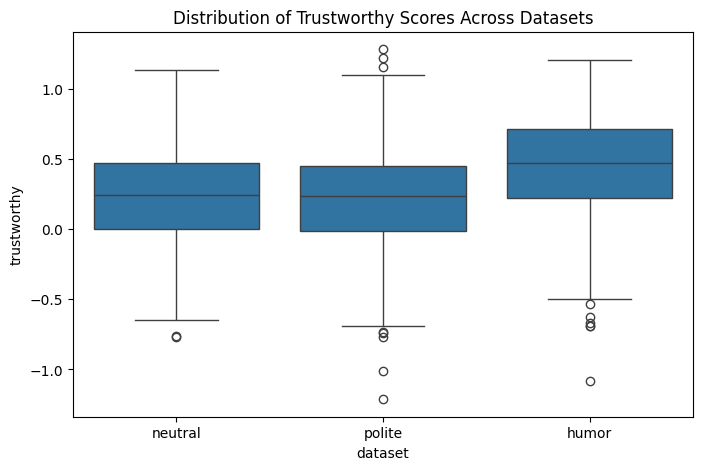

Levene's Test p-value (variance check): 0.12121240383346832
Test Used: Kruskal-Wallis
p-value: 3.231244603144855e-16
Shapiro-Wilk p-values (df, df_pol, df_hum): 0.43835496142701885, 0.1940739226891119, 1.2452777829420845e-07


In [ ]:

# Combine data for visualization
combined_data = pd.DataFrame({
    'trustworthy': list(df_filtered) + list(trust_df_pol_filtered) + list(trust_df_hum_filtered),
    'dataset': (['neutral'] * len(df_filtered)) + (['polite'] * len(trust_df_pol_filtered)) + (['humor'] * len(trust_df_hum_filtered))
})

means = combined_data.groupby("dataset")["trustworthy"].mean()
print(means)

# Visualize distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x="dataset", y="trustworthy", data=combined_data)
plt.title("Distribution of Trustworthy Scores Across Datasets")
plt.show()

# Check normality using Shapiro-Wilk test
shapiro_df = stats.shapiro(df_filtered)
shapiro_df_pol = stats.shapiro(trust_df_pol_filtered)
shapiro_df_hum = stats.shapiro(trust_df_hum_filtered)

# Determine which test to use
if shapiro_df.pvalue > 0.05 and shapiro_df_pol.pvalue > 0.05 and shapiro_df_hum.pvalue > 0.05:
    # Normality holds -> Use ANOVA
    anova_test = stats.f_oneway(df_filtered, trust_df_pol_filtered, trust_df_hum_filtered)
    test_used = "ANOVA"
    test_result = anova_test
else:
    # Non-normal data -> Use Kruskal-Wallis
    kruskal_test = stats.kruskal(df_filtered, trust_df_pol_filtered, trust_df_hum_filtered)
    test_used = "Kruskal-Wallis"
    test_result = kruskal_test


# Check homogeneity of variance using Levene's test
levene_test = stats.levene(df_filtered, trust_df_pol_filtered, trust_df_hum_filtered)
print(f"Levene's Test p-value (variance check): {levene_test.pvalue}")


# Print results
print(f"Test Used: {test_used}")
print(f"p-value: {test_result.pvalue}")
print(f"Shapiro-Wilk p-values (df, df_pol, df_hum): {shapiro_df.pvalue}, {shapiro_df_pol.pvalue}, {shapiro_df_hum.pvalue}")


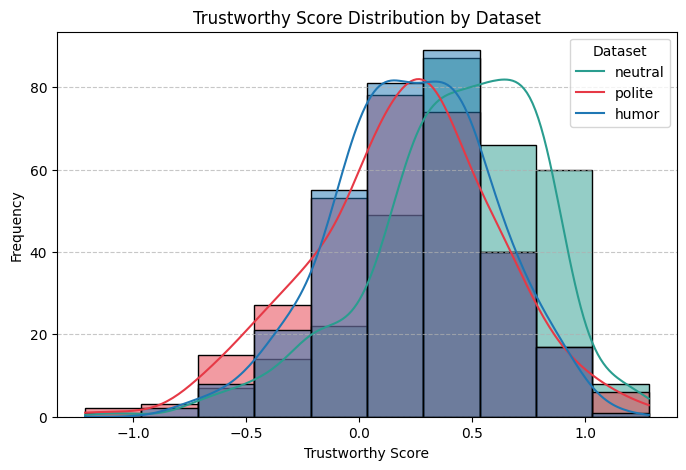

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#combined_data

# Set figure size
plt.figure(figsize=(8, 5))

# Define a mix of colors with blue for one dataset

palette_colors = {"neutral": "#1f77b4",  # Blue
                  "polite": "#e63946",   # Red
                  "humor": "#2a9d8f"}    # Green

# Plot histogram with KDE curves
sns.histplot(combined_data, x='trustworthy', hue='dataset', bins=10, kde=True, palette=palette_colors, alpha=0.5, edgecolor="black")

# Add title and labels
plt.title("Trustworthy Score Distribution by Dataset")
plt.xlabel("Trustworthy Score")
plt.ylabel("Frequency")

# Add legend with dataset labels
plt.legend(title="Dataset", labels=combined_data['dataset'].unique())


# Show plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
!pip install scikit-posthocs

In [ ]:
import scipy.stats as stats
import scikit_posthocs as sp

# Remove rows with missing values in 'trustworthy' or 'dataset'
combined_data_clean = combined_data.dropna(subset=['trustworthy', 'dataset'])

# Perform Kruskal-Wallis test
groups = [combined_data_clean[combined_data_clean['dataset'] == group]['trustworthy'].values for group in combined_data_clean['dataset'].unique()]
kruskal_stat, kruskal_p = stats.kruskal(*groups)

print(f"Kruskal-Wallis Test Statistic: {kruskal_stat}")
print(f"Kruskal-Wallis p-value: {kruskal_p}")

# If Kruskal-Wallis test is significant, perform Dunn's Test for pairwise comparisons
if kruskal_p < 0.05:
    print("\nPerforming Dunn's Test (pairwise comparisons)...")
    # Dunn's Test for pairwise comparisons (with correction)
    dunn_result = sp.posthoc_dunn(combined_data_clean, val_col='trustworthy', group_col='dataset', p_adjust='bonferroni')
    print("\nDunn's Test Results (pairwise comparisons):")
    print(dunn_result)
else:
    print("\nKruskal-Wallis test is not significant. No need for post-hoc test.")

'''
Dunn's post-hoc test revealed:
A significant difference between df and df_hum.
No significant difference between df and df_pol.
A significant difference between df_hum and df_pol.
'''

Kruskal-Wallis Test Statistic: 71.33698819767629
Kruskal-Wallis p-value: 3.231244603144855e-16

Performing Dunn's Test (pairwise comparisons)...

Dunn's Test Results (pairwise comparisons):
                humor       neutral        polite
humor    1.000000e+00  2.763417e-11  3.287078e-14
neutral  2.763417e-11  1.000000e+00  1.000000e+00
polite   3.287078e-14  1.000000e+00  1.000000e+00


"\nDunn's post-hoc test revealed:\nA significant difference between df and df_hum.\nNo significant difference between df and df_pol.\nA significant difference between df_hum and df_pol.\n"

### RQ2:

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

'''
trust_df = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_results_df_question.csv')
trust_df_pol = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_results_df_question_pol_v3.csv')
trust_df_hum = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_df_hum_q.csv')
'''

"\ntrust_df = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_results_df_question.csv')\ntrust_df_pol = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_results_df_question_pol_v3.csv')\ntrust_df_hum = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_df_hum_q.csv')\n"

In [ ]:
'''
# Factorial ANOVA model
model = smf.ols('trustworthy ~ pitch * intensity * rate', data=trust_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA
print(anova_table)
'''

"\n# Factorial ANOVA model\nmodel = smf.ols('trustworthy ~ pitch * intensity * rate', data=trust_df).fit()\nanova_table = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA\nprint(anova_table)\n"

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import glm

#trust_df = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_results_df_question.csv')
df = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_results_df_question.csv')
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(exclude=['number']).columns.tolist()
aggregation_rules = {col: 'mean' for col in numerical_cols}
aggregation_rules.update({col: lambda x: x.mode()[0] for col in categorical_cols})
# Group by 'base_name' and apply aggregation
trust_df_grouped = df.groupby('base_name', as_index=False).agg(aggregation_rules)
#print(df.columns)

trust_df_pol = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_results_df_question_pol_v3.csv')

#print(trust_df_pol.columns)
trust_df_hum = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_df_hum_q.csv')

df_filtered = trust_df_grouped[trust_df_grouped['base_name'].isin(trust_df_hum['filename'])]
trust_df_pol_filtered = trust_df_pol[trust_df_pol['base_name_x'].isin(trust_df_hum['filename'])]
print(len(df_filtered),len(trust_df_pol_filtered),len(trust_df_hum))

# GLM formula
#formula ='trustworthy ~ pitch * intensity * rate *gender'
formula = 'trustworthy ~pitch * rate + pitch * intensity + rate * intensity + gender'

# Fit the GLM model
model = glm(formula, data=trust_df_grouped, family=sm.families.Gaussian()).fit()

# Print the summary of the model
print(model.summary())


318 324 325
                 Generalized Linear Model Regression Results                  
Dep. Variable:            trustworthy   No. Observations:                  521
Model:                            GLM   Df Residuals:                      501
Model Family:                Gaussian   Df Model:                           19
Link Function:               Identity   Scale:                         0.12764
Method:                          IRLS   Log-Likelihood:                -192.82
Date:                Sun, 23 Mar 2025   Deviance:                       63.947
Time:                        19:18:07   Pearson chi2:                     63.9
No. Iterations:                     3   Pseudo R-squ. (CS):             0.2004
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# Sample dataframe format
# Columns: trust_score, pitch, rate, intensity, gender, participant_id, utterance_id

# Linear Mixed-Effects Model:
# Fixed effects: pitch, rate, intensity, gender
# Random effects: participant_id and utterance_id
model = smf.mixedlm(
    "trustworthy ~ pitch * rate + pitch * intensity + rate * intensity + gender",
    trust_df_grouped
)

result = model.fit()
print(result.summary())


AttributeError: 'groups' is a required keyword argument in MixedLM.from_formula

In [ ]:
#df_sorted = df.sort_values(by='trustworthy', ascending=False)
df = trust_df_grouped[['gender','intensity', 'pitch', 'rate','trustworthy']]
grouped_df = df.groupby(['gender','intensity', 'pitch', 'rate'])['trustworthy'].mean().reset_index()

grouped_df = grouped_df.sort_values(by='trustworthy', ascending=False)

# Displaying top 10 and bottom 10 filenames
top_10 = grouped_df.head(10)
bottom_10 = grouped_df.tail(10)

print("Top 10 filenames with highest values:")
print(top_10[['gender','intensity', 'pitch', 'rate','trustworthy']])

print("\nBottom 10 filenames with lowest values:")
print(bottom_10[['gender','intensity', 'pitch', 'rate','trustworthy']])

Top 10 filenames with highest values:
   gender intensity   pitch    rate  trustworthy
37      M    x-loud    high  medium     0.550707
34      M    medium  medium  medium     0.548999
47      M    x-soft    high    slow     0.477431
10      F    x-loud    high  medium     0.456633
28      M    medium    high  medium     0.430020
1       F    medium    high  medium     0.428042
53      M    x-soft  medium    slow     0.427674
2       F    medium    high    slow     0.424525
35      M    medium  medium    slow     0.413335
7       F    medium  medium  medium     0.403684

Bottom 10 filenames with lowest values:
   gender intensity   pitch  rate  trustworthy
36      M    x-loud    high  fast     0.022109
0       F    medium    high  fast     0.007711
9       F    x-loud    high  fast    -0.007190
30      M    medium     low  fast    -0.009232
3       F    medium     low  fast    -0.102635
39      M    x-loud     low  fast    -0.119780
51      M    x-soft  medium  fast    -0.145216
33    

In [ ]:
# GLM formula
formula ='trustworthy_x ~ pitch * intensity * rate * speaker_gender'
# Fit the GLM model
model = glm(formula, data=trust_df_pol_filtered, family=sm.families.Gaussian()).fit()
# Print the summary of the model
print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:          trustworthy_x   No. Observations:                  324
Model:                            GLM   Df Residuals:                      286
Model Family:                Gaussian   Df Model:                           37
Link Function:               Identity   Scale:                        0.027583
Method:                          IRLS   Log-Likelihood:                 142.14
Date:                Thu, 13 Mar 2025   Deviance:                       7.8887
Time:                        19:25:12   Pearson chi2:                     7.89
No. Iterations:                     3   Pseudo R-squ. (CS):             0.2262
Covariance Type:            nonrobust                                         
                                                                             coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

In [ ]:
#df_sorted = df.sort_values(by='trustworthy', ascending=False)
df = trust_df_pol_filtered[['speaker_gender','intensity', 'pitch', 'rate','trustworthy_x']]
grouped_df = df.groupby(['speaker_gender','intensity', 'pitch', 'rate'])['trustworthy_x'].mean().reset_index()

grouped_df = grouped_df.sort_values(by='trustworthy_x', ascending=False)

# Displaying top 10 and bottom 10 filenames
top_10 = grouped_df.head(10)
bottom_10 = grouped_df.tail(10)

print("Top 10 filenames with highest values:")
print(top_10[['speaker_gender','intensity', 'pitch', 'rate','trustworthy_x']])

print("\nBottom 10 filenames with lowest values:")
print(bottom_10[['speaker_gender','intensity', 'pitch', 'rate','trustworthy_x']])

Top 10 filenames with highest values:
   speaker_gender intensity   pitch    rate  trustworthy_x
15              F    x-soft    high  medium       0.360440
32              M    x-loud  medium    slow       0.345359
9               F    x-loud    high  medium       0.331131
36              M    x-soft  medium  medium       0.327759
7               F    medium  medium  medium       0.317235
12              F    x-loud  medium  medium       0.316723
29              M    x-loud    high    slow       0.316267
21              M    medium    high    slow       0.312445
26              M    medium  medium  medium       0.311277
18              F    x-soft  medium    slow       0.309707

Bottom 10 filenames with lowest values:
   speaker_gender intensity   pitch    rate  trustworthy_x
13              F    x-loud  medium    slow       0.220375
4               F    medium     low  medium       0.208056
2               F    medium    high    slow       0.206689
22              M    medium     low 

In [ ]:
# GLM formula
formula ='trustworthy ~ pitch * intensity * rate * gender'
# Fit the GLM model
model = glm(formula, data=trust_df_hum, family=sm.families.Gaussian()).fit()
# Print the summary of the model
print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:            trustworthy   No. Observations:                  325
Model:                            GLM   Df Residuals:                      287
Model Family:                Gaussian   Df Model:                           37
Link Function:               Identity   Scale:                         0.13674
Method:                          IRLS   Log-Likelihood:                -117.63
Date:                Thu, 13 Mar 2025   Deviance:                       39.245
Time:                        19:25:12   Pearson chi2:                     39.2
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1582
Covariance Type:            nonrobust                                         
                                                                     coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------

In [ ]:
#df_sorted = df.sort_values(by='trustworthy', ascending=False)
df = trust_df_hum[['gender','intensity', 'pitch', 'rate','trustworthy']]
grouped_df = df.groupby(['gender','intensity', 'pitch', 'rate'])['trustworthy'].mean().reset_index()

grouped_df = grouped_df.sort_values(by='trustworthy', ascending=False)

# Displaying top 10 and bottom 10 filenames
top_10 = grouped_df.head(10)
bottom_10 = grouped_df.tail(10)

print("Top 10 filenames with highest values:")
print(top_10[['gender','intensity', 'pitch', 'rate','trustworthy']])

print("\nBottom 10 filenames with lowest values:")
print(bottom_10[['gender','intensity', 'pitch', 'rate','trustworthy']])

Top 10 filenames with highest values:
   gender intensity   pitch    rate  trustworthy
32      M    x-loud  medium    slow     0.756181
13      F    x-loud  medium    slow     0.704166
33      M    x-soft    high  medium     0.603880
29      M    x-loud    high    slow     0.593862
31      M    x-loud  medium  medium     0.589390
17      F    x-soft  medium  medium     0.553406
26      M    medium  medium  medium     0.542191
14      F    x-soft    high    fast     0.541456
36      M    x-soft  medium  medium     0.540827
35      M    x-soft     low  medium     0.539082

Bottom 10 filenames with lowest values:
   gender intensity   pitch    rate  trustworthy
2       F    medium    high    slow     0.341483
25      M    medium  medium    fast     0.328134
27      M    medium  medium    slow     0.319185
5       F    medium     low    slow     0.310160
28      M    x-loud    high  medium     0.308229
10      F    x-loud     low  medium     0.222909
3       F    medium     low    fast    

### 3D plot

       Flesch_reading  mean_intensity  mean_pitch  speaking_rate
count       15.000000       15.000000   15.000000      15.000000
mean       100.150667       47.986897  114.800247     247.191600
std          9.787562       20.204848   15.418310      33.018895
min         83.320000       14.526509   87.788378     188.531365
25%         94.235000       31.161589  104.261312     224.020900
50%        100.750000       39.188652  117.911206     236.739180
75%        106.670000       67.270021  128.293933     279.826563
max        115.130000       71.656154  137.925734     309.701368
       Flesch_reading  mean_intensity  mean_pitch  speaking_rate
count       12.000000       12.000000   12.000000      12.000000
mean        93.684167       47.861607  182.612048     209.149366
std         10.091724       16.343824   25.509101      51.511495
min         82.810000       28.455528  129.833714     165.487624
25%         83.192500       36.811868  162.968181     172.543258
50%         92.290000    

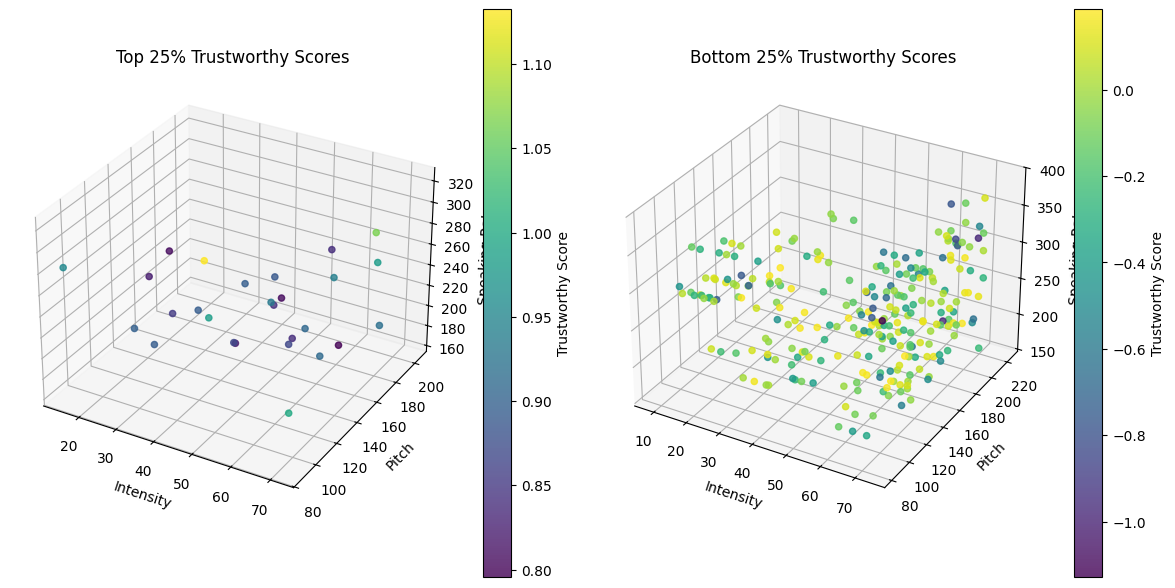

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample DataFrame (Replace with your actual dataset)
# df = pd.read_csv("your_data.csv")
#print(len(df_filtered),len(trust_df_pol_filtered),len(trust_df_hum))
df = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_results_df_question.csv')
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(exclude=['number']).columns.tolist()
aggregation_rules = {col: 'mean' for col in numerical_cols}
aggregation_rules.update({col: lambda x: x.mode()[0] for col in categorical_cols})
# Group by 'base_name' and apply aggregation
trust_df_grouped = df.groupby('base_name', as_index=False).agg(aggregation_rules)
df = trust_df_grouped

# Define the threshold for top and bottom 25%
trustworthy_threshold_top = df["trustworthy"].quantile(0.95)
trustworthy_threshold_bottom = df["trustworthy"].quantile(0.5)

# Filter the top and bottom 25% trustworthy scores
df_top = df[df["trustworthy"] >= trustworthy_threshold_top]
df_bottom = df[df["trustworthy"] <= trustworthy_threshold_bottom]

df_top_m = df_top[df_top['gender'] == 'M']
df_top_f = df_top[df_top['gender'] == 'F']
print(df_top_m[['Flesch_reading', 'mean_intensity','mean_pitch','speaking_rate']].describe())
print(df_top_f[['Flesch_reading','mean_intensity','mean_pitch', 'speaking_rate']].describe())

# Create figure and subplots
fig = plt.figure(figsize=(12, 6))

# Top 25% Trustworthiness Plot
ax1 = fig.add_subplot(121, projection='3d')
sc1 = ax1.scatter(df_top["mean_intensity"], df_top["mean_pitch"], df_top["speaking_rate"],
                  c=df_top["trustworthy"], cmap="viridis", alpha=0.8)
ax1.set_title("Top 25% Trustworthy Scores")
ax1.set_xlabel("Intensity")
ax1.set_ylabel("Pitch")
ax1.set_zlabel("Speaking Rate")
fig.colorbar(sc1, ax=ax1, label="Trustworthy Score")

# Bottom 25% Trustworthiness Plot
ax2 = fig.add_subplot(122, projection='3d')
sc2 = ax2.scatter(df_bottom["mean_intensity"], df_bottom["mean_pitch"], df_bottom["speaking_rate"],
                  c=df_bottom["trustworthy"], cmap="viridis", alpha=0.8)
ax2.set_title("Bottom 25% Trustworthy Scores")
ax2.set_xlabel("Intensity")
ax2.set_ylabel("Pitch")
ax2.set_zlabel("Speaking Rate")
fig.colorbar(sc2, ax=ax2, label="Trustworthy Score")

# Show the plot
plt.tight_layout()
plt.show()


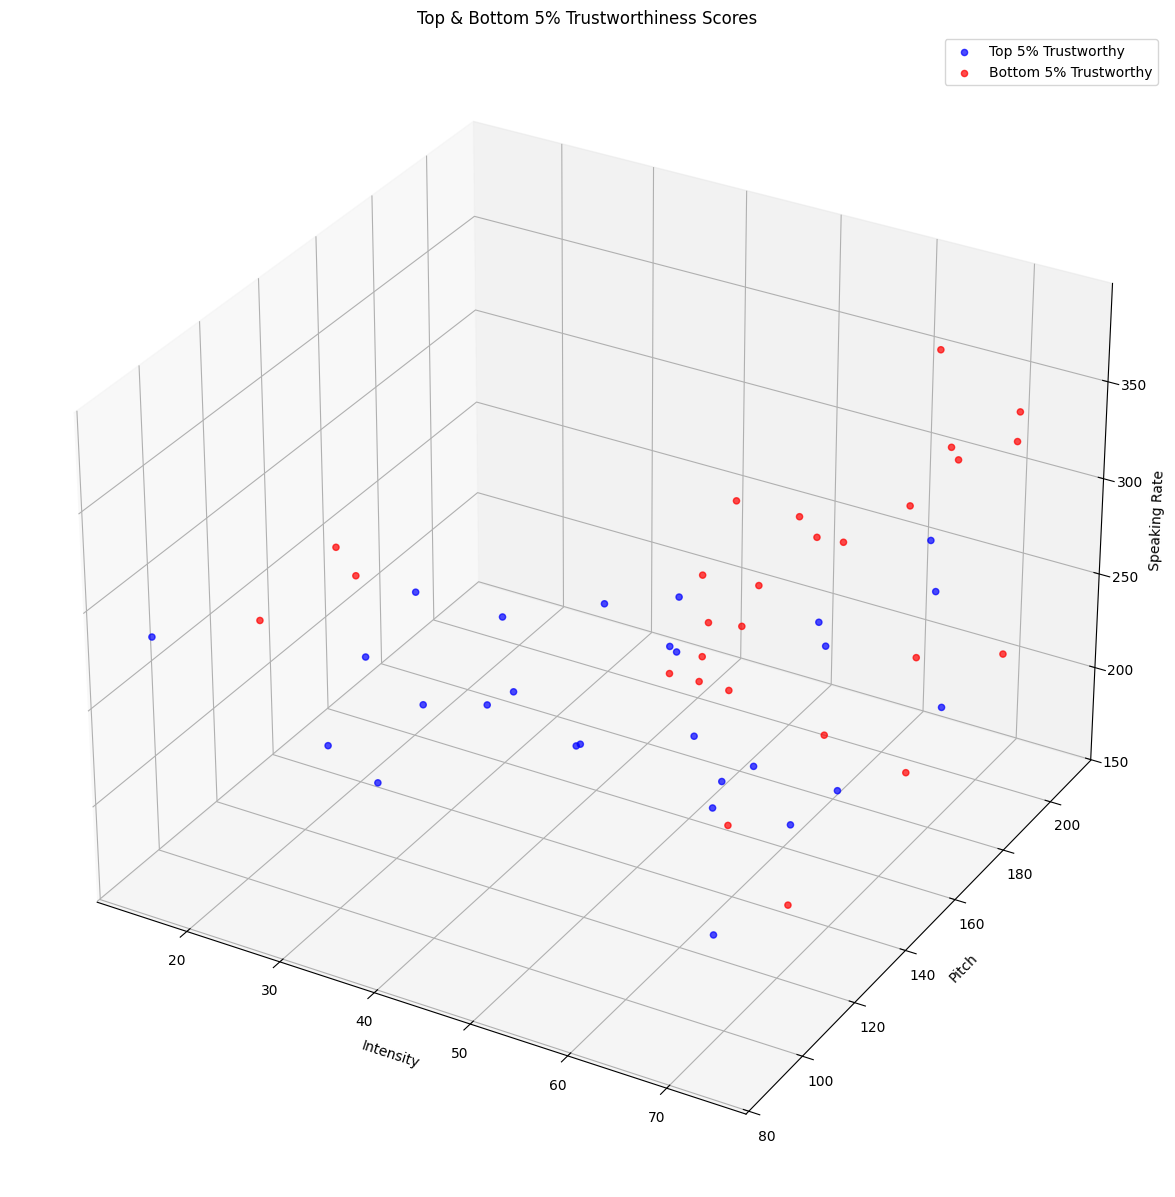

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load Data
df =trust_df_grouped
# Define the threshold for top and bottom 25%
trustworthy_threshold_top = df["trustworthy"].quantile(0.95)  # Top 25%
trustworthy_threshold_bottom = df["trustworthy"].quantile(0.05)  # Bottom 25%

# Filter top and bottom 25%
df_top = df[df["trustworthy"] >= trustworthy_threshold_top]
df_bottom = df[df["trustworthy"] <= trustworthy_threshold_bottom]


# Create a single 3D scatter plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Plot Top 25% (Blue) and Bottom 25% (Red)
ax.scatter(df_top["mean_intensity"], df_top["mean_pitch"], df_top["speaking_rate"],
           c="blue", alpha=0.7, label="Top 5% Trustworthy")

ax.scatter(df_bottom["mean_intensity"], df_bottom["mean_pitch"], df_bottom["speaking_rate"],
           c="red", alpha=0.7, label="Bottom 5% Trustworthy")

# Labels & Title
ax.set_title("Top & Bottom 5% Trustworthiness Scores")
ax.set_xlabel("Intensity")
ax.set_ylabel("Pitch")
ax.set_zlabel("Speaking Rate")

# Legend
ax.legend()

# Show the plot
plt.show()


In [ ]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0_x', 'filename', 'survey_name', 'order',
       'base_name_x', 'text_x', 'Flesch_reading_x', 'num_word',
       'speaker_gender', 'intensity', 'pitch', 'rate', 'complexity',
       'trustworthy_x', 'lively_x', 'natural_x', 'boring_x', 'empathetic_x',
       'respectful_x', 'cold_x', 'attractive_x', 'polite_x', 'engaging_x',
       'politness', 'Duration', 'Min_Pitch', 'Max_Pitch', 'Mean_Pitch',
       'SD_Pitch', 'Median_Pitch', 'MAS_F0', 'VCD2TOT_Frames', 'Min_Intensity',
       'Max_Intensity', 'Mean_Intensity', 'SD_Intensity', 'Median_Intensity',
       'Jitter', 'Shimmer', 'HNR', 'file_order', 'speaking_rate',
       'Unnamed: 0_y', 'survey', 'order_in_survey', 'base_name_y', 'text_y',
       'Flesch_reading_y', 'trustworthy_y', 'lively_y', 'natural_y',
       'boring_y', 'empathetic_y', 'respectful_y', 'cold_y', 'attractive_y',
       'polite_y', 'engaging_y'],
      dtype='object')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load Data
df =pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_results_df_question_pol_v3.csv')

# Define the threshold for top and bottom 25%
trustworthy_threshold_top = df["trustworthy_x"].quantile(0.95)  # Top 25%
trustworthy_threshold_bottom = df["trustworthy_x"].quantile(0.05)  # Bottom 25%

# Filter top and bottom 25%
df_top = df[df["trustworthy_x"] >= trustworthy_threshold_top]
df_bottom = df[df["trustworthy_x"] <= trustworthy_threshold_bottom]

df_top_m = df_top[df_top['speaker_gender'] == 'M']
df_top_f = df_top[df_top['speaker_gender'] == 'F']
print(df_top_m[['Flesch_reading_x', 'Mean_Intensity','Mean_Pitch','speaking_rate']].describe())
print(df_top_f[['Flesch_reading_x','Mean_Intensity','Mean_Pitch', 'speaking_rate']].describe())

# Create a single 3D scatter plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Plot Top 25% (Blue) and Bottom 25% (Red)
ax.scatter(df_top["Mean_Intensity"], df_top["Mean_Pitch"], df_top["speaking_rate"],
           c="blue", alpha=0.7, label="Top 5% Trustworthy")

ax.scatter(df_bottom["Mean_Intensity"], df_bottom["Mean_Pitch"], df_bottom["speaking_rate"],
           c="red", alpha=0.7, label="Bottom 5% Trustworthy")

# Labels & Title
ax.set_title("Top & Bottom 5% Trustworthiness Scores")
ax.set_xlabel("Intensity")
ax.set_ylabel("Pitch")
ax.set_zlabel("Speaking Rate")

# Legend
ax.legend()

# Show the plot
plt.show()


       Flesch_reading_x  Mean_Intensity  Mean_Pitch  speaking_rate
count          8.000000        8.000000    8.000000       8.000000
mean          91.337500       71.856897  112.345113     229.290041
std            7.879644        3.365145   11.169345      20.937303
min           79.770000       66.856326   96.235220     212.757403
25%           85.732500       70.275419  103.368522     216.873785
50%           94.915000       71.190244  112.425899     219.469355
75%           97.700000       75.207014  121.234243     235.201418
max           98.210000       75.978122  126.454047     263.759737
       Flesch_reading_x  Mean_Intensity  Mean_Pitch  speaking_rate
count         12.000000       12.000000   12.000000      12.000000
mean          94.276667       71.664097  176.351463     230.931254
std            5.361456        3.301975   25.243146      22.982611
min           79.770000       67.697811  128.674962     197.671053
25%           94.407500       68.166184  160.101337     210.56

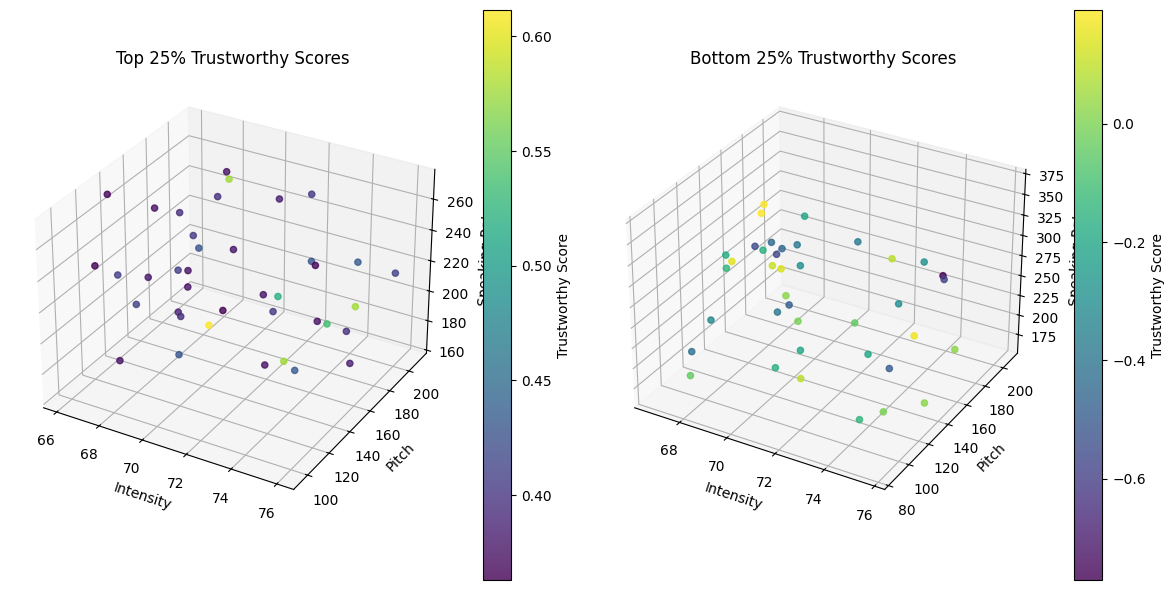

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample DataFrame (Replace with your actual dataset)
# df = pd.read_csv("your_data.csv")
df =pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_results_df_question_pol_v3.csv')

# Define the threshold for top and bottom 25%
trustworthy_threshold_top = df["trustworthy_x"].quantile(0.9)
trustworthy_threshold_bottom = df["trustworthy_x"].quantile(0.1)

# Filter the top and bottom 25% trustworthy scores
df_top = df[df["trustworthy_x"] >= trustworthy_threshold_top]
df_bottom = df[df["trustworthy_x"] <= trustworthy_threshold_bottom]

# Create figure and subplots
fig = plt.figure(figsize=(12, 6))

# Top 25% Trustworthiness Plot
ax1 = fig.add_subplot(121, projection='3d')
sc1 = ax1.scatter(df_top["Mean_Intensity"], df_top["Mean_Pitch"], df_top["speaking_rate"],
                  c=df_top["trustworthy_x"], cmap="viridis", alpha=0.8)
ax1.set_title("Top 25% Trustworthy Scores")
ax1.set_xlabel("Intensity")
ax1.set_ylabel("Pitch")
ax1.set_zlabel("Speaking Rate")
fig.colorbar(sc1, ax=ax1, label="Trustworthy Score")

# Bottom 25% Trustworthiness Plot
ax2 = fig.add_subplot(122, projection='3d')
sc2 = ax2.scatter(df_bottom["Mean_Intensity"], df_bottom["Mean_Pitch"], df_bottom["speaking_rate"],
                  c=df_bottom["trustworthy_x"], cmap="viridis", alpha=0.8)
ax2.set_title("Bottom 25% Trustworthy Scores")
ax2.set_xlabel("Intensity")
ax2.set_ylabel("Pitch")
ax2.set_zlabel("Speaking Rate")
fig.colorbar(sc2, ax=ax2, label="Trustworthy Score")

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
df.columns

Index(['Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1',
       'Unnamed: 0', 'survey', 'filename', 'order_in_survey', 'trustworthy',
       'lively', 'natural', 'boring', 'empathetic', 'respectful', 'cold',
       'attractive', 'humor', 'engaging', 'gender', 'pitch', 'intensity',
       'rate', 'Duration', 'Min_Pitch', 'Max_Pitch', 'Mean_Pitch', 'SD_Pitch',
       'Median_Pitch', 'MAS_F0', 'VCD2TOT_Frames', 'Min_Intensity',
       'Max_Intensity', 'Mean_Intensity', 'SD_Intensity', 'Median_Intensity',
       'Jitter', 'Shimmer', 'HNR', 'file_order', 'num_word', 'speaking_rate',
       'flesch_score'],
      dtype='object')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load Data
df = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_df_hum_q.csv')

# Define the threshold for top and bottom 25%
trustworthy_threshold_top = df["trustworthy"].quantile(0.95)  # Top 25%
trustworthy_threshold_bottom = df["trustworthy"].quantile(0.05)  # Bottom 25%

# Filter top and bottom 25%
df_top = df[df["trustworthy"] >= trustworthy_threshold_top]
df_bottom = df[df["trustworthy"] <= trustworthy_threshold_bottom]

df_top_m = df_top[df_top['gender'] == 'M']
df_top_f = df_top[df_top['gender'] == 'F']
print(df_top_m[['flesch_score', 'Mean_Intensity','Mean_Pitch','speaking_rate']].describe())
print(df_top_f[['flesch_score','Mean_Intensity','Mean_Pitch', 'speaking_rate']].describe())

# Create a single 3D scatter plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Plot Top 25% (Blue) and Bottom 25% (Red)
ax.scatter(df_top["Mean_Intensity"], df_top["Mean_Pitch"], df_top["speaking_rate"],
           c="blue", alpha=0.7, label="Top 5% Trustworthy")

ax.scatter(df_bottom["Mean_Intensity"], df_bottom["Mean_Pitch"], df_bottom["speaking_rate"],
           c="red", alpha=0.7, label="Bottom 5% Trustworthy")

# Labels & Title
ax.set_title("Top & Bottom 5% Trustworthiness Scores")
ax.set_xlabel("Intensity")
ax.set_ylabel("Pitch")
ax.set_zlabel("Speaking Rate")

# Legend
ax.legend()

# Show the plot
plt.show()


       flesch_score  Mean_Intensity  Mean_Pitch  speaking_rate
count     10.000000       10.000000   10.000000      10.000000
mean      81.517000       69.904435  114.656308     218.587248
std       11.058817        3.245870   14.653053      54.874760
min       66.400000       66.606646   86.581093     136.660318
25%       77.230000       66.898966  108.026442     178.023075
50%       80.780000       69.623640  116.359788     225.351699
75%       87.507500       71.488876  124.850214     254.898105
max       97.910000       75.361093  135.524443     317.120428
       flesch_score  Mean_Intensity  Mean_Pitch  speaking_rate
count      7.000000        7.000000    7.000000       7.000000
mean      76.915714       71.583872  152.497069     234.183536
std        7.542148        4.066355   16.101173      41.178904
min       66.400000       65.834624  129.111994     175.908921
25%       73.510000       68.659489  144.265647     208.931794
50%       77.230000       71.684212  159.806391     220

In [ ]:
# Sample DataFrame (Replace with your actual dataset)
# df = pd.read_csv("your_data.csv")
df = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_df_hum_q.csv')
# Define the threshold for top and bottom 25%
trustworthy_threshold_top = df["trustworthy"].quantile(0.9)
trustworthy_threshold_bottom = df["trustworthy"].quantile(0.1)

# Filter the top and bottom 25% trustworthy scores
df_top = df[df["trustworthy"] >= trustworthy_threshold_top]
df_bottom = df[df["trustworthy"] <= trustworthy_threshold_bottom]

# Create figure and subplots
fig = plt.figure(figsize=(12, 6))

# Top 25% Trustworthiness Plot
ax1 = fig.add_subplot(121, projection='3d')
sc1 = ax1.scatter(df_top["Mean_Intensity"], df_top["Mean_Pitch"], df_top["speaking_rate"],
                  c=df_top["trustworthy"], cmap="viridis", alpha=0.8)
ax1.set_title("Top 25% Trustworthy Scores")
ax1.set_xlabel("Intensity")
ax1.set_ylabel("Pitch")
ax1.set_zlabel("Speaking Rate")
fig.colorbar(sc1, ax=ax1, label="Trustworthy Score")

# Bottom 25% Trustworthiness Plot
ax2 = fig.add_subplot(122, projection='3d')
sc2 = ax2.scatter(df_bottom["Mean_Intensity"], df_bottom["Mean_Pitch"], df_bottom["speaking_rate"],
                  c=df_bottom["trustworthy"], cmap="viridis", alpha=0.8)
ax2.set_title("Bottom 25% Trustworthy Scores")
ax2.set_xlabel("Intensity")
ax2.set_ylabel("Pitch")
ax2.set_zlabel("Speaking Rate")
fig.colorbar(sc2, ax=ax2, label="Trustworthy Score")

# Show the plot
plt.tight_layout()
plt.show()

## ALL DATA GLM

In [ ]:
'''
!pip install textstat

import pandas as pd
import textstat

# Example DataFrame
texts = {'file_order':[1,2,3,4,5,6,7,8,9,10],'text':[
    "I’m all ears—though technically, I don't have ears. How are you feeling? Spill the beans, I’ve got a mop just in case",
    "Hey! How are you doing today? What’s bothering you? Besides, you know, the entire internet?",
    "How’s your day going today? On a scale from 'free coffee' to 'stepped in gum,' where are we at?",
    "What’s the latest episode in the drama that is your life?",
    "Getting enough sleep? Or are you on a strict diet of coffee and sheer willpower?",
    "How’s life at the moment? If it’s a soap opera, feel free to let me in on the drama.",
    "How can I help you today? Something bothering you? Or are you just here to confirm I’m not a real person?",
    "What do you think about yourself as a person? No worries, I won't tell anyone, not even my cousin Siri.",
    "How are you feeling today? I’m hoping somewhere between ‘meh’ and ‘living my best life.",
    "How can I be of service to your royal highness today?"
]}

df = pd.DataFrame(texts)

# Apply Flesch Reading Ease score calculation using textstat
df['flesch_score'] = df['text'].apply(textstat.flesch_reading_ease)

# Display result

trust_df_hum_q['flesch_score'] = trust_df_hum_q['file_order'].map(df.set_index('file_order')['flesch_score'])
print(trust_df_hum_q.columns)
'''

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'survey',
       'filename', 'order_in_survey', 'trustworthy', 'lively', 'natural',
       'boring', 'empathetic', 'respectful', 'cold', 'attractive', 'humor',
       'engaging', 'gender', 'pitch', 'intensity', 'rate', 'Duration',
       'Min_Pitch', 'Max_Pitch', 'Mean_Pitch', 'SD_Pitch', 'Median_Pitch',
       'MAS_F0', 'VCD2TOT_Frames', 'Min_Intensity', 'Max_Intensity',
       'Mean_Intensity', 'SD_Intensity', 'Median_Intensity', 'Jitter',
       'Shimmer', 'HNR', 'file_order', 'num_word', 'speaking_rate',
       'flesch_score'],
      dtype='object')


In [ ]:
trust_df = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_results_df_question.csv')
trust_df = trust_df.groupby('base_name', as_index=False)['trustworthy'].mean()

#print(df.columns)
trust_df_pol = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_results_df_question_pol_v2.csv')

#print(trust_df_pol.columns)
trust_df_hum = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_df_hum_q.csv')
#print(trust_df_hum.columns)
print(len(trust_df),len(trust_df_pol),len(trust_df_hum))

common_filenames = set(trust_df['base_name']) & set(trust_df_pol['base_name']) & set(trust_df_hum['filename'])


df_filtered = trust_df[trust_df['base_name'].isin(common_filenames)]['trustworthy']
#trust_df_pol_filtered = trust_df_pol[trust_df_pol['base_name'].isin(trust_df_hum['filename'])]['trustworthy']

trust_df_pol_filtered = trust_df_pol[trust_df_pol['base_name'].isin(common_filenames)]['trustworthy']
#trust_df_hum = trust_df_hum['trustworthy']
trust_df_hum_filtered = trust_df_hum[trust_df_hum['filename'].isin(common_filenames)]['trustworthy']

print(len(df_filtered),len(trust_df_pol_filtered),len(trust_df_hum_filtered))

521 378 325
314 315 314


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import glm

trust_df_grouped[['text','gender','trustworthy']]

# GLM formula
formula ='trustworthy ~ text'

# Fit the GLM model
model = glm(formula, data=trust_df_grouped, family=sm.families.Gaussian()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            trustworthy   No. Observations:                  521
Model:                            GLM   Df Residuals:                      519
Model Family:                Gaussian   Df Model:                            1
Link Function:               Identity   Scale:                         0.15173
Method:                          IRLS   Log-Likelihood:                -247.05
Date:                Thu, 13 Mar 2025   Deviance:                       78.748
Time:                        19:07:42   Pearson chi2:                     78.7
No. Iterations:                     3   Pseudo R-squ. (CS):          0.0002673
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1885      0.037      5.109      0.0

In [ ]:
trust_df_pol.columns

Index(['Unnamed: 0.1', 'Unnamed: 0_x', 'filename', 'survey_name', 'order',
       'base_name_x', 'text_x', 'Flesch_reading_x', 'num_word',
       'speaker_gender', 'intensity', 'pitch', 'rate', 'complexity',
       'trustworthy_x', 'lively_x', 'natural_x', 'boring_x', 'empathetic_x',
       'respectful_x', 'cold_x', 'attractive_x', 'polite_x', 'engaging_x',
       'politness', 'Duration', 'Min_Pitch', 'Max_Pitch', 'Mean_Pitch',
       'SD_Pitch', 'Median_Pitch', 'MAS_F0', 'VCD2TOT_Frames', 'Min_Intensity',
       'Max_Intensity', 'Mean_Intensity', 'SD_Intensity', 'Median_Intensity',
       'Jitter', 'Shimmer', 'HNR', 'file_order', 'speaking_rate',
       'Unnamed: 0_y', 'survey', 'order_in_survey', 'base_name_y', 'text_y',
       'Flesch_reading_y', 'trustworthy_y', 'lively_y', 'natural_y',
       'boring_y', 'empathetic_y', 'respectful_y', 'cold_y', 'attractive_y',
       'polite_y', 'engaging_y'],
      dtype='object')

In [ ]:
trust_df_hum.columns

Index(['Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1',
       'Unnamed: 0', 'survey', 'filename', 'order_in_survey', 'trustworthy',
       'lively', 'natural', 'boring', 'empathetic', 'respectful', 'cold',
       'attractive', 'humor', 'engaging', 'gender', 'pitch', 'intensity',
       'rate', 'Duration', 'Min_Pitch', 'Max_Pitch', 'Mean_Pitch', 'SD_Pitch',
       'Median_Pitch', 'MAS_F0', 'VCD2TOT_Frames', 'Min_Intensity',
       'Max_Intensity', 'Mean_Intensity', 'SD_Intensity', 'Median_Intensity',
       'Jitter', 'Shimmer', 'HNR', 'file_order', 'num_word', 'speaking_rate',
       'flesch_score'],
      dtype='object')

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import kruskal

# Perform Kruskal-Wallis test
groups = [trust_df_pol[trust_df_pol['text_x'] == group]['trustworthy_x'] for group in trust_df_pol['text_x'].unique()]
#print(groups)
stat, p_value = kruskal(*groups)

# Print results
print(f"Kruskal-Wallis Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Trustworthiness scores differ across text groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in trustworthiness scores across text groups.")


Kruskal-Wallis Statistic: 9.617056317681534
P-value: 0.3823662257394854
Fail to reject the null hypothesis: No significant difference in trustworthiness scores across text groups.


In [ ]:
!pip install scikit_posthocs

In [ ]:
import scikit_posthocs as sp

# Perform post-hoc Dunn's test with Bonferroni correction
dunn_results = sp.posthoc_dunn(trust_df_hum, val_col="trustworthy", group_col="text", p_adjust="bonferroni")
print(dunn_results)

     1         2    3    4    5    6         7    8         9         10
1   1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  1.000000  1.000000
2   1.0  1.000000  1.0  1.0  1.0  1.0  0.326234  1.0  1.000000  1.000000
3   1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  1.000000  1.000000
4   1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  1.000000  1.000000
5   1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  1.000000  1.000000
6   1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  1.000000  1.000000
7   1.0  0.326234  1.0  1.0  1.0  1.0  1.000000  1.0  0.408013  0.808908
8   1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  1.000000  1.000000
9   1.0  1.000000  1.0  1.0  1.0  1.0  0.408013  1.0  1.000000  1.000000
10  1.0  1.000000  1.0  1.0  1.0  1.0  0.808908  1.0  1.000000  1.000000


In [ ]:
trust_df_pol[['text_x','speaker_gender','trustworthy_x']]

# GLM formula
formula ='trustworthy_x ~ text_x'

# Fit the GLM model
model = glm(formula, data=trust_df_pol, family=sm.families.Gaussian()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          trustworthy_x   No. Observations:                  382
Model:                            GLM   Df Residuals:                      380
Model Family:                Gaussian   Df Model:                            1
Link Function:               Identity   Scale:                        0.032176
Method:                          IRLS   Log-Likelihood:                 115.34
Date:                Thu, 13 Mar 2025   Deviance:                       12.227
Time:                        19:08:38   Pearson chi2:                     12.2
No. Iterations:                     3   Pseudo R-squ. (CS):           0.002591
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2757      0.020     13.881      0.0

In [ ]:
trust_df_q = trust_df_q[['trustworthy','gender', 'pitch', 'intensity', 'rate' ]]

trust_df_pol_q = trust_df_pol_q[['trustworthy_x','speaker_gender','pitch',  'intensity', 'rate',]]
trust_df_pol_q = trust_df_pol_q.rename(columns={'trustworthy_x': 'trustworthy','speaker_gender':'gender'})

trust_df_hum_q = trust_df_hum_q[['trustworthy','gender', 'pitch', 'intensity', 'rate']]

NameError: name 'trust_df_q' is not defined

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# Sample dataframe format
# Columns: trust_score, pitch, rate, intensity, gender, participant_id, utterance_id

# Linear Mixed-Effects Model:
# Fixed effects: pitch, rate, intensity, gender
# Random effects: participant_id and utterance_id
model = smf.mixedlm(
    "trustworthy ~ pitch + rate + intensity + gender",
    trust_df_grouped,
    groups=trust_df_grouped["gender"],       # random intercept per participant
    re_formula="~1"
)

result = model.fit()
print(result.summary())


In [ ]:
# Combine data for visualization
import pandas as pd

# Assume df_neutral, df_polite, df_humor are already loaded and have the same columns
datasets = [trust_df_q, trust_df_pol_q, trust_df_hum_q]
lexical_styles = ['neutral', 'polite', 'humor']

# Add lexical style column
for df, style in zip(datasets, lexical_styles):
    df['lexical_style'] = style

# Concatenate all datasets
combined_data_q = pd.concat(datasets, ignore_index=True)

# If you have separate datasets for dialogue acts (questions/recommendations), handle them similarly
combined_data_q['dialogue_act'] = 'question' # Assign appropriate values if known

# Display result
print(combined_data_q.head())


   trustworthy gender pitch intensity    rate lexical_style dialogue_act
0    -0.047641      F  high    medium    fast       neutral     question
1     0.455113      F  high    medium  medium       neutral     question
2    -0.099327      F  high    medium    slow       neutral     question
3    -0.149313      F   low    medium    fast       neutral     question
4     0.297216      F   low    medium  medium       neutral     question


In [ ]:
trust_df_r = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_results_df_rec.csv')

#print(df.columns)
trust_df_pol_r = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_df_rec_pol.csv')
#print(trust_df_pol.columns)
trust_df_hum_r = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_df_hum_rec.csv')

In [ ]:
trust_df_r = trust_df_r[['norm_trustworthy','Gender', 'Pitch', 'Intensity', 'Rate' ]]
trust_df_r = trust_df_r.rename(columns={'norm_trustworthy': 'trustworthy','Gender':'gender','Pitch':'pitch', 'Intensity':'intensity', 'Rate':'rate' })

trust_df_pol_r = trust_df_pol_r[['trustworthy','gender','pitch',  'intensity', 'rate',]]

trust_df_hum_r = trust_df_hum_r[['trustworthy','gender', 'pitch', 'intensity', 'rate']]

In [ ]:
# Combine data for visualization
import pandas as pd

# Assume df_neutral, df_polite, df_humor are already loaded and have the same columns
datasets = [trust_df_r, trust_df_pol_r, trust_df_hum_r]
lexical_styles = ['neutral', 'polite', 'humor']

# Add lexical style column
for df, style in zip(datasets, lexical_styles):
    df['lexical_style'] = style

# Concatenate all datasets
combined_data_r = pd.concat(datasets, ignore_index=True)

# If you have separate datasets for dialogue acts (questions/recommendations), handle them similarly
combined_data_r['dialogue_act'] = 'recommendation' # Assign appropriate values if known

# Display result
print(combined_data_r.head())


   trustworthy gender   pitch intensity    rate lexical_style    dialogue_act
0     0.668338      F  medium    x-soft  medium       neutral  recommendation
1     0.157646      M     low    x-loud    fast       neutral  recommendation
2     0.669526      F    high    x-soft    fast       neutral  recommendation
3     0.508821      M    high    medium  medium       neutral  recommendation
4     0.333233      F  medium    x-loud    slow       neutral  recommendation


In [ ]:
combined_data = pd.concat([combined_data_q,combined_data_r])
combined_data

trustworthy gender   pitch intensity    rate lexical_style  \
0       -0.047641      F    high    medium    fast       neutral   
1        0.455113      F    high    medium  medium       neutral   
2       -0.099327      F    high    medium    slow       neutral   
3       -0.149313      F     low    medium    fast       neutral   
4        0.297216      F     low    medium  medium       neutral   
...           ...    ...     ...       ...     ...           ...   
1063     0.304358      F     low    x-loud    slow         humor   
1064     0.134291      M  medium    x-soft  medium         humor   
1065     0.746776      M  medium    medium  medium         humor   
1066     0.285759      M     low    x-loud  medium         humor   
1067     0.134291      M  medium    x-soft  medium         humor   

        dialogue_act  
0           question  
1           question  
2           question  
3           question  
4           question  
...              ...  
1063  recommendation  
1064  recommendation  
1065  recommendation  
1066  recommendation  
1067  recommendation  

[2296 rows x 7 columns]

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import glm

# GLM formula
formula ='trustworthy ~ dialogue_act  * lexical_style * pitch * intensity * rate *gender'

# Fit the GLM model
model = glm(formula, data=combined_data, family=sm.families.Gaussian()).fit()
print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:            trustworthy   No. Observations:                 2296
Model:                            GLM   Df Residuals:                     2035
Model Family:                Gaussian   Df Model:                          260
Link Function:               Identity   Scale:                         0.14898
Method:                          IRLS   Log-Likelihood:                -842.92
Date:                Wed, 26 Feb 2025   Deviance:                       280.14
Time:                        23:26:39   Pearson chi2:                     280.
No. Iterations:                   100   Pseudo R-squ. (CS):             0.2206
Covariance Type:            nonrobust                                         
                                                                                                                                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------

## Recommendation

### RQ1: which type of lexical style is preferred?
Method1: check whether the mean score of trustworthy/engaging is significant
different across three styles (do filtering on orignial data to make sure the acoustic combination match with polite and humor)

In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

trust_df = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_results_df_rec.csv')

'''
df['normalized_filename'] = df['fname'].str.replace('_loud', '_medium').str.replace('_soft', '_medium')
df['base_name'] = df['normalized_filename'].str.replace(r'\.(wav|mp3)$', '', regex=True)
df['intensity'] = df['base_name'].str.extract(r'intensity_([a-zA-Z0-9-]+)')
df['pitch'] = df['base_name'].str.extract(r'pitch_([a-zA-Z0-9-]+)')
df['rate'] = df['base_name'].str.extract(r'rate_([a-zA-Z0-9-]+)')
'''

#print(df.columns)
trust_df_pol = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_df_rec_pol.csv')
#print(trust_df_pol.columns)
trust_df_hum = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_df_hum_rec.csv')
#print(trust_df_hum.columns)

#print(trust_df.columns,trust_df_pol.columns,trust_df_hum.columns)
print(len(trust_df),len(trust_df_pol),len(trust_df_hum))

common_filenames = set(trust_df['filename']) & set(trust_df_pol['filename']) & set(trust_df_hum['filename'])

df_filtered = trust_df[trust_df['filename'].isin(common_filenames)]['norm_trustworthy']
trust_df_pol_filtered = trust_df_pol[trust_df_pol['filename'].isin(common_filenames)]['trustworthy']
trust_df_hum_filtered = trust_df_hum[trust_df_hum['filename'].isin(common_filenames)]['trustworthy']

print(len(df_filtered),len(trust_df_pol_filtered),len(trust_df_hum_filtered))



520 325 223
0 0 0


In [ ]:
trust_df_hum.columns

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'survey',
       'filename', 'order_in_survey', 'Duration', 'Min_Pitch', 'Max_Pitch',
       'Mean_Pitch', 'SD_Pitch', 'Median_Pitch', 'MAS_F0', 'VCD2TOT_Frames',
       'Min_Intensity', 'Max_Intensity', 'Mean_Intensity', 'SD_Intensity',
       'Median_Intensity', 'Jitter', 'Shimmer', 'HNR', 'file_order',
       'num_word', 'speaking_rate', 'trustworthy', 'natural', 'boring',
       'empathetic', 'humor', 'engaging', 'follow', 'gender', 'pitch',
       'intensity', 'rate'],
      dtype='object')

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import kruskal

trust_df_pol = trust_df_pol[trust_df_pol['gender']=='F']

# Perform Kruskal-Wallis test
groups = [trust_df_pol[trust_df_pol['text'] == group]['trustworthy'] for group in trust_df_pol['text'].unique()]
#print(groups)
stat, p_value = kruskal(*groups)

# Print results
print(f"Kruskal-Wallis Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Trustworthiness scores differ across text groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in trustworthiness scores across text groups.")


Kruskal-Wallis Statistic: 9.7467447623725
P-value: 0.3713741251886276
Fail to reject the null hypothesis: No significant difference in trustworthiness scores across text groups.


In [ ]:
import scikit_posthocs as sp

# Perform post-hoc Dunn's test with Bonferroni correction
dunn_results = sp.posthoc_dunn(trust_df_hum, val_col="trustworthy", group_col="text", p_adjust="bonferroni")
print(dunn_results)

     1    2    3    4    5    6    7    8    9    10
1   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
2   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
3   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
4   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
5   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
6   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
7   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
8   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
9   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
10  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0


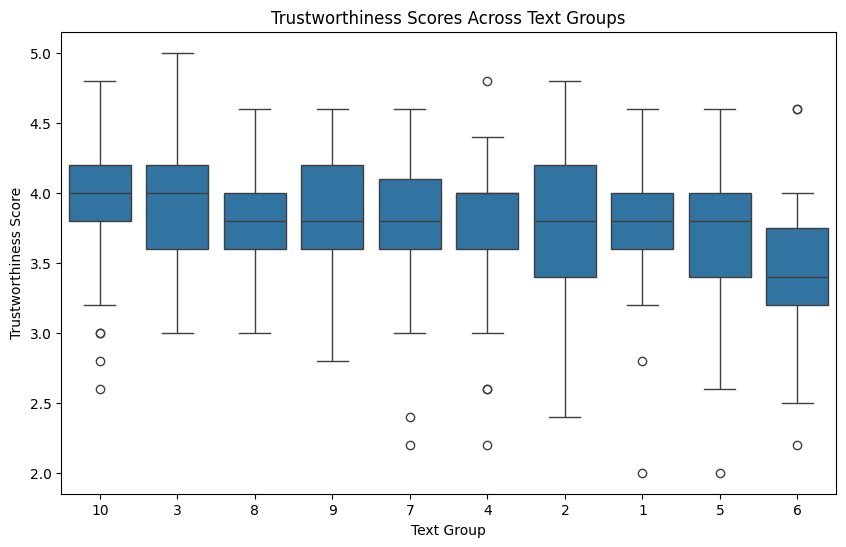

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x="text", y="trustworthy", data=trust_df, order=df_agg['text'])
plt.title("Trustworthiness Scores Across Text Groups")
plt.xlabel("Text Group")
plt.ylabel("Trustworthiness Score")
plt.show()


In [ ]:
df_agg = trust_df.groupby('text')['trustworthy'].mean().reset_index()

# Rank text groups based on trustworthiness score (highest = rank 1)
df_agg['rank'] = df_agg['trustworthy'].rank(ascending=False, method='min')

# Sort by rank
df_agg = df_agg.sort_values(by='rank')
df_agg

text  trustworthy  rank
9    10     3.934545   1.0
2     3     3.924679   2.0
7     8     3.833636   3.0
8     9     3.829630   4.0
6     7     3.815152   5.0
3     4     3.786601   6.0
1     2     3.751235   7.0
0     1     3.745283   8.0
4     5     3.695597   9.0
5     6     3.443860  10.0

In [ ]:

# Combine data for visualization
combined_data = pd.DataFrame({
    'trustworthy': list(df_filtered) + list(trust_df_pol_filtered) + list(trust_df_hum_filtered),
    'dataset': (['neutral'] * len(df_filtered)) + (['polite'] * len(trust_df_pol_filtered)) + (['humor'] * len(trust_df_hum_filtered))
})

means = combined_data.groupby("dataset")["trustworthy"].mean()
print(means)

# Visualize distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x="dataset", y="trustworthy", data=combined_data)
plt.title("Distribution of Trustworthy Scores Across Datasets")
plt.show()

# Check normality using Shapiro-Wilk test
shapiro_df = stats.shapiro(df_filtered)
shapiro_df_pol = stats.shapiro(trust_df_pol_filtered)
shapiro_df_hum = stats.shapiro(trust_df_hum_filtered)

# Determine which test to use
if shapiro_df.pvalue > 0.05 and shapiro_df_pol.pvalue > 0.05 and shapiro_df_hum.pvalue > 0.05:
    # Normality holds -> Use ANOVA
    anova_test = stats.f_oneway(df_filtered, trust_df_pol_filtered, trust_df_hum_filtered)
    test_used = "ANOVA"
    test_result = anova_test
else:
    # Non-normal data -> Use Kruskal-Wallis
    kruskal_test = stats.kruskal(df_filtered, trust_df_pol_filtered, trust_df_hum_filtered)
    test_used = "Kruskal-Wallis"
    test_result = kruskal_test


# Check homogeneity of variance using Levene's test
levene_test = stats.levene(df_filtered, trust_df_pol_filtered, trust_df_hum_filtered)
print(f"Levene's Test p-value (variance check): {levene_test.pvalue}")


# Print results
print(f"Test Used: {test_used}")
print(f"p-value: {test_result.pvalue}")
print(f"Shapiro-Wilk p-values (df, df_pol, df_hum): {shapiro_df.pvalue}, {shapiro_df_pol.pvalue}, {shapiro_df_hum.pvalue}")


dataset
humor      0.322093
neutral    0.370058
polite     0.162777
Name: trustworthy, dtype: float64


Levene's Test p-value (variance check): 0.35837763020368774
Test Used: Kruskal-Wallis
p-value: 6.778789671357847e-05
Shapiro-Wilk p-values (df, df_pol, df_hum): 0.8456387246946253, 0.0016087430845458579, 0.2023928816919009


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#combined_data

# Set figure size
plt.figure(figsize=(8, 5))

# Define a mix of colors with blue for one dataset
palette_colors = {"neutral": "#1f77b4",  # Blue
                  "polite": "#e63946",   # Red
                  "humor": "#2a9d8f"}    # Green

# Plot histogram with KDE curves
sns.histplot(combined_data, x='trustworthy', hue='dataset', bins=10, kde=True, palette=palette_colors, alpha=0.5, edgecolor="black")

# Add title and labels
plt.title("Trustworthy Score Distribution by Dataset")
plt.xlabel("Trustworthy Score")
plt.ylabel("Frequency")

# Add legend with dataset labels
plt.legend(title="Dataset", labels=combined_data['dataset'].unique())

# Show plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
!pip install scikit-posthocs

In [ ]:
import scipy.stats as stats
import scikit_posthocs as sp

# Remove rows with missing values in 'trustworthy' or 'dataset'
combined_data_clean = combined_data.dropna(subset=['trustworthy', 'dataset'])

# Perform Kruskal-Wallis test
groups = [combined_data_clean[combined_data_clean['dataset'] == group]['trustworthy'].values for group in combined_data_clean['dataset'].unique()]
kruskal_stat, kruskal_p = stats.kruskal(*groups)

print(f"Kruskal-Wallis Test Statistic: {kruskal_stat}")
print(f"Kruskal-Wallis p-value: {kruskal_p}")

# If Kruskal-Wallis test is significant, perform Dunn's Test for pairwise comparisons
if kruskal_p < 0.05:
    print("\nPerforming Dunn's Test (pairwise comparisons)...")
    # Dunn's Test for pairwise comparisons (with correction)
    dunn_result = sp.posthoc_dunn(combined_data_clean, val_col='trustworthy', group_col='dataset', p_adjust='bonferroni')
    print("\nDunn's Test Results (pairwise comparisons):")
    print(dunn_result)
else:
    print("\nKruskal-Wallis test is not significant. No need for post-hoc test.")

'''
Dunn's post-hoc test revealed:
A significant difference between df and df_hum.
No significant difference between df and df_pol.
A significant difference between df_hum and df_pol.
'''

Kruskal-Wallis Test Statistic: 19.198253787005065
Kruskal-Wallis p-value: 6.778789671357847e-05

Performing Dunn's Test (pairwise comparisons)...

Dunn's Test Results (pairwise comparisons):
            humor   neutral    polite
humor    1.000000  1.000000  0.003603
neutral  1.000000  1.000000  0.000092
polite   0.003603  0.000092  1.000000


"\nDunn's post-hoc test revealed:\nA significant difference between df and df_hum.\nNo significant difference between df and df_pol.\nA significant difference between df_hum and df_pol.\n"

### RQ2:

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

'''
trust_df = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_results_df_question.csv')
trust_df_pol = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_results_df_question_pol_v3.csv')
trust_df_hum = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_df_hum_q.csv')
'''

trust_df = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_results_df_rec.csv')
#print(df.columns)
trust_df_pol = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_df_rec_pol.csv')
#print(trust_df_pol.columns)
trust_df_hum = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_df_hum_rec.csv')

In [ ]:
trust_df.columns

Index(['Unnamed: 0.1', 'survey', 'filename', 'order_in_survey', 'trustworthy',
       'lively', 'natural', 'boring', 'empathetic', 'respectful', 'cold',
       'engaging', 'following', 'file_order', 'Flesch_reading', 'num_word',
       'Gender', 'Intensity', 'Pitch', 'Rate', 'bin_trustworthy', 'bin_lively',
       'bin_natural', 'bin_boring', 'bin_empathetic', 'bin_respectful',
       'bin_cold', 'bin_engaging', 'bin_following', 'norm_trustworthy',
       'norm_lively', 'norm_natural', 'norm_boring', 'norm_empathetic',
       'norm_respectful', 'norm_cold', 'norm_engaging', 'norm_following',
       'Unnamed: 0', 'Duration', 'mean_pitch', 'mean_intensity',
       'speaking_rate'],
      dtype='object')

In [ ]:
#df_sorted = df.sort_values(by='trustworthy', ascending=False)
df = trust_df[['Gender','Intensity', 'Pitch', 'Rate','norm_trustworthy']]
grouped_df = df.groupby(['Gender','Intensity', 'Pitch', 'Rate','norm_trustworthy']).mean().reset_index()

grouped_df = grouped_df.sort_values(by='norm_trustworthy', ascending=False)

# Displaying top 10 and bottom 10 filenames
top_10 = grouped_df.head(10)
bottom_10 = grouped_df.tail(10)

print("Top 10 filenames with highest values:")
print(top_10[['Gender','Intensity', 'Pitch', 'Rate','norm_trustworthy']])

print("\nBottom 10 filenames with lowest values:")
print(bottom_10[['Gender','Intensity', 'Pitch', 'Rate','norm_trustworthy']])

Top 10 filenames with highest values:
    Gender Intensity   Pitch    Rate  norm_trustworthy
513      M    x-soft  medium    slow          1.604981
214      F    x-soft     low    fast          1.235997
70       F    medium  medium    fast          1.235997
512      M    x-soft  medium    slow          1.224219
331      M    medium  medium  medium          1.224219
438      M    x-soft    high    fast          1.195902
388      M    x-loud     low  medium          1.170957
504      M    x-soft  medium  medium          1.135164
195      F    x-soft    high  medium          1.109211
315      M    medium     low    slow          1.102452

Bottom 10 filenames with lowest values:
    Gender Intensity   Pitch  Rate  norm_trustworthy
31       F    medium     low  fast         -0.724750
205      F    x-soft     low  fast         -0.770039
233      F    x-soft  medium  fast         -0.826319
484      M    x-soft  medium  fast         -0.826319
91       F    x-loud    high  fast         -0.91147

In [ ]:
trust_df_pol.columns

Index(['Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2',
       'Unnamed: 0.1', 'Unnamed: 0', 'survey', 'filename', 'order_in_survey',
       'trustworthy', 'natural', 'boring', 'empathetic', 'polite', 'engaging',
       'follow', 'gender', 'pitch', 'intensity', 'rate', 'Duration',
       'Min_Pitch', 'Max_Pitch', 'Mean_Pitch', 'SD_Pitch', 'Median_Pitch',
       'MAS_F0', 'VCD2TOT_Frames', 'Min_Intensity', 'Max_Intensity',
       'Mean_Intensity', 'SD_Intensity', 'Median_Intensity', 'Jitter',
       'Shimmer', 'HNR', 'file_order', 'mapped_value', 'speaking_rate',
       'num_word'],
      dtype='object')

In [ ]:
#df_sorted = df.sort_values(by='trustworthy', ascending=False)
df = trust_df_pol[['gender','intensity', 'pitch', 'rate','trustworthy']]
grouped_df = df.groupby(['gender','intensity', 'pitch', 'rate','trustworthy']).mean().reset_index()

grouped_df = grouped_df.sort_values(by='trustworthy', ascending=False)

# Displaying top 10 and bottom 10 filenames
top_10 = grouped_df.head(10)
bottom_10 = grouped_df.tail(10)

print("Top 10 filenames with highest values:")
print(top_10[['gender','intensity', 'pitch', 'rate','trustworthy']])

print("\nBottom 10 filenames with lowest values:")
print(bottom_10[['gender','intensity', 'pitch', 'rate','trustworthy']])

Top 10 filenames with highest values:
    gender intensity   pitch    rate  trustworthy
132      F    x-soft  medium  medium     1.055756
259      M    x-loud  medium  medium     1.055756
44       F    medium  medium  medium     1.021677
275      M    x-soft    high  medium     1.021677
88       F    x-loud  medium  medium     1.021677
274      M    x-soft    high  medium     1.018916
311      M    x-soft  medium    slow     1.003598
43       F    medium  medium  medium     0.952677
302      M    x-soft  medium  medium     0.952677
292      M    x-soft     low  medium     0.952677

Bottom 10 filenames with lowest values:
    gender intensity   pitch    rate  trustworthy
54       F    x-loud     low  medium    -0.749548
218      M    x-loud    high  medium    -0.749548
34       F    medium  medium  medium    -0.749548
0        F    medium    high    fast    -0.749548
70       F    x-loud  medium    fast    -0.918484
62       F    x-loud     low    slow    -1.002050
25       F    medium 

In [ ]:
trust_df_hum.columns

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'survey',
       'filename', 'order_in_survey', 'Duration', 'Min_Pitch', 'Max_Pitch',
       'Mean_Pitch', 'SD_Pitch', 'Median_Pitch', 'MAS_F0', 'VCD2TOT_Frames',
       'Min_Intensity', 'Max_Intensity', 'Mean_Intensity', 'SD_Intensity',
       'Median_Intensity', 'Jitter', 'Shimmer', 'HNR', 'file_order',
       'num_word', 'speaking_rate', 'trustworthy', 'natural', 'boring',
       'empathetic', 'humor', 'engaging', 'follow', 'gender', 'pitch',
       'intensity', 'rate'],
      dtype='object')

In [ ]:
grouped_df = trust_df_hum.groupby(['gender','intensity', 'pitch', 'rate','trustworthy']).mean(numeric_only=True).reset_index()

grouped_df = grouped_df.sort_values(by='trustworthy', ascending=False)

# Displaying top 10 and bottom 10 filenames
top_10 = grouped_df.head(11)
bottom_10 = grouped_df.tail(10)

print("Top 10 filenames with highest values:")
print(top_10[['gender','intensity', 'pitch', 'rate','trustworthy']])

print("\nBottom 10 filenames with lowest values:")
print(bottom_10[['gender','intensity', 'pitch', 'rate','trustworthy']])

Top 10 filenames with highest values:
    gender intensity   pitch    rate  trustworthy
177      M    x-loud  medium  medium     1.409176
176      M    x-loud  medium  medium     1.300002
117      M    medium     low    fast     1.300002
52       F    x-loud  medium    fast     1.300002
206      M    x-soft     low  medium     1.162291
70       F    x-soft     low    fast     1.141358
219      M    x-soft  medium    slow     1.051361
27       F    medium  medium  medium     1.046999
144      M    medium  medium  medium     1.045348
96       M    medium    high    fast     1.045348
55       F    x-loud  medium  medium     1.045348

Bottom 10 filenames with lowest values:
    gender intensity   pitch    rate  trustworthy
125      M    medium     low    slow    -0.457857
40       F    x-loud     low    slow    -0.469222
201      M    x-soft     low  medium    -0.469222
106      M    medium    high    slow    -0.484694
0        F    medium    high    fast    -0.490558
111      M    medium 

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import glm

# GLM formula
formula ='trustworthy ~ Pitch * Intensity * Rate * Gender'

# Fit the GLM model
model = glm(formula, data=trust_df, family=sm.families.Gaussian()).fit()

# Print the summary of the model
print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:            trustworthy   No. Observations:                  520
Model:                            GLM   Df Residuals:                      465
Model Family:                Gaussian   Df Model:                           54
Link Function:               Identity   Scale:                         0.22035
Method:                          IRLS   Log-Likelihood:                -315.46
Date:                Sat, 22 Feb 2025   Deviance:                       102.44
Time:                        22:53:13   Pearson chi2:                     102.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1429
Covariance Type:            nonrobust                                         
                                                                         coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import glm
# GLM formula
formula ='trustworthy ~ pitch * intensity * rate * gender'
# Fit the GLM model
model = glm(formula, data=trust_df_pol, family=sm.families.Gaussian()).fit()
# Print the summary of the model
print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:            trustworthy   No. Observations:                  325
Model:                            GLM   Df Residuals:                      287
Model Family:                Gaussian   Df Model:                           37
Link Function:               Identity   Scale:                         0.17067
Method:                          IRLS   Log-Likelihood:                -153.64
Date:                Sat, 22 Feb 2025   Deviance:                       48.982
Time:                        22:53:14   Pearson chi2:                     49.0
No. Iterations:                   100   Pseudo R-squ. (CS):             0.2114
Covariance Type:            nonrobust                                         
                                                                     coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------

In [ ]:
# GLM formula
formula ='trustworthy ~ pitch * intensity * rate * gender'
# Fit the GLM model
model = glm(formula, data=trust_df_hum, family=sm.families.Gaussian()).fit()
# Print the summary of the model
print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:            trustworthy   No. Observations:                  223
Model:                            GLM   Df Residuals:                      185
Model Family:                Gaussian   Df Model:                           37
Link Function:               Identity   Scale:                         0.20076
Method:                          IRLS   Log-Likelihood:                -116.56
Date:                Sat, 22 Feb 2025   Deviance:                       37.140
Time:                        22:53:14   Pearson chi2:                     37.1
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1435
Covariance Type:            nonrobust                                         
                                                                     coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------

###Q3

### 3D plot

In [ ]:

trust_df = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_results_df_rec.csv')
#print(df.columns)
trust_df_pol = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_df_rec_pol.csv')
#print(trust_df_pol.columns)
trust_df_hum = pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_df_hum_rec.csv')

       Flesch_reading  mean_intensity  mean_pitch  speaking_rate
count       66.000000       66.000000   66.000000      66.000000
mean        80.866667       64.185494  111.848643     221.093706
std         20.532473        4.176578   19.879070      55.960314
min         31.550000       55.803086   87.118808     133.909142
25%         64.370000       61.306184   98.847575     178.864465
50%         84.680000       64.500920  101.881568     223.516507
75%         87.720000       67.248997  124.263152     262.522480
max        109.040000       71.887972  170.306591     369.021821
       Flesch_reading  mean_intensity  mean_pitch  speaking_rate
count       65.000000       65.000000   65.000000      65.000000
mean        78.017231       64.517188  153.014053     213.690529
std         21.495970        3.913631   26.679662      55.344201
min         31.550000       56.699098  120.606803     127.755112
25%         55.910000       61.275198  125.596682     176.811250
50%         84.680000    

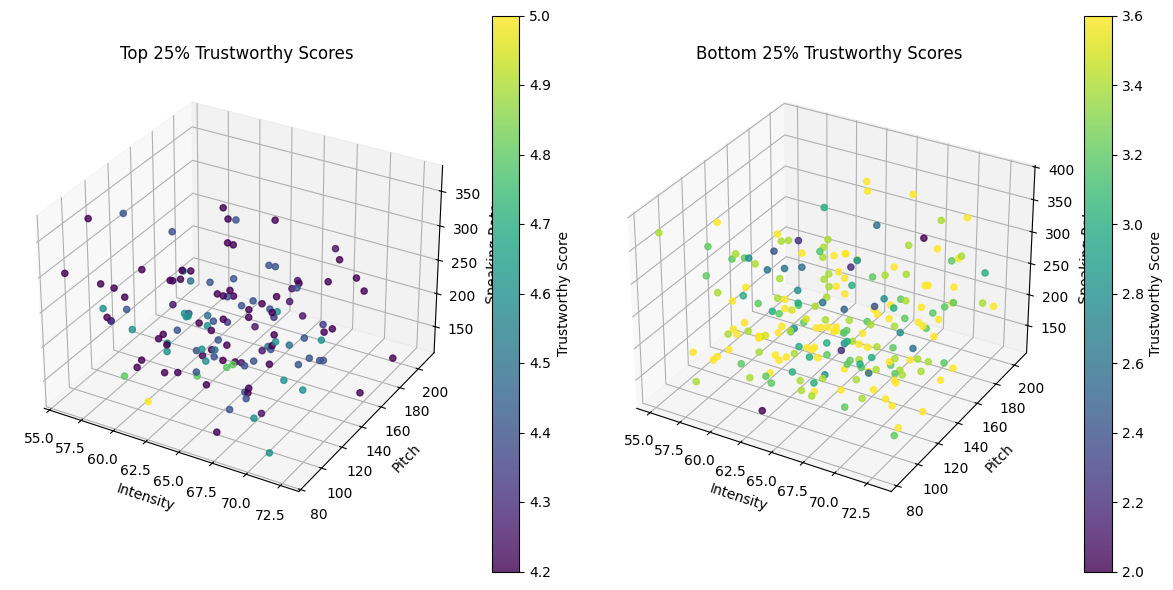

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample DataFrame (Replace with your actual dataset)
# df = pd.read_csv("your_data.csv")
df = trust_df
# Define the threshold for top and bottom 25%
trustworthy_threshold_top = df["trustworthy"].quantile(0.75)
trustworthy_threshold_bottom = df["trustworthy"].quantile(0.25)

# Filter the top and bottom 25% trustworthy scores
df_top = df[df["trustworthy"] >= trustworthy_threshold_top]
df_bottom = df[df["trustworthy"] <= trustworthy_threshold_bottom]

df_top_m = df_top[df_top['Gender'] == 'M']
df_top_f = df_top[df_top['Gender'] == 'F']
print(df_top_m[['Flesch_reading', 'mean_intensity','mean_pitch','speaking_rate']].describe())
print(df_top_f[['Flesch_reading','mean_intensity','mean_pitch', 'speaking_rate']].describe())


# Create figure and subplots
fig = plt.figure(figsize=(12, 6))

# Top 25% Trustworthiness Plot
ax1 = fig.add_subplot(121, projection='3d')
sc1 = ax1.scatter(df_top["mean_intensity"], df_top["mean_pitch"], df_top["speaking_rate"],
                  c=df_top["trustworthy"], cmap="viridis", alpha=0.8)
ax1.set_title("Top 25% Trustworthy Scores")
ax1.set_xlabel("Intensity")
ax1.set_ylabel("Pitch")
ax1.set_zlabel("Speaking Rate")
fig.colorbar(sc1, ax=ax1, label="Trustworthy Score")

# Bottom 25% Trustworthiness Plot
ax2 = fig.add_subplot(122, projection='3d')
sc2 = ax2.scatter(df_bottom["mean_intensity"], df_bottom["mean_pitch"], df_bottom["speaking_rate"],
                  c=df_bottom["trustworthy"], cmap="viridis", alpha=0.8)
ax2.set_title("Bottom 25% Trustworthy Scores")
ax2.set_xlabel("Intensity")
ax2.set_ylabel("Pitch")
ax2.set_zlabel("Speaking Rate")
fig.colorbar(sc2, ax=ax2, label="Trustworthy Score")

# Show the plot
plt.tight_layout()
plt.show()


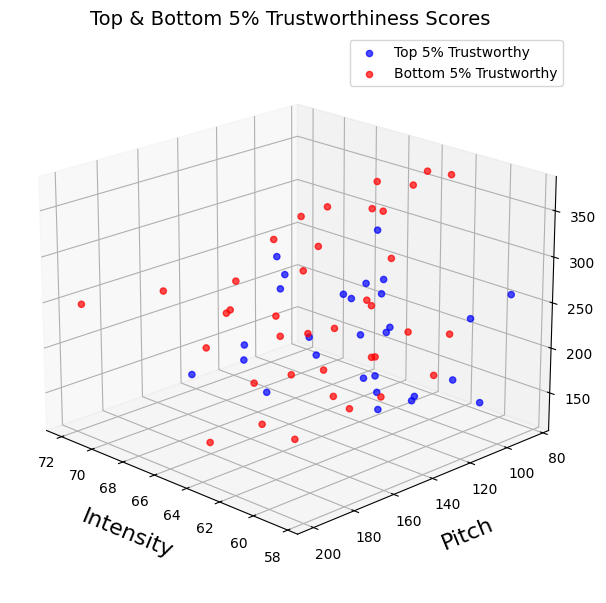

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the threshold for top and bottom 5%
trustworthy_threshold_top = df["trustworthy"].quantile(0.95)  # Top 5%
trustworthy_threshold_bottom = df["trustworthy"].quantile(0.05)  # Bottom 5%

# Filter top and bottom 5%
df_top = df[df["trustworthy"] >= trustworthy_threshold_top]
df_bottom = df[df["trustworthy"] <= trustworthy_threshold_bottom]


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_top["mean_intensity"], df_top["mean_pitch"], df_top["speaking_rate"],
           c="blue", alpha=0.7, label="Top 5% Trustworthy")

ax.scatter(df_bottom["mean_intensity"], df_bottom["mean_pitch"], df_bottom["speaking_rate"],
           c="red", alpha=0.7, label="Bottom 5% Trustworthy")

# Labels
ax.set_title("Top & Bottom 5% Trustworthiness Scores", fontsize=14)
ax.set_xlabel("Intensity", fontsize=16, labelpad=10)
ax.set_ylabel("Pitch", fontsize=16, labelpad=10)
ax.set_zlabel("Speaking Rate", fontsize=16, labelpad=40)  # Ensure label appears

# Adjust rotation & visibility
ax.zaxis.label.set_rotation(90)
ax.zaxis.label.set_color('black')
ax.zaxis.label.set_fontsize(16)

# Adjust viewing angle
ax.view_init(elev=20, azim=135)

# Improve layout
plt.tight_layout()
fig.subplots_adjust(left=0.15, right=0.85, bottom=0.15, top=0.85)

ax.legend()
plt.show()



In [ ]:
'''
import pandas as pd
import textstat

# Define the new 10 texts
texts = [
    "Perhaps it would be helpful to develop ways to better manage your feelings in various situations.",
    "It would be wonderful to build self-confidence and take pride in yourself.",
    "It’s truly commendable that you’re continuing to exercise; it’s incredibly beneficial for both your body and mind.",
    "Please remind yourself why it’s important to wake up and get things going.",
    "You might want to try going for a run every morning; it can help clear your mind.",
    "Please consider practicing meditation to release any negative thoughts.",
    "Please take some time to do things that make you happy.",
    "When you accomplish a goal, it might be a lovely idea to consider treating yourself to a well-deserved reward.",
    "Taking a walk and enjoying some fresh air could be a wonderfully refreshing and healthy choice.",
    "It can be really helpful to keep a positive mindset."
]

# Create a DataFrame
df = pd.DataFrame({'text': texts,'file_order':[1,2,3,4,5,6,7,8,9,10]})

# Calculate Flesch Reading Ease scores
df['flesch_score'] = df['text'].apply(textstat.flesch_reading_ease)

# Display the result
print(df)

trust_df_pol['flesch_score'] = trust_df_pol['file_order'].map(df.set_index('file_order')['flesch_score'])
trust_df_pol.to_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_df_rec_pol.csv')
'''

                                                text  file_order  flesch_score
0  Perhaps it would be helpful to develop ways to...           1         38.32
1  It would be wonderful to build self-confidence...           2         67.76
2  It’s truly commendable that you’re continuing ...           3         28.84
3  Please remind yourself why it’s important to w...           4         75.20
4  You might want to try going for a run every mo...           5         88.06
5  Please consider practicing meditation to relea...           6         11.58
6  Please take some time to do things that make y...           7        102.61
7  When you accomplish a goal, it might be a love...           8         52.19
8  Taking a walk and enjoying some fresh air coul...           9         55.24
9  It can be really helpful to keep a positive mi...          10         69.79


       flesch_score  Mean_Intensity  Mean_Pitch  speaking_rate
count     42.000000       42.000000   42.000000      42.000000
mean      57.330952       70.762125  106.304491     211.708284
std       29.969218        2.859172   13.336885      49.672901
min       11.580000       65.683010   83.548167     126.113435
25%       28.840000       67.757447   97.969662     167.831781
50%       52.190000       71.346825  101.759810     205.280459
75%       88.060000       71.985955  119.908713     239.821767
max      102.610000       75.858159  125.069924     346.508250
       flesch_score  Mean_Intensity  Mean_Pitch  speaking_rate
count     40.000000       40.000000   40.000000      40.000000
mean      62.157000       70.254964  157.026010     212.919295
std       27.572812        3.758696   25.723807      37.203037
min       11.580000       65.521971  122.584281     118.861992
25%       38.320000       67.022743  131.289568     196.613507
50%       67.760000       70.995319  154.163897     213

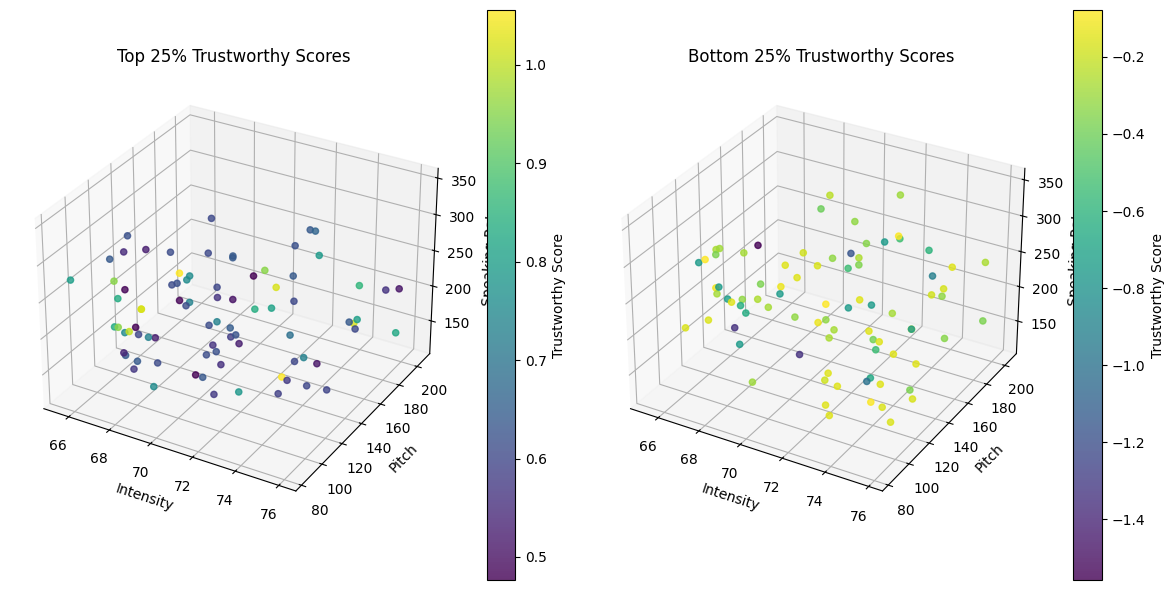

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample DataFrame (Replace with your actual dataset)
# df = pd.read_csv("your_data.csv")
df = trust_df_pol

# Define the threshold for top and bottom 25%
trustworthy_threshold_top = df["trustworthy"].quantile(0.75)
trustworthy_threshold_bottom = df["trustworthy"].quantile(0.25)

# Filter the top and bottom 25% trustworthy scores
df_top = df[df["trustworthy"] >= trustworthy_threshold_top]
df_bottom = df[df["trustworthy"] <= trustworthy_threshold_bottom]

df_top_m = df_top[df_top['gender'] == 'M']
df_top_f = df_top[df_top['gender'] == 'F']
print(df_top_m[['flesch_score', 'Mean_Intensity','Mean_Pitch','speaking_rate']].describe())
print(df_top_f[['flesch_score','Mean_Intensity','Mean_Pitch', 'speaking_rate']].describe())


# Create figure and subplots
fig = plt.figure(figsize=(12, 6))

# Top 25% Trustworthiness Plot
ax1 = fig.add_subplot(121, projection='3d')
sc1 = ax1.scatter(df_top["Mean_Intensity"], df_top["Mean_Pitch"], df_top["speaking_rate"],
                  c=df_top["trustworthy"], cmap="viridis", alpha=0.8)
ax1.set_title("Top 25% Trustworthy Scores")
ax1.set_xlabel("Intensity")
ax1.set_ylabel("Pitch")
ax1.set_zlabel("Speaking Rate")
fig.colorbar(sc1, ax=ax1, label="Trustworthy Score")

# Bottom 25% Trustworthiness Plot
ax2 = fig.add_subplot(122, projection='3d')
sc2 = ax2.scatter(df_bottom["Mean_Intensity"], df_bottom["Mean_Pitch"], df_bottom["speaking_rate"],
                  c=df_bottom["trustworthy"], cmap="viridis", alpha=0.8)
ax2.set_title("Bottom 25% Trustworthy Scores")
ax2.set_xlabel("Intensity")
ax2.set_ylabel("Pitch")
ax2.set_zlabel("Speaking Rate")
fig.colorbar(sc2, ax=ax2, label="Trustworthy Score")

# Show the plot
plt.tight_layout()
plt.show()


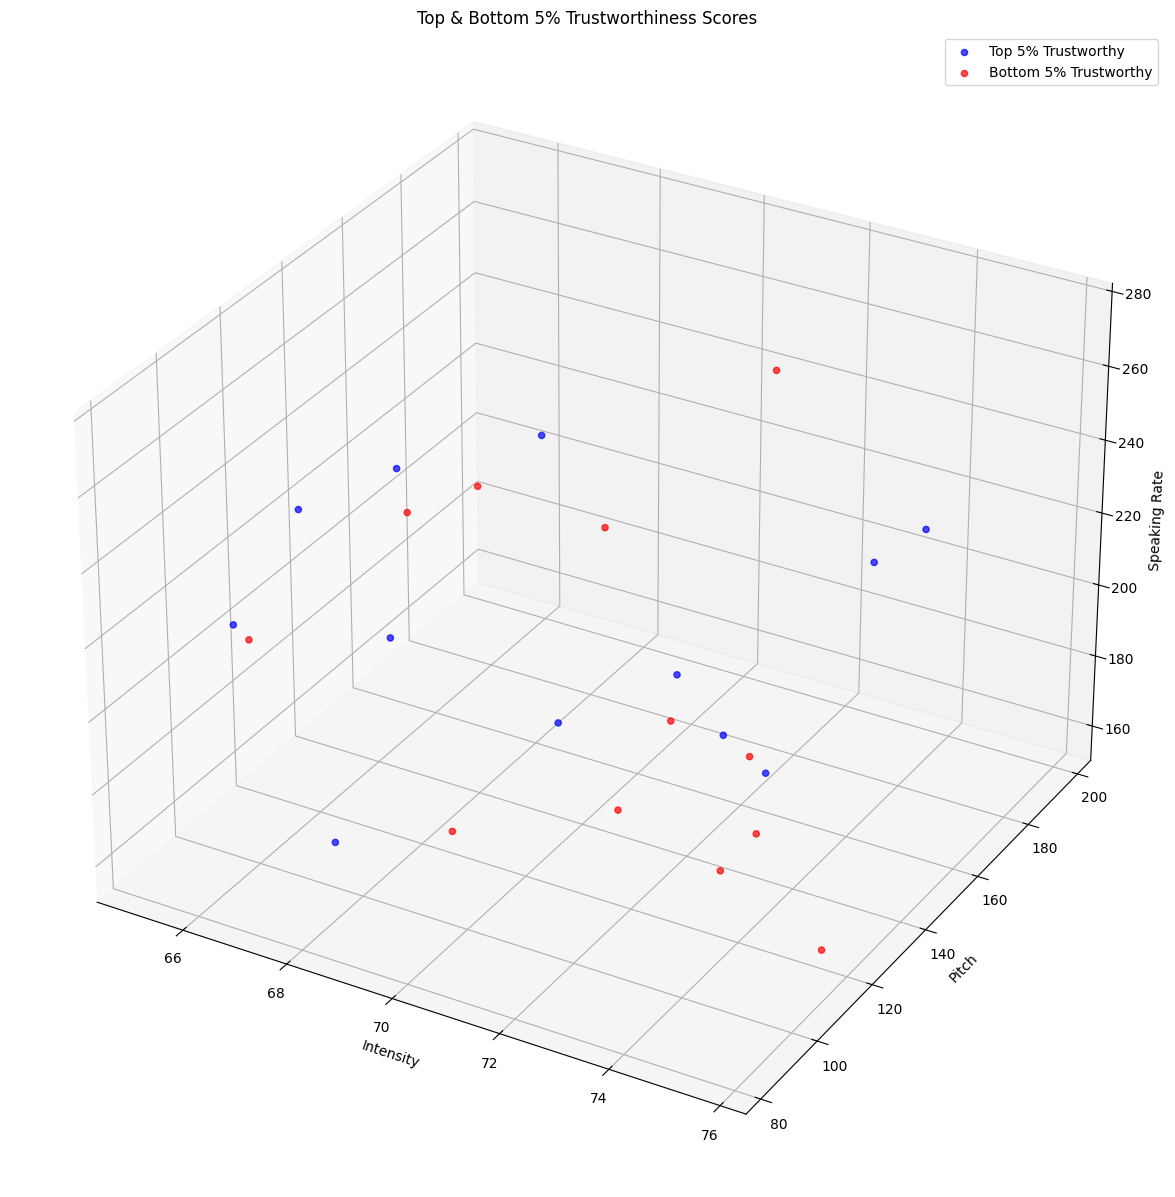

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load Data

# Define the threshold for top and bottom 25%
trustworthy_threshold_top = df["trustworthy"].quantile(0.95)  # Top 25%
trustworthy_threshold_bottom = df["trustworthy"].quantile(0.05)  # Bottom 25%

# Filter top and bottom 25%
df_top = df[df["trustworthy"] >= trustworthy_threshold_top]
df_bottom = df[df["trustworthy"] <= trustworthy_threshold_bottom]

# Create a single 3D scatter plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Plot Top 25% (Blue) and Bottom 25% (Red)
ax.scatter(df_top["Mean_Intensity"], df_top["Mean_Pitch"], df_top["speaking_rate"],
           c="blue", alpha=0.7, label="Top 5% Trustworthy")

ax.scatter(df_bottom["Mean_Intensity"], df_bottom["Mean_Pitch"], df_bottom["speaking_rate"],
           c="red", alpha=0.7, label="Bottom 5% Trustworthy")

# Labels & Title
ax.set_title("Top & Bottom 5% Trustworthiness Scores")
ax.set_xlabel("Intensity")
ax.set_ylabel("Pitch")
ax.set_zlabel("Speaking Rate")

# Legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
trust_df_hum.columns

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'survey',
       'filename', 'order_in_survey', 'Duration', 'Min_Pitch', 'Max_Pitch',
       'Mean_Pitch', 'SD_Pitch', 'Median_Pitch', 'MAS_F0', 'VCD2TOT_Frames',
       'Min_Intensity', 'Max_Intensity', 'Mean_Intensity', 'SD_Intensity',
       'Median_Intensity', 'Jitter', 'Shimmer', 'HNR', 'file_order',
       'num_word', 'speaking_rate', 'trustworthy', 'natural', 'boring',
       'empathetic', 'humor', 'engaging', 'follow', 'gender', 'pitch',
       'intensity', 'rate'],
      dtype='object')

In [ ]:
import pandas as pd
import textstat

# Define the new texts
texts = [
    "Learn to control your feelings over situations. It’s like having a superpower, except you don’t need a cape.",
    "Embrace your inner rockstar and give yourself a standing ovation!",
    "Keep exercising; that's great for your body and mind. If you can’t work out today, at least stretch—reaching for snacks counts.",
    "Give yourself a pep talk and remember: the world won’t conquer itself!",
    "Run every morning to clear your mind—think of it as your brain’s daily power wash!",
    "Do meditation to release negative thoughts. Picture your worries floating away—preferably on a raft heading out to sea.",
    "Take time to do things that make you happy. Even if it’s as simple as laughing at your own jokes.",
    "Crushed that goal? Now go ahead and give yourself a trophy. You deserve it—preferably one made of chocolate!",
    "Go for a walk—your body will thank you, and your couch won’t hold a grudge... this time.",
    "Keep a positive mindset—like a helium balloon, it’ll help you rise above it all!"
]

# Create DataFrame
df = pd.DataFrame({'text': texts,'file_order':[1,2,3,4,5,6,7,8,9,10]})

# Apply Flesch Reading Ease score
df['flesch_score'] = df['text'].apply(textstat.flesch_reading_ease)

# Display the DataFrame
print(df)

trust_df_hum['flesch_score'] = trust_df_hum['file_order'].map(df.set_index('file_order')['flesch_score'])
trust_df_hum.to_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_df_rec_hum.csv')


                                                text  file_order  flesch_score
0  Learn to control your feelings over situations...           1         62.34
1  Embrace your inner rockstar and give yourself ...           2         52.87
2  Keep exercising; that's great for your body an...           3         86.20
3  Give yourself a pep talk and remember: the wor...           4         76.22
4  Run every morning to clear your mind—think of ...           5         73.17
5  Do meditation to release negative thoughts. Pi...           6         62.34
6  Take time to do things that make you happy. Ev...           7         95.17
7  Crushed that goal? Now go ahead and give yours...           8         82.31
8  Go for a walk—your body will thank you, and yo...           9         96.52
9  Keep a positive mindset—like a helium balloon,...          10         57.27


       flesch_score  Mean_Intensity  Mean_Pitch  speaking_rate
count     36.000000       36.000000   36.000000      36.000000
mean      74.271944       70.725476  106.742679     214.595456
std       15.152311        2.764342   16.313558      42.142540
min       52.870000       65.822063   84.446335     145.510012
25%       62.340000       68.464922   94.515843     176.233266
50%       74.695000       70.784265  103.772201     213.344019
75%       86.200000       72.112587  124.323452     238.276011
max       96.520000       75.615982  134.969384     336.858029
       flesch_score  Mean_Intensity  Mean_Pitch  speaking_rate
count     20.000000       20.000000   20.000000      20.000000
mean      76.293000       69.558869  156.984480     214.401676
std       13.244994        3.430362   28.056391      43.032884
min       57.270000       65.075428  121.229854     152.103012
25%       62.340000       66.758831  127.235386     175.895917
50%       74.695000       69.911628  155.382632     215

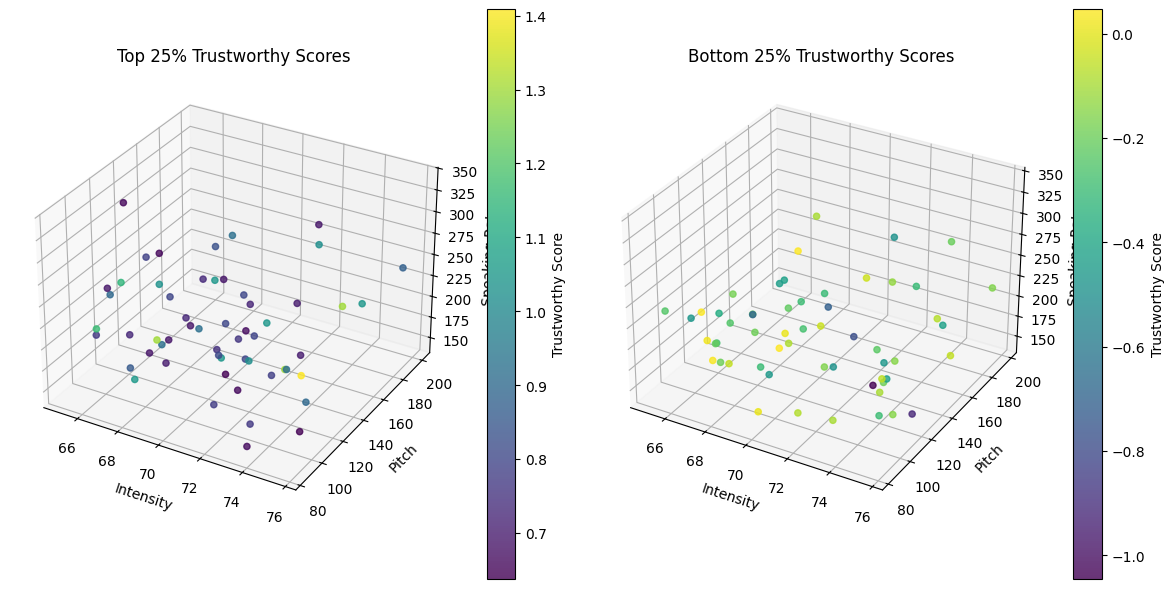

In [ ]:
# Sample DataFrame (Replace with your actual dataset)
# df = pd.read_csv("your_data.csv")
df = trust_df_hum #pd.read_csv('/content/drive/MyDrive/speechgeneration/6_datasets/processed_df_hum_q.csv')
# Define the threshold for top and bottom 25%
trustworthy_threshold_top = df["trustworthy"].quantile(0.75)
trustworthy_threshold_bottom = df["trustworthy"].quantile(0.25)

# Filter the top and bottom 25% trustworthy scores
df_top = df[df["trustworthy"] >= trustworthy_threshold_top]
df_bottom = df[df["trustworthy"] <= trustworthy_threshold_bottom]

df_top_m = df_top[df_top['gender'] == 'M']
df_top_f = df_top[df_top['gender'] == 'F']
print(df_top_m[['flesch_score', 'Mean_Intensity','Mean_Pitch','speaking_rate']].describe())
print(df_top_f[['flesch_score','Mean_Intensity','Mean_Pitch', 'speaking_rate']].describe())



# Create figure and subplots
fig = plt.figure(figsize=(12, 6))

# Top 25% Trustworthiness Plot
ax1 = fig.add_subplot(121, projection='3d')
sc1 = ax1.scatter(df_top["Mean_Intensity"], df_top["Mean_Pitch"], df_top["speaking_rate"],
                  c=df_top["trustworthy"], cmap="viridis", alpha=0.8)
ax1.set_title("Top 25% Trustworthy Scores")
ax1.set_xlabel("Intensity")
ax1.set_ylabel("Pitch")
ax1.set_zlabel("Speaking Rate")
fig.colorbar(sc1, ax=ax1, label="Trustworthy Score")

# Bottom 25% Trustworthiness Plot
ax2 = fig.add_subplot(122, projection='3d')
sc2 = ax2.scatter(df_bottom["Mean_Intensity"], df_bottom["Mean_Pitch"], df_bottom["speaking_rate"],
                  c=df_bottom["trustworthy"], cmap="viridis", alpha=0.8)
ax2.set_title("Bottom 25% Trustworthy Scores")
ax2.set_xlabel("Intensity")
ax2.set_ylabel("Pitch")
ax2.set_zlabel("Speaking Rate")
fig.colorbar(sc2, ax=ax2, label="Trustworthy Score")

# Show the plot
plt.tight_layout()
plt.show()

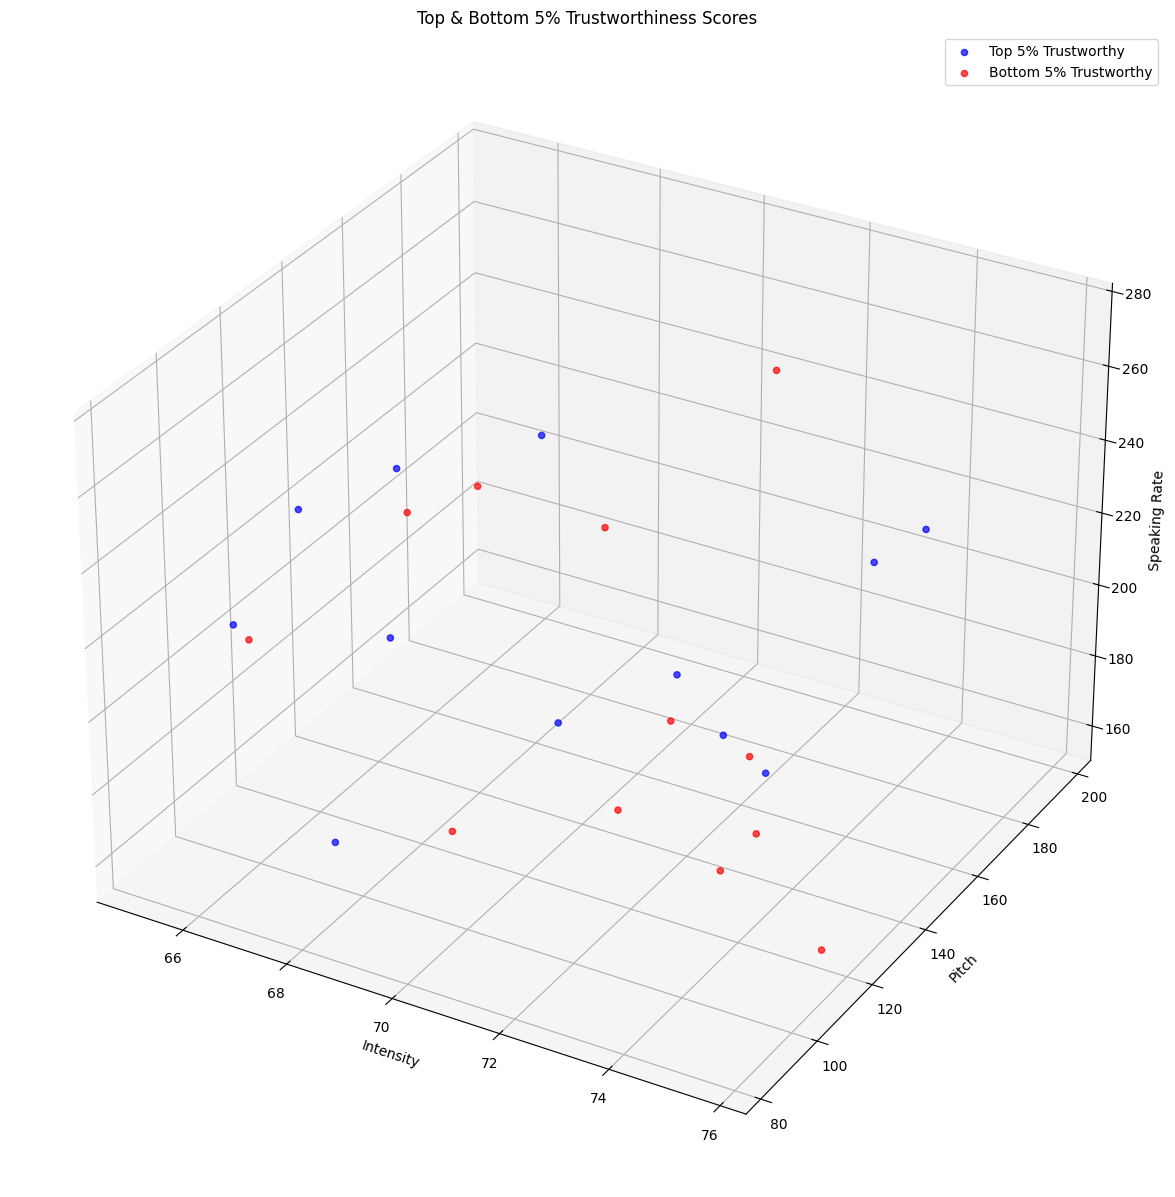

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load Data

# Define the threshold for top and bottom 25%
trustworthy_threshold_top = df["trustworthy"].quantile(0.95)  # Top 25%
trustworthy_threshold_bottom = df["trustworthy"].quantile(0.05)  # Bottom 25%

# Filter top and bottom 25%
df_top = df[df["trustworthy"] >= trustworthy_threshold_top]
df_bottom = df[df["trustworthy"] <= trustworthy_threshold_bottom]

# Create a single 3D scatter plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Plot Top 25% (Blue) and Bottom 25% (Red)
ax.scatter(df_top["Mean_Intensity"], df_top["Mean_Pitch"], df_top["speaking_rate"],
           c="blue", alpha=0.7, label="Top 5% Trustworthy")

ax.scatter(df_bottom["Mean_Intensity"], df_bottom["Mean_Pitch"], df_bottom["speaking_rate"],
           c="red", alpha=0.7, label="Bottom 5% Trustworthy")

# Labels & Title
ax.set_title("Top & Bottom 5% Trustworthiness Scores")
ax.set_xlabel("Intensity")
ax.set_ylabel("Pitch")
ax.set_zlabel("Speaking Rate")

# Legend
ax.legend()

# Show the plot
plt.show()